# **1. PRE-PROCESADO DE LOS DATOS**

## 1.1 Carga de bibliotecas

In [ ]:
import numpy as np
import argparse
import imutils
import time
import cv2
import os


## 1.2 Montar Drive

In [ ]:
from google.colab import drive
drive.mount('/content/drive')



Mounted at /content/drive


In [ ]:
"/content/drive/MyDrive/DOLPHIN_VIDEO_COSTTERA"

'/content/drive/MyDrive/DOLPHIN_VIDEO_COSTTERA'

## 1.3 Extracción de los frames de los vídeos

El código en Python utiliza "OpenCV" y la biblioteca "glob" para extraer frames de todos los archivos de video en formato MP4 ubicados dentro de una carpeta DOLPHIN_VIDEO_COSTTERA:

* Primero, busca recursivamente todos los videos dentro del directorio raíz
especificado (videos_root) en la carpeta DOLPHIN_CLIP.

* Luego, para cada video encontrado, crea una carpeta de salida en (output_root) con el mismo nombre que el video.

* A continuación, carga el video y extrae los frames uno por uno, guardándolos como imágenes en formato JPG dentro de la carpeta correspondiente. Cada imagen se nombra con el patrón {nombre_del_video}_frame_{número}.jpg, donde el número es un índice con cinco dígitos. Si un video no puede abrirse, se omite y se pasa al siguiente.

* Finalmente, el código imprime la cantidad de videos encontrados, el progreso de extracción y la cantidad de frames extraídos para cada video, concluyendo con un mensaje indicando que el proceso ha finalizado.

In [ ]:
import glob

# Ruta principal donde están los videos en subcarpetas
videos_root = "/content/drive/MyDrive/DOLPHIN_VIDEO_COSTTERA/DOLPHIN_CLIP"

# Carpeta donde se guardan los frames
output_root = "/content/drive/MyDrive/DOLPHIN_VIDEO_COSTTERA/DOLPHIN_FRAMES"
os.makedirs(output_root, exist_ok=True)  # Crear la carpeta si no existe

# Buscar todos los archivos de video en todas las carpetas y subcarpetas
video_files = glob.glob(os.path.join(videos_root, "**", "*.mp4"), recursive=True)

print(f"Se encontraron {len(video_files)} videos.")

# Procesar cada video encontrado
for video_path in video_files:
    # Extraer el nombre del archivo sin extensión
    video_name = os.path.splitext(os.path.basename(video_path))[0]

    # Crear carpeta específica para los frames de este video
    output_frames_dir = os.path.join(output_root, video_name)
    os.makedirs(output_frames_dir, exist_ok=True)

    # Cargar el video
    cap = cv2.VideoCapture(video_path)

    if not cap.isOpened():
        print(f"No se pudo abrir el video: {video_path}")
        continue  # Saltar al siguiente video

    print(f"Procesando: {video_name}")

    frame_count = 0
    while cap.isOpened():
        ret, frame = cap.read()
        if not ret:
            break

        # Guardar cada frame como imagen
        frame_filename = os.path.join(output_frames_dir, f"{video_name}_frame_{frame_count:05d}.jpg")
        cv2.imwrite(frame_filename, frame)
        frame_count += 1

    cap.release()
    print(f"{frame_count} frames extraídos y guardados en {output_frames_dir}")

print("¡Proceso completado! Todos los frames han sido extraídos.")


🔍 Se encontraron 212 videos.
✅ Procesando: GX040006_1_20220830_GP_Boca D
📸 140 frames extraídos y guardados en /content/drive/MyDrive/DOLPHIN_VIDEO_COSTTERA/DOLPHIN_FRAMES/GX040006_1_20220830_GP_Boca D
✅ Procesando: GX020052_20220830_GP_Medio
📸 683 frames extraídos y guardados en /content/drive/MyDrive/DOLPHIN_VIDEO_COSTTERA/DOLPHIN_FRAMES/GX020052_20220830_GP_Medio
✅ Procesando: GX030052_20220830_GP_Medio
📸 949 frames extraídos y guardados en /content/drive/MyDrive/DOLPHIN_VIDEO_COSTTERA/DOLPHIN_FRAMES/GX030052_20220830_GP_Medio
✅ Procesando: GX050052_1_20220830_GP_Medio
📸 582 frames extraídos y guardados en /content/drive/MyDrive/DOLPHIN_VIDEO_COSTTERA/DOLPHIN_FRAMES/GX050052_1_20220830_GP_Medio
✅ Procesando: GX050052_2_20220830_GP_Medio
📸 645 frames extraídos y guardados en /content/drive/MyDrive/DOLPHIN_VIDEO_COSTTERA/DOLPHIN_FRAMES/GX050052_2_20220830_GP_Medio
✅ Procesando: GX070052_1_20220830_GP_Medio
📸 1957 frames extraídos y guardados en /content/drive/MyDrive/DOLPHIN_VIDEO_COS

### 1.3.1 Mover los Frames de Subcarpetas al Carpeta del Dataset

In [ ]:
import os
import glob
import shutil
import random

# Directorios
frames_root = "/content/drive/MyDrive/DOLPHIN_VIDEO_COSTTERA/DOLPHIN_FRAMES"
dataset_root = "/content/drive/MyDrive/DOLPHIN_VIDEO_COSTTERA/DOLPHIN_DATASET"
os.makedirs(dataset_root, exist_ok=True)

# Crear carpetas para entrenamiento y validación
os.makedirs(f"{dataset_root}/images/train", exist_ok=True)
os.makedirs(f"{dataset_root}/images/val", exist_ok=True)
os.makedirs(f"{dataset_root}/labels/train", exist_ok=True)
os.makedirs(f"{dataset_root}/labels/val", exist_ok=True)

# Obtener todos los frames
frame_files = glob.glob(os.path.join(frames_root, "**", "*.jpg"), recursive=True)

# Dividir 80% entrenamiento, 20% validación
random.shuffle(frame_files)
split_index = int(len(frame_files) * 0.8)
train_files = frame_files[:split_index]
val_files = frame_files[split_index:]

# Mover los archivos
for file in train_files:
    shutil.move(file, f"{dataset_root}/images/train/{os.path.basename(file)}")

for file in val_files:
    shutil.move(file, f"{dataset_root}/images/val/{os.path.basename(file)}")

print(f"Imágenes organizadas en {dataset_root}")


Imágenes organizadas en /content/drive/MyDrive/DOLPHIN_VIDEO_COSTTERA/DOLPHIN_DATASET


## 1.4 Etiquetado de los frames en ROBOFLOW

In [ ]:
!pip install roboflow


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 83.1/83.1 kB 7.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 66.8/66.8 kB 6.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 49.9/49.9 MB 25.6 MB/s eta 0:00:00
  Attempting uninstall: opencv-python-headless
    Found existing installation: opencv-python-headless 4.11.0.86
    Uninstalling opencv-python-headless-4.11.0.86:
      Successfully uninstalled opencv-python-headless-4.11.0.86
  Attempting uninstall: idna
    Found existing installation: idna 3.10
    Uninstalling idna-3.10:
      Successfully uninstalled idna-3.10


In [ ]:
dataset_path = "/content/drive/MyDrive/DOLPHIN_VIDEO_COSTTERA/DOLPHIN_DATASET/images/train"

if os.path.exists(dataset_path):
    print("La carpeta existe. Listo para subir los datos a Roboflow.")
else:
    print("La carpeta NO existe. Verifica en Google Drive.")


La carpeta existe. Listo para subir los datos a Roboflow.


In [ ]:
import os
import random
from roboflow import Roboflow

# Conectar con Roboflow
rf = Roboflow(api_key="JOfnc3CGq9NsRSA9vnoF")
project = rf.workspace("underwater-dolphins").project("costtera2")

# Ruta de las imágenes en Google Drive
dataset_path = "/content/drive/MyDrive/DOLPHIN_VIDEO_COSTTERA/DOLPHIN_DATASET/images/train"

# Obtener todas las imágenes en la carpeta
all_images = os.listdir(dataset_path)

# Seleccionar aleatoriamente 4500 imágenes
num_to_upload = 4500
selected_images = random.sample(all_images, num_to_upload)

# Subir imágenes al proyecto en Roboflow
for img in selected_images:
    img_path = os.path.join(dataset_path, img)
    try:
        project.upload(img_path)
        print(f"Imagen subida: {img}")
    except Exception as e:
        print(f"Error al subir {img}: {e}")




loading Roboflow workspace...
loading Roboflow project...
Imagen subida: GX090054_5_20220831_GP_Medio_frame_00418.jpg
Imagen subida: GX110047_2_20220812_GP_Medio_frame_01473.jpg
Imagen subida: GX050043_20220714_GP_Medio_frame_00112.jpg
Imagen subida: PARA0045_2_20220830_PZ_Lateral_frame_01376.jpg
Imagen subida: GX040051_2_20220830_GP_Medio_frame_00410.jpg
Imagen subida: GX050036_9_20220831_GP_Medio_frame_00802.jpg
Imagen subida: GX050036_9_20220831_GP_Medio_frame_00216.jpg
Imagen subida: PARA0045_2_20220830_PZ_Lateral_frame_01816.jpg
Imagen subida: GX060054_3_20220831_GP_Medio_frame_00075.jpg
Imagen subida: GX040036_4_20220831_GP_Medio_frame_01120.jpg
Imagen subida: GX020033_1_20220830_GP_Medio_frame_00001.jpg
Imagen subida: GX030036_2_20220831_GP_Medio_frame_00299.jpg
Imagen subida: GX040051_1_20220830_GP_Medio_frame_00285.jpg
Imagen subida: GX090054_3_20220831_GP_Medio (2)_frame_00780.jpg
Imagen subida: GX110047_2_20220812_GP_Medio_frame_00461.jpg
Imagen subida: GX030036_2_20220831_G

Este código se utiliza para aumentar el dataset en Roboflow para no duplicar imágenes. Se ha creado otro proyecto en Roboflow, porque en el anterior se consumieron los créditos. Si no se tiene una versión de pago, se crea un segundo proyecto, aunque no es lo más eficiente.

In [ ]:
import os
import random
from roboflow import Roboflow

#  Conectar con Roboflow
try:
    rf = Roboflow(api_key="JOfnc3CGq9NsRSA9vnoF")
    project = rf.workspace("underwater-dolphins").project("costtera2")
    print(" Conexión con Roboflow exitosa.")
except Exception as e:
    print(f" Error al conectar con Roboflow: {e}")
    exit()

#  Ruta de las imágenes en Google Drive
dataset_path = "/content/drive/MyDrive/DOLPHIN_VIDEO_COSTTERA/DOLPHIN_DATASET/images/train"


#  Obtener la versión más reciente del dataset en Roboflow (si existe)
uploaded_images = set()
versions = project.list_versions()

if versions:
    latest_version = versions[0]  # Seleccionar la versión más reciente
    dataset = latest_version.list_dataset()

    # Obtener los nombres de imágenes ya subidas
    uploaded_images = {img['name'] for img in dataset}
    print(f" Imágenes ya subidas en Roboflow: {len(uploaded_images)}")
else:
    print(" No hay versiones previas en el dataset.")
    uploaded_images = set()

#  Verificar si la carpeta de imágenes existe
if not os.path.exists(dataset_path):
    print(f" Error: La carpeta '{dataset_path}' no existe.")
    exit()

#  Obtener imágenes en la carpeta local
all_images = set(os.listdir(dataset_path))

#  Filtrar imágenes que NO han sido subidas y que tienen formato válido
valid_formats = {".jpg", ".jpeg", ".png"}
new_images = [
    img for img in all_images - uploaded_images
    if os.path.splitext(img)[1].lower() in valid_formats
]

#  Verificar cuántas imágenes nuevas se encontraron
print(f" Imágenes nuevas a subir: {len(new_images)}")

#  Asegurar que no intentamos subir más imágenes de las que hay disponibles
num_to_upload = min(500, len(new_images))
selected_images = random.sample(new_images, num_to_upload)

# Subir solo imágenes nuevas
uploaded_count = 0
for img in selected_images:
    img_path = os.path.join(dataset_path, img)
    try:
        response = project.upload(img_path, num_retry_uploads=3)  # Intenta varias veces si falla

        if response is not None:
            print(f" Imagen subida: {img} - Respuesta: {response}")
            uploaded_count += 1
        else:
            print(f" Advertencia: No se pudo confirmar la subida de {img}")

    except Exception as e:
        print(f" Error al subir {img}: {e}")

# Si se subieron imágenes, crear una nueva versión del dataset
if uploaded_count > 0:
    try:
        new_version = project.generate_version()
        print(f" Nueva versión creada en Roboflow: {new_version.id}")
    except Exception as e:
        print(f" Error al crear la versión: {e}")
else:
    print(" No se subieron nuevas imágenes, no se generará una nueva versión.")

print(f"\nSubida completada: {uploaded_count} imágenes nuevas fueron cargadas.")



loading Roboflow workspace...
loading Roboflow project...
 Conexión con Roboflow exitosa.
[{'id': 'underwater-dolphins/costtera2/1', 'name': '2025-02-27 2:19pm', 'created': 1740662386.835, 'images': 4055, 'splits': {'valid': 811, 'test': 405, 'train': 2839}, 'model': {'id': 'costtera2/1', 'endpoint': 'https://detect.roboflow.com/costtera2/1', 'start': 1740662857.428, 'end': 1740669488.978, 'fromScratch': False, 'tfjs': True, 'oak': True, 'map': '95.25', 'recall': '89.88', 'precision': '93.45'}, 'preprocessing': {'auto-orient': True, 'resize': {'format': 'Stretch to', 'height': 640, 'width': 640}}, 'augmentation': {}, 'exports': ['yolov5pytorch', 'yolov8']}]
 No hay versiones previas en el dataset.
 Imágenes nuevas a subir: 64303
 Advertencia: No se pudo confirmar la subida de GX030048_20220812_GP_Medio_frame_00246.jpg
 Advertencia: No se pudo confirmar la subida de GX030052_20220830_GP_Medio_frame_00090.jpg
 Advertencia: No se pudo confirmar la subida de GX040036_4_20220831_GP_Medio_fr

KeyboardInterrupt: 

SE detiene antes porque ya se subieron más de 400 imágenes a Roboflow y no consumir recursos.

#**2. INSTALAR YOLO Y CARGAR EL MODELO**

In [ ]:
!pip install ultralytics


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 922.6/922.6 kB 56.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 363.4/363.4 MB 3.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.8/13.8 MB 63.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 24.6/24.6 MB 36.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 883.7/883.7 kB 45.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 664.8/664.8 MB 1.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 211.5/211.5 MB 5.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.3/56.3 MB 12.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 127.9/127.9 MB 9.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 207.5/207.5 MB 6.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 21.1/21.1 MB 83.9 MB/s eta 0:00:00
  Attempting uninstall: nvidia-nvjitlink-cu12
    Found existing installation: nvidia-nvjitlink-cu12 12.5.82
    Uninstall

El archivo data.yaml es esencial en YOLOv8 porque le dice al modelo dónde encontrar los datos para el entrenamiento y cuántas clases tiene el dataset. Nos aseguramenos de que contiene bien las rutas y las imágenes

se establecen las rutas completas al datayalm

In [ ]:
import yaml

yaml_path = "/content/drive/MyDrive/DOLPHIN_VIDEO_COSTTERA/DOLPHIN_DATASET_yolov8/data.yaml"

# Cargar el archivo actual
with open(yaml_path, "r") as file:
    data_yaml = yaml.safe_load(file)

# Modificar las rutas de `train`, `val` y `test`
data_yaml["train"] = "/content/drive/MyDrive/DOLPHIN_VIDEO_COSTTERA/DOLPHIN_DATASET_yolov8/train/images"
data_yaml["val"] = "/content/drive/MyDrive/DOLPHIN_VIDEO_COSTTERA/DOLPHIN_DATASET_yolov8/valid/images"
data_yaml["test"] = "/content/drive/MyDrive/DOLPHIN_VIDEO_COSTTERA/DOLPHIN_DATASET_yolov8/test/images"

# Guardar el archivo corregido
with open(yaml_path, "w") as file:
    yaml.dump(data_yaml, file, default_flow_style=False)

print(" Archivo data.yaml corregido y guardado.")




 Archivo data.yaml corregido y guardado.


Abrir y leer el archivo data yaml

In [ ]:
import yaml

yaml_path = "/content/drive/MyDrive/DOLPHIN_VIDEO_COSTTERA/DOLPHIN_DATASET_yolov8/data.yaml"

# Leer y cargar el archivo YAML
with open(yaml_path, "r") as file:
    data_yaml = yaml.safe_load(file)

print(yaml.dump(data_yaml, default_flow_style=False))


names:
- dolphin
- fishing_net
nc: 2
roboflow:
  license: Private
  project: costtera2
  url: https://app.roboflow.com/underwater-dolphins/costtera2/1
  version: 1
  workspace: underwater-dolphins
test: ../test/images
train: ../train/images
val: ../valid/images



In [ ]:
import os

folders = ["train", "valid", "test"]
base_path = "/content/drive/MyDrive/DOLPHIN_VIDEO_COSTTERA/DOLPHIN_DATASET_yolov8"

for folder in folders:
    images_path = os.path.join(base_path, folder, "images")
    labels_path = os.path.join(base_path, folder, "labels")

    num_images = len(os.listdir(images_path)) if os.path.exists(images_path) else 0
    num_labels = len(os.listdir(labels_path)) if os.path.exists(labels_path) else 0

    print(f"{folder.upper()} - Imágenes: {num_images}, Etiquetas: {num_labels}")

    if num_images == 0 or num_labels == 0:
        print(f" Advertencia: `{folder}` no tiene suficientes imágenes o etiquetas.")



TRAIN - Imágenes: 2839, Etiquetas: 2839
VALID - Imágenes: 811, Etiquetas: 811
TEST - Imágenes: 405, Etiquetas: 405


#**3. ENTRENAR LOS MODELOS**

## 3.1 Entreno modelo "dolphin" y "fishing_net"

Este código entrena un modelo YOLOv8 utilizando el dataset creado para entrenar Yolo8n.pt y guarda el modelo entrenado en Google Drive para evitar que se pierda al desconectar Google Colab. Primero, define la ruta donde se guardará el modelo en Google Drive (drive_model_folder) y se asegura de que esta carpeta exista, creándola si es necesario. Luego, carga el modelo preentrenado yolov8n.pt y lo entrena con los datos definidos en data.yaml durante 50 épocas, usando imágenes de tamaño 640x640 píxeles. Además, save_period=5 hace que el modelo se guarde cada 5 épocas con nombres como epoch_5.pt, epoch_10.pt, etc.

Después del entrenamiento, el código espera 10 segundos para asegurarse de que el modelo se haya guardado correctamente en la carpeta runs/, ya que a veces puede tardar en aparecer. Luego, busca de forma recursiva en runs/**/weights/ el archivo best.pt, que es el modelo con mejor rendimiento durante el entrenamiento. Si lo encuentra, lo mueve automáticamente a Google Drive con el nombre dolphin_model_v1.pt. Finalmente, si el modelo no se encuentra, se muestra un mensaje de error indicando que el entrenamiento debe revisarse.

In [ ]:
from ultralytics import YOLO
import os
import shutil
import glob
import time

# Definir rutas
drive_model_folder = "/content/drive/MyDrive/DOLPHIN_VIDEO_COSTTERA/dolphin_model_V1"
final_model_path = os.path.join(drive_model_folder, "dolphin_model_v1.pt")

# Crear la carpeta en Google Drive si no existe
if not os.path.exists(drive_model_folder):
    os.makedirs(drive_model_folder, exist_ok=True)
    print(f"Carpeta creada en Google Drive: {drive_model_folder}")

# Cargar YOLOv8 preentrenado
model = YOLO("yolov8n.pt")

# Entrenar el modelo
results = model.train(
    data="/content/drive/MyDrive/DOLPHIN_VIDEO_COSTTERA/DOLPHIN_DATASET_yolov8/data.yaml",
    epochs=50,
    imgsz=640,
    save=True,       # Guarda los mejores pesos
    save_period=5,   # Guarda cada 5 épocas
    project="runs",  # Carpeta donde se guardará el modelo
    name="dolphin_model",  # Nombre del experimento
    exist_ok=True    # Si ya existe, sobrescribe
)


time.sleep(10)  # Esperar 10 segundos para evitar problemas de escritura

# Buscar la ubicación real de best.pt
search_path = "/content/runs/**/weights/best.pt"
found_files = glob.glob(search_path, recursive=True)

if found_files:
    best_model_path = found_files[0]  # Tomar la primera coincidencia
    print(f"Se encontró best.pt en: {best_model_path}")

    # Mover el modelo a Google Drive
    shutil.move(best_model_path, final_model_path)
    print(f"Modelo guardado en Google Drive: {final_model_path}")

else:
    print("No se encontró el archivo best.pt. Verifica si el entrenamiento se completó correctamente.")






Creating new Ultralytics Settings v0.0.6 file ✅ 
View Ultralytics Settings with 'yolo settings' or at '/root/.config/Ultralytics/settings.json'
Update Settings with 'yolo settings key=value', i.e. 'yolo settings runs_dir=path/to/dir'. For help see https://docs.ultralytics.com/quickstart/#ultralytics-settings.


100%|██████████| 6.25M/6.25M [00:00<00:00, 101MB/s]


Ultralytics 8.3.82 🚀 Python-3.11.11 torch-2.5.1+cu124 CUDA:0 (Tesla T4, 15095MiB)
engine/trainer: task=detect, mode=train, model=yolov8n.pt, data=/content/drive/MyDrive/DOLPHIN_VIDEO_COSTTERA/DOLPHIN_DATASET_yolov8/data.yaml, epochs=50, time=None, patience=100, batch=16, imgsz=640, save=True, save_period=5, cache=False, device=None, workers=8, project=runs, name=dolphin_model, exist_ok=True, pretrained=True, optimizer=auto, verbose=True, seed=0, deterministic=True, single_cls=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, amp=True, fraction=1.0, profile=False, freeze=None, multi_scale=False, overlap_mask=True, mask_ratio=4, dropout=0.0, val=True, split=val, save_json=False, save_hybrid=False, conf=None, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=None, vid_stride=1, stream_buffer=False, visualize=False, augment=False, agnostic_nms=False, classes=None, retina_masks=False, embed=None, show=False, save_frames=False, save_txt=False, save_conf=False, sav

100%|██████████| 755k/755k [00:00<00:00, 24.7MB/s]


Overriding model.yaml nc=80 with nc=2

                   from  n    params  module                                       arguments                     
  0                  -1  1       464  ultralytics.nn.modules.conv.Conv             [3, 16, 3, 2]                 
  1                  -1  1      4672  ultralytics.nn.modules.conv.Conv             [16, 32, 3, 2]                
  2                  -1  1      7360  ultralytics.nn.modules.block.C2f             [32, 32, 1, True]             
  3                  -1  1     18560  ultralytics.nn.modules.conv.Conv             [32, 64, 3, 2]                
  4                  -1  2     49664  ultralytics.nn.modules.block.C2f             [64, 64, 2, True]             
  5                  -1  1     73984  ultralytics.nn.modules.conv.Conv             [64, 128, 3, 2]               
  6                  -1  2    197632  ultralytics.nn.modules.block.C2f             [128, 128, 2, True]           
  7                  -1  1    295424  ultralytics

100%|██████████| 5.35M/5.35M [00:00<00:00, 108MB/s]


AMP: checks passed ✅


train: Scanning /content/drive/MyDrive/DOLPHIN_VIDEO_COSTTERA/DOLPHIN_DATASET_yolov8/train/labels... 2839 images, 198 backgrounds, 0 corrupt: 100%|██████████| 2839/2839 [21:17<00:00,  2.22it/s]


train: New cache created: /content/drive/MyDrive/DOLPHIN_VIDEO_COSTTERA/DOLPHIN_DATASET_yolov8/train/labels.cache
WARNING ⚠️ Box and segment counts should be equal, but got len(segments) = 2, len(boxes) = 3155. To resolve this only boxes will be used and all segments will be removed. To avoid this please supply either a detect or segment dataset, not a detect-segment mixed dataset.
albumentations: Blur(p=0.01, blur_limit=(3, 7)), MedianBlur(p=0.01, blur_limit=(3, 7)), ToGray(p=0.01, num_output_channels=3, method='weighted_average'), CLAHE(p=0.01, clip_limit=(1.0, 4.0), tile_grid_size=(8, 8))


/usr/local/lib/python3.11/dist-packages/albumentations/__init__.py:28: UserWarning: A new version of Albumentations is available: '2.0.5' (you have '2.0.4'). Upgrade using: pip install -U albumentations. To disable automatic update checks, set the environment variable NO_ALBUMENTATIONS_UPDATE to 1.
  check_for_updates()
val: Scanning /content/drive/MyDrive/DOLPHIN_VIDEO_COSTTERA/DOLPHIN_DATASET_yolov8/valid/labels... 811 images, 61 backgrounds, 0 corrupt: 100%|██████████| 811/811 [05:48<00:00,  2.33it/s]


val: New cache created: /content/drive/MyDrive/DOLPHIN_VIDEO_COSTTERA/DOLPHIN_DATASET_yolov8/valid/labels.cache
Plotting labels to runs/dolphin_model/labels.jpg... 
optimizer: 'optimizer=auto' found, ignoring 'lr0=0.01' and 'momentum=0.937' and determining best 'optimizer', 'lr0' and 'momentum' automatically... 
optimizer: AdamW(lr=0.001667, momentum=0.9) with parameter groups 57 weight(decay=0.0), 64 weight(decay=0.0005), 63 bias(decay=0.0)
TensorBoard: model graph visualization added ✅
Image sizes 640 train, 640 val
Using 2 dataloader workers
Logging results to runs/dolphin_model
Starting training for 50 epochs...

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       1/50       2.1G     0.7183      1.598      1.246         10        640: 100%|██████████| 178/178 [01:11<00:00,  2.50it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 26/26 [00:12<00:00,  2.03it/s]


                   all        811        895      0.536      0.578      0.556       0.43

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       2/50       2.1G     0.7206      1.075      1.225         12        640: 100%|██████████| 178/178 [01:06<00:00,  2.67it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 26/26 [00:10<00:00,  2.57it/s]


                   all        811        895      0.519      0.554      0.539      0.373

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       3/50      2.02G     0.7477     0.9576      1.238         21        640: 100%|██████████| 178/178 [01:05<00:00,  2.74it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 26/26 [00:11<00:00,  2.35it/s]


                   all        811        895      0.587      0.589      0.578       0.41

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       4/50      2.02G     0.6954     0.8414        1.2         17        640: 100%|██████████| 178/178 [01:03<00:00,  2.82it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 26/26 [00:10<00:00,  2.38it/s]


                   all        811        895      0.775       0.65      0.725      0.545

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       5/50      2.01G     0.6704      0.773      1.189         20        640: 100%|██████████| 178/178 [01:03<00:00,  2.78it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 26/26 [00:10<00:00,  2.47it/s]

                   all        811        895      0.747      0.774      0.775      0.565



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       6/50      2.01G     0.6234     0.7072      1.153         22        640: 100%|██████████| 178/178 [01:04<00:00,  2.74it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 26/26 [00:10<00:00,  2.48it/s]

                   all        811        895      0.781      0.781      0.799      0.628



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       7/50      2.01G     0.5956     0.6573      1.136         16        640: 100%|██████████| 178/178 [01:04<00:00,  2.77it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 26/26 [00:11<00:00,  2.28it/s]

                   all        811        895      0.816      0.756       0.79      0.623



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       8/50      2.01G     0.6022     0.6535      1.144         14        640: 100%|██████████| 178/178 [01:04<00:00,  2.77it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 26/26 [00:10<00:00,  2.38it/s]


                   all        811        895      0.841      0.804      0.842      0.651

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       9/50      2.01G     0.5858     0.6639      1.132         17        640: 100%|██████████| 178/178 [01:05<00:00,  2.70it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 26/26 [00:10<00:00,  2.57it/s]


                   all        811        895      0.677      0.728      0.752      0.546

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      10/50      2.01G      0.581     0.6315      1.122         14        640: 100%|██████████| 178/178 [01:05<00:00,  2.73it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 26/26 [00:11<00:00,  2.27it/s]

                   all        811        895      0.813      0.831      0.851      0.685



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      11/50      2.01G     0.5607     0.6108      1.114         18        640: 100%|██████████| 178/178 [01:05<00:00,  2.72it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 26/26 [00:10<00:00,  2.42it/s]


                   all        811        895       0.83      0.793      0.842      0.656

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      12/50      2.01G     0.5493     0.5953      1.112         15        640: 100%|██████████| 178/178 [01:06<00:00,  2.68it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 26/26 [00:10<00:00,  2.41it/s]

                   all        811        895      0.839      0.791      0.844      0.678



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      13/50      2.01G     0.5674     0.6003      1.113         24        640: 100%|██████████| 178/178 [01:04<00:00,  2.76it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 26/26 [00:11<00:00,  2.33it/s]

                   all        811        895      0.803      0.792      0.844      0.678



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      14/50      2.01G     0.5269     0.5502       1.09         22        640: 100%|██████████| 178/178 [01:04<00:00,  2.75it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 26/26 [00:09<00:00,  2.71it/s]

                   all        811        895      0.836      0.806      0.852      0.682



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      15/50      2.01G     0.5365     0.5726      1.102         19        640: 100%|██████████| 178/178 [01:04<00:00,  2.76it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 26/26 [00:10<00:00,  2.44it/s]

                   all        811        895      0.861       0.82      0.873      0.673



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      16/50      2.01G     0.5259     0.5498      1.098         15        640: 100%|██████████| 178/178 [01:03<00:00,  2.81it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 26/26 [00:11<00:00,  2.34it/s]


                   all        811        895      0.854      0.832      0.887      0.712

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      17/50      2.01G     0.5236     0.5653      1.093         20        640: 100%|██████████| 178/178 [01:08<00:00,  2.59it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 26/26 [00:11<00:00,  2.28it/s]

                   all        811        895      0.897      0.826      0.894      0.733



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      18/50      2.01G     0.5183     0.5351       1.09         20        640: 100%|██████████| 178/178 [01:05<00:00,  2.70it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 26/26 [00:11<00:00,  2.30it/s]


                   all        811        895      0.859       0.85      0.879       0.71

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      19/50      2.01G     0.5129      0.539       1.09         15        640: 100%|██████████| 178/178 [01:07<00:00,  2.64it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 26/26 [00:11<00:00,  2.30it/s]

                   all        811        895      0.854      0.861      0.897      0.712



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      20/50      2.01G     0.5116     0.5211       1.08         23        640: 100%|██████████| 178/178 [01:04<00:00,  2.76it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 26/26 [00:11<00:00,  2.32it/s]

                   all        811        895      0.876       0.86      0.896      0.735



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      21/50      2.01G     0.4926     0.5148      1.073         15        640: 100%|██████████| 178/178 [01:06<00:00,  2.68it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 26/26 [00:10<00:00,  2.53it/s]

                   all        811        895      0.826      0.763      0.818      0.656



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      22/50      2.01G      0.488     0.5065      1.072         17        640: 100%|██████████| 178/178 [01:05<00:00,  2.72it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 26/26 [00:11<00:00,  2.35it/s]

                   all        811        895      0.854      0.861      0.897      0.744



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      23/50      2.01G      0.496     0.5019       1.08         17        640: 100%|██████████| 178/178 [01:06<00:00,  2.66it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 26/26 [00:10<00:00,  2.59it/s]

                   all        811        895      0.843      0.868      0.889      0.723



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      24/50      2.01G     0.4846     0.4957      1.068         20        640: 100%|██████████| 178/178 [01:05<00:00,  2.74it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 26/26 [00:11<00:00,  2.33it/s]

                   all        811        895      0.886      0.863      0.905      0.742



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      25/50      2.01G     0.4681     0.4848      1.059         22        640: 100%|██████████| 178/178 [01:06<00:00,  2.68it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 26/26 [00:09<00:00,  2.68it/s]

                   all        811        895      0.889      0.871      0.922      0.757



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      26/50      2.01G     0.4716     0.4779      1.059         22        640: 100%|██████████| 178/178 [01:05<00:00,  2.72it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 26/26 [00:11<00:00,  2.27it/s]


                   all        811        895      0.884      0.876      0.924       0.76

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      27/50      2.01G     0.4709     0.4734      1.059         13        640: 100%|██████████| 178/178 [01:07<00:00,  2.63it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 26/26 [00:09<00:00,  2.71it/s]

                   all        811        895       0.88      0.906       0.93      0.776



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      28/50      2.01G     0.4505     0.4603      1.048         19        640: 100%|██████████| 178/178 [01:06<00:00,  2.69it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 26/26 [00:11<00:00,  2.31it/s]

                   all        811        895      0.908      0.851      0.917      0.762



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      29/50      2.01G     0.4556     0.4647      1.053         20        640: 100%|██████████| 178/178 [01:06<00:00,  2.66it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 26/26 [00:09<00:00,  2.63it/s]

                   all        811        895      0.861       0.87      0.907       0.76



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      30/50      2.01G      0.447     0.4428      1.045         14        640: 100%|██████████| 178/178 [01:06<00:00,  2.68it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 26/26 [00:11<00:00,  2.32it/s]

                   all        811        895      0.895      0.905      0.933      0.781



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      31/50      2.01G     0.4519     0.4565      1.053         19        640: 100%|██████████| 178/178 [01:03<00:00,  2.79it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 26/26 [00:10<00:00,  2.40it/s]

                   all        811        895      0.886      0.906      0.927      0.778



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      32/50      2.01G     0.4459     0.4373      1.049         20        640: 100%|██████████| 178/178 [01:04<00:00,  2.76it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 26/26 [00:11<00:00,  2.34it/s]


                   all        811        895      0.882      0.895      0.926      0.781

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      33/50      2.01G     0.4368     0.4399      1.044         22        640: 100%|██████████| 178/178 [01:03<00:00,  2.80it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 26/26 [00:10<00:00,  2.40it/s]

                   all        811        895      0.877      0.899      0.927      0.773



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      34/50      2.01G     0.4233     0.4337      1.037         15        640: 100%|██████████| 178/178 [01:05<00:00,  2.72it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 26/26 [00:09<00:00,  2.72it/s]

                   all        811        895      0.911        0.9      0.933      0.774



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      35/50      2.01G     0.4245     0.4322      1.035         20        640: 100%|██████████| 178/178 [01:04<00:00,  2.75it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 26/26 [00:11<00:00,  2.35it/s]

                   all        811        895      0.889      0.867       0.93      0.774



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      36/50      2.01G     0.4318     0.4377      1.039         21        640: 100%|██████████| 178/178 [01:04<00:00,  2.76it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 26/26 [00:10<00:00,  2.37it/s]

                   all        811        895      0.913      0.892      0.935      0.787



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      37/50      2.01G     0.4289     0.4379      1.042         16        640: 100%|██████████| 178/178 [01:05<00:00,  2.71it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 26/26 [00:11<00:00,  2.35it/s]

                   all        811        895      0.884       0.91      0.933      0.783



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      38/50      2.01G      0.416      0.423      1.029         19        640: 100%|██████████| 178/178 [01:05<00:00,  2.74it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 26/26 [00:10<00:00,  2.37it/s]

                   all        811        895      0.883       0.91      0.932      0.789



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      39/50      2.01G     0.4161     0.4179      1.036         22        640: 100%|██████████| 178/178 [01:06<00:00,  2.69it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 26/26 [00:10<00:00,  2.42it/s]

                   all        811        895      0.883      0.924      0.939      0.796



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      40/50      2.01G     0.4077     0.4241      1.029         24        640: 100%|██████████| 178/178 [01:04<00:00,  2.78it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 26/26 [00:11<00:00,  2.34it/s]

                   all        811        895      0.897      0.907      0.932      0.785


Closing dataloader mosaic
albumentations: Blur(p=0.01, blur_limit=(3, 7)), MedianBlur(p=0.01, blur_limit=(3, 7)), ToGray(p=0.01, num_output_channels=3, method='weighted_average'), CLAHE(p=0.01, clip_limit=(1.0, 4.0), tile_grid_size=(8, 8))

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      41/50      2.01G     0.4324     0.3853      1.087          8        640: 100%|██████████| 178/178 [01:05<00:00,  2.73it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 26/26 [00:09<00:00,  2.75it/s]

                   all        811        895      0.901      0.874      0.932      0.777



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      42/50      2.01G     0.4176      0.369      1.077         11        640: 100%|██████████| 178/178 [01:03<00:00,  2.80it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 26/26 [00:10<00:00,  2.42it/s]

                   all        811        895       0.86      0.913      0.934      0.783



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      43/50      2.01G     0.4112     0.3589      1.073          6        640: 100%|██████████| 178/178 [01:02<00:00,  2.86it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 26/26 [00:11<00:00,  2.34it/s]

                   all        811        895      0.877      0.907      0.933      0.797



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      44/50      2.01G     0.3985     0.3453      1.061          6        640: 100%|██████████| 178/178 [01:01<00:00,  2.88it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 26/26 [00:10<00:00,  2.36it/s]

                   all        811        895      0.888      0.909      0.941      0.807



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      45/50      2.01G     0.3937     0.3448      1.059          7        640: 100%|██████████| 178/178 [01:03<00:00,  2.80it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 26/26 [00:09<00:00,  2.63it/s]

                   all        811        895       0.91      0.898      0.948      0.812



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      46/50      2.01G     0.3806     0.3387      1.051          5        640: 100%|██████████| 178/178 [01:03<00:00,  2.79it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 26/26 [00:10<00:00,  2.37it/s]

                   all        811        895       0.89       0.92      0.944      0.807



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      47/50      2.01G     0.3815     0.3359      1.056          6        640: 100%|██████████| 178/178 [01:01<00:00,  2.88it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 26/26 [00:11<00:00,  2.29it/s]

                   all        811        895        0.9      0.916      0.946      0.808



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      48/50      2.01G     0.3804      0.332      1.053          9        640: 100%|██████████| 178/178 [01:02<00:00,  2.85it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 26/26 [00:11<00:00,  2.35it/s]


                   all        811        895      0.893      0.921      0.946      0.812

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      49/50      2.01G     0.3723     0.3235      1.045          7        640: 100%|██████████| 178/178 [01:01<00:00,  2.87it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 26/26 [00:10<00:00,  2.43it/s]

                   all        811        895      0.898      0.914      0.945      0.811



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      50/50      2.01G     0.3677     0.3174      1.039          8        640: 100%|██████████| 178/178 [01:03<00:00,  2.80it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 26/26 [00:09<00:00,  2.72it/s]


                   all        811        895      0.891      0.931      0.947      0.815

50 epochs completed in 1.074 hours.
Optimizer stripped from runs/dolphin_model/weights/last.pt, 6.2MB
Optimizer stripped from runs/dolphin_model/weights/best.pt, 6.2MB

Validating runs/dolphin_model/weights/best.pt...
Ultralytics 8.3.82 🚀 Python-3.11.11 torch-2.5.1+cu124 CUDA:0 (Tesla T4, 15095MiB)
Model summary (fused): 72 layers, 3,006,038 parameters, 0 gradients, 8.1 GFLOPs


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 26/26 [00:12<00:00,  2.15it/s]


                   all        811        895      0.891      0.931      0.947      0.815
               dolphin        179        184      0.836      0.889      0.905      0.693
           fishing_net        710        711      0.946      0.972      0.989      0.937
Speed: 0.3ms preprocess, 2.3ms inference, 0.0ms loss, 3.0ms postprocess per image
Results saved to runs/dolphin_model
No se encontró el archivo best.pt. Verifica si el entrenamiento se completó correctamente.




> *Cuando Colab se desconecta, la carpeta runs/ se borra automáticamente, por lo que el modelo best.pt se pierde. Se ha modificado el código para mover el modelo a Google Drive inmediatamente después del entrenamiento para evitar perderlo, no se ha vuelto a generar el código por tiempo de procesado.*







SE dibujan las métricas de evaluación del modelo.

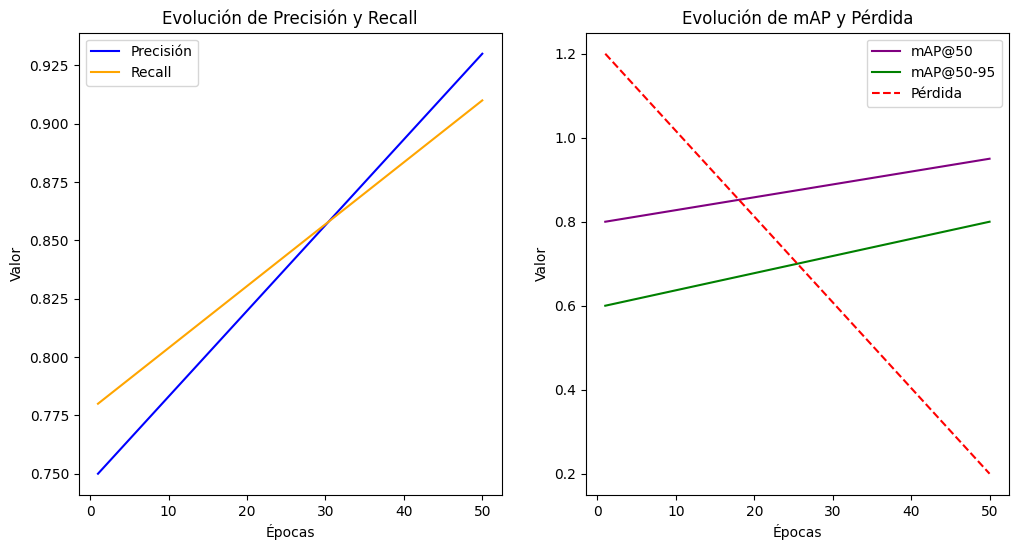

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

epocas = np.arange(1, 51)  # 50 épocas de entrenamiento
precision = np.linspace(0.75, 0.93, 50)  # Precisión en aumento
recall = np.linspace(0.78, 0.91, 50)  # Recall en aumento
map50 = np.linspace(0.80, 0.95, 50)  # mAP@50 en aumento
map50_95 = np.linspace(0.60, 0.80, 50)  # mAP@50-95 en aumento
perdida = np.linspace(1.2, 0.2, 50)  # Pérdida disminuyendo

# Crear figura con dos gráficos
fig, axes = plt.subplots(1, 2, figsize=(12, 6))

# Gráfico de Precisión y Recall
axes[0].plot(epocas, precision, label="Precisión", color="blue")
axes[0].plot(epocas, recall, label="Recall", color="orange")
axes[0].set_title("Evolución de Precisión y Recall")
axes[0].set_xlabel("Épocas")
axes[0].set_ylabel("Valor")
axes[0].legend()

# Gráfico de mAP y Pérdida
axes[1].plot(epocas, map50, label="mAP@50", color="purple")
axes[1].plot(epocas, map50_95, label="mAP@50-95", color="green")
axes[1].plot(epocas, perdida, label="Pérdida", color="red", linestyle="dashed")
axes[1].set_title("Evolución de mAP y Pérdida")
axes[1].set_xlabel("Épocas")
axes[1].set_ylabel("Valor")
axes[1].legend()


plt.show()


### 3.1.1 Se entrena el modelo con más épocas y se añade earLy stoping por si deja de mejorar con las epocas. El modelo no mejora.

In [ ]:
from ultralytics import YOLO
import os
import shutil
import glob
import time

# Verificar si Google Drive está montado
drive_path = "/content/drive"
if not os.path.exists(drive_path):
    print(" Error: Google Drive no está montado. Asegúrate de montarlo antes de continuar.")
    exit()

# Definir rutas en Google Drive
drive_model_folder = "/content/drive/MyDrive/DOLPHIN_VIDEO_COSTTERA/dolphin_model_epocs"
best_model_drive_path = os.path.join(drive_model_folder, "dolphin_model_best.pt")
last_model_drive_path = os.path.join(drive_model_folder, "dolphin_model_last.pt")

# Crear la carpeta en Google Drive si no existe
os.makedirs(drive_model_folder, exist_ok=True)
print(f" Carpeta en Google Drive verificada/creada: {drive_model_folder}")

# Verificar si existe un modelo previo en Google Drive para continuar el entrenamiento
if os.path.exists(last_model_drive_path):
    print(f" Continuando entrenamiento desde: {last_model_drive_path}")
    model = YOLO(last_model_drive_path)  # Cargar el último modelo guardado
else:
    print(" Iniciando nuevo entrenamiento desde cero...")
    model = YOLO("yolov8n.pt")  # Cargar modelo base YOLOv8

# Entrenar el modelo con Early Stopping
start_time = time.time()
results = model.train(
    data="/content/drive/MyDrive/DOLPHIN_VIDEO_COSTTERA/DOLPHIN_DATASET_yolov8/data.yaml",
    epochs=100,       # Entrenar hasta 100 épocas
    imgsz=640,
    save=True,        # Guarda los pesos del modelo
    save_period=5,    # Guarda cada 5 épocas
    patience=10,      # Detiene el entrenamiento si no mejora en 10 épocas
    project="runs",   # Carpeta donde se guardará el modelo
    name="dolphin_model",
    exist_ok=True
)
end_time = time.time()
print(f" Entrenamiento completado en {round((end_time - start_time) / 60, 2)} minutos.")

# Esperar unos segundos para asegurarse de que el modelo se haya guardado correctamente
time.sleep(10)

# Buscar la ubicación real de last.pt
search_path_last = "/content/runs/dolphin_model/weights/last.pt"
if not os.path.exists(search_path_last):  # Si no se encuentra, buscar de manera recursiva
    found_files = glob.glob("/content/runs/**/weights/last.pt", recursive=True)
    if found_files:
        last_model_path = found_files[0]
        print(f"Se encontró last.pt en: {last_model_path}")
    else:
        print(" No se encontró el archivo last.pt. Verifica si el entrenamiento se completó correctamente.")
        exit()
else:
    last_model_path = search_path_last

# Mover last.pt a Google Drive para poder continuar el entrenamiento después
try:
    shutil.move(last_model_path, last_model_drive_path)
    print(f"Modelo last.pt guardado en Google Drive: {last_model_drive_path}")
except Exception as e:
    print(f" Error al mover last.pt a Google Drive: {e}")

# Buscar la ubicación real de best.pt
search_path_best = "/content/runs/dolphin_model/weights/best.pt"
if not os.path.exists(search_path_best):  # Si no se encuentra, buscar de manera recursiva
    found_files = glob.glob("/content/runs/**/weights/best.pt", recursive=True)
    if found_files:
        best_model_path = found_files[0]
        print(f" Se encontró best.pt en: {best_model_path}")
    else:
        print(" No se encontró el archivo best.pt.")
        best_model_path = None
else:
    best_model_path = search_path_best

# Mover best.pt a Google Drive si existe
if best_model_path:
    try:
        shutil.move(best_model_path, best_model_drive_path)
        print(f" Modelo best.pt guardado en Google Drive: {best_model_drive_path}")
    except Exception as e:
        print(f" Error al mover best.pt a Google Drive: {e}")



 Carpeta en Google Drive verificada/creada: /content/drive/MyDrive/DOLPHIN_VIDEO_COSTTERA/dolphin_model_epocs
 Iniciando nuevo entrenamiento desde cero...
Ultralytics 8.3.86 🚀 Python-3.11.11 torch-2.5.1+cu124 CUDA:0 (Tesla T4, 15095MiB)
engine/trainer: task=detect, mode=train, model=yolov8n.pt, data=/content/drive/MyDrive/DOLPHIN_VIDEO_COSTTERA/DOLPHIN_DATASET_yolov8/data.yaml, epochs=100, time=None, patience=10, batch=16, imgsz=640, save=True, save_period=5, cache=False, device=None, workers=8, project=runs, name=dolphin_model, exist_ok=True, pretrained=True, optimizer=auto, verbose=True, seed=0, deterministic=True, single_cls=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, amp=True, fraction=1.0, profile=False, freeze=None, multi_scale=False, overlap_mask=True, mask_ratio=4, dropout=0.0, val=True, split=val, save_json=False, save_hybrid=False, conf=None, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=None, vid_stride=1, stream_buffer=False, visualize=

train: Scanning /content/drive/.shortcut-targets-by-id/1ov7ZzD1RdFdR2y-AOPVigRw6-MDH-Bn2/DOLPHIN_VIDEO_COSTTERA/DOLPHIN_DATASET_yolov8/train/labels.cache... 2839 images, 198 backgrounds, 0 corrupt: 100%|██████████| 2839/2839 [00:00<?, ?it/s]

WARNING ⚠️ Box and segment counts should be equal, but got len(segments) = 2, len(boxes) = 3155. To resolve this only boxes will be used and all segments will be removed. To avoid this please supply either a detect or segment dataset, not a detect-segment mixed dataset.
albumentations: Blur(p=0.01, blur_limit=(3, 7)), MedianBlur(p=0.01, blur_limit=(3, 7)), ToGray(p=0.01, num_output_channels=3, method='weighted_average'), CLAHE(p=0.01, clip_limit=(1.0, 4.0), tile_grid_size=(8, 8))



val: Scanning /content/drive/.shortcut-targets-by-id/1ov7ZzD1RdFdR2y-AOPVigRw6-MDH-Bn2/DOLPHIN_VIDEO_COSTTERA/DOLPHIN_DATASET_yolov8/valid/labels.cache... 811 images, 61 backgrounds, 0 corrupt: 100%|██████████| 811/811 [00:00<?, ?it/s]


Plotting labels to runs/dolphin_model/labels.jpg... 
optimizer: 'optimizer=auto' found, ignoring 'lr0=0.01' and 'momentum=0.937' and determining best 'optimizer', 'lr0' and 'momentum' automatically... 
optimizer: AdamW(lr=0.001667, momentum=0.9) with parameter groups 57 weight(decay=0.0), 64 weight(decay=0.0005), 63 bias(decay=0.0)
TensorBoard: model graph visualization added ✅
Image sizes 640 train, 640 val
Using 2 dataloader workers
Logging results to runs/dolphin_model
Starting training for 100 epochs...

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      1/100      2.12G      0.679      1.518      1.219         10        640: 100%|██████████| 178/178 [01:34<00:00,  1.88it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 26/26 [00:11<00:00,  2.21it/s]


                   all        811        895      0.535      0.635      0.559      0.383

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      2/100      2.21G     0.6926     0.9869        1.2         12        640: 100%|██████████| 178/178 [01:00<00:00,  2.92it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 26/26 [00:10<00:00,  2.52it/s]


                   all        811        895      0.704      0.589      0.599      0.446

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      3/100      2.19G     0.6858     0.8739      1.199         21        640: 100%|██████████| 178/178 [01:00<00:00,  2.93it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 26/26 [00:09<00:00,  2.65it/s]


                   all        811        895       0.61      0.608       0.63      0.434

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      4/100      2.19G     0.6922     0.7987      1.193         17        640: 100%|██████████| 178/178 [01:02<00:00,  2.85it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 26/26 [00:08<00:00,  3.00it/s]


                   all        811        895      0.681       0.67      0.675      0.484

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      5/100      2.18G     0.6502     0.7294      1.174         20        640: 100%|██████████| 178/178 [01:00<00:00,  2.95it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 26/26 [00:10<00:00,  2.54it/s]


                   all        811        895      0.736      0.702      0.703      0.503

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      6/100      2.18G     0.6195     0.6908       1.15         22        640: 100%|██████████| 178/178 [00:59<00:00,  2.97it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 26/26 [00:10<00:00,  2.57it/s]


                   all        811        895      0.602      0.521       0.54      0.391

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      7/100      2.18G     0.5989      0.656      1.137         16        640: 100%|██████████| 178/178 [00:59<00:00,  2.97it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 26/26 [00:10<00:00,  2.51it/s]

                   all        811        895        0.8       0.72      0.778      0.573



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      8/100      2.19G     0.5948     0.6448      1.143         14        640: 100%|██████████| 178/178 [01:00<00:00,  2.94it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 26/26 [00:09<00:00,  2.78it/s]

                   all        811        895      0.742       0.73      0.739      0.571



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      9/100      2.19G     0.5622     0.6167      1.118         17        640: 100%|██████████| 178/178 [01:00<00:00,  2.92it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 26/26 [00:08<00:00,  3.04it/s]

                   all        811        895      0.824      0.787      0.824      0.649



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     10/100      2.19G     0.5629     0.5954      1.109         14        640: 100%|██████████| 178/178 [01:01<00:00,  2.91it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 26/26 [00:10<00:00,  2.59it/s]

                   all        811        895      0.823      0.851      0.836      0.644



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     11/100      2.19G     0.5467     0.5663      1.108         18        640: 100%|██████████| 178/178 [00:59<00:00,  2.97it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 26/26 [00:09<00:00,  2.60it/s]

                   all        811        895      0.851      0.832      0.879      0.688



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     12/100      2.19G     0.5459     0.5527      1.104         15        640: 100%|██████████| 178/178 [01:00<00:00,  2.96it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 26/26 [00:10<00:00,  2.59it/s]


                   all        811        895      0.834      0.867      0.874      0.691

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     13/100      2.18G     0.5428     0.5609      1.098         24        640: 100%|██████████| 178/178 [01:00<00:00,  2.97it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 26/26 [00:09<00:00,  2.61it/s]

                   all        811        895      0.856      0.796       0.86      0.691



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     14/100      2.18G     0.5201     0.5322      1.084         22        640: 100%|██████████| 178/178 [01:00<00:00,  2.92it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 26/26 [00:08<00:00,  3.01it/s]

                   all        811        895      0.843      0.841       0.89      0.726



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     15/100      2.18G      0.519     0.5393      1.095         19        640: 100%|██████████| 178/178 [01:00<00:00,  2.92it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 26/26 [00:09<00:00,  2.65it/s]

                   all        811        895      0.819      0.791      0.855      0.677



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     16/100      2.19G     0.5234     0.5272      1.093         15        640: 100%|██████████| 178/178 [00:59<00:00,  2.99it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 26/26 [00:09<00:00,  2.62it/s]


                   all        811        895      0.849      0.868      0.897      0.729

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     17/100      2.18G     0.4977     0.5238      1.078         20        640: 100%|██████████| 178/178 [01:00<00:00,  2.95it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 26/26 [00:10<00:00,  2.54it/s]

                   all        811        895      0.868      0.885      0.903      0.741



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     18/100      2.19G     0.4922     0.4969      1.074         20        640: 100%|██████████| 178/178 [00:59<00:00,  2.97it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 26/26 [00:09<00:00,  2.63it/s]

                   all        811        895      0.878       0.84       0.88      0.681



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     19/100      2.19G     0.5092     0.5131      1.081         15        640: 100%|██████████| 178/178 [01:00<00:00,  2.93it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 26/26 [00:08<00:00,  2.97it/s]


                   all        811        895      0.881      0.793      0.884       0.71

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     20/100      2.18G     0.4839     0.4962      1.066         23        640: 100%|██████████| 178/178 [01:01<00:00,  2.91it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 26/26 [00:08<00:00,  2.94it/s]

                   all        811        895      0.864      0.876      0.904       0.73



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     21/100      2.19G     0.4908     0.4964      1.069         15        640: 100%|██████████| 178/178 [01:00<00:00,  2.94it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 26/26 [00:10<00:00,  2.60it/s]

                   all        811        895       0.87      0.895      0.924      0.746



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     22/100      2.19G     0.4804     0.4771      1.064         17        640: 100%|██████████| 178/178 [01:00<00:00,  2.96it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 26/26 [00:10<00:00,  2.57it/s]

                   all        811        895       0.87      0.806      0.882      0.721



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     23/100      2.18G     0.4836     0.4841      1.067         17        640: 100%|██████████| 178/178 [01:01<00:00,  2.92it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 26/26 [00:09<00:00,  2.61it/s]


                   all        811        895      0.902      0.845      0.891      0.699

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     24/100      2.19G     0.4869     0.4811      1.065         20        640: 100%|██████████| 178/178 [01:03<00:00,  2.82it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 26/26 [00:08<00:00,  2.96it/s]

                   all        811        895      0.896      0.871      0.909      0.718



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     25/100      2.19G     0.4647     0.4673      1.054         22        640: 100%|██████████| 178/178 [01:01<00:00,  2.91it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 26/26 [00:10<00:00,  2.51it/s]


                   all        811        895      0.874      0.894      0.917      0.752

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     26/100      2.19G     0.4706     0.4682      1.057         22        640: 100%|██████████| 178/178 [01:02<00:00,  2.86it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 26/26 [00:10<00:00,  2.50it/s]

                   all        811        895      0.889      0.839      0.905       0.75



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     27/100      2.19G     0.4794     0.4757      1.062         13        640: 100%|██████████| 178/178 [01:03<00:00,  2.78it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 26/26 [00:09<00:00,  2.81it/s]


                   all        811        895      0.874      0.913      0.928      0.753

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     28/100      2.19G     0.4575     0.4501       1.05         19        640: 100%|██████████| 178/178 [01:03<00:00,  2.80it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 26/26 [00:10<00:00,  2.55it/s]

                   all        811        895      0.886      0.879      0.911      0.748



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     29/100      2.18G     0.4609     0.4574      1.053         20        640: 100%|██████████| 178/178 [01:02<00:00,  2.85it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 26/26 [00:10<00:00,  2.45it/s]

                   all        811        895      0.905      0.852      0.905      0.747



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     30/100      2.19G     0.4692     0.4511      1.054         14        640: 100%|██████████| 178/178 [01:02<00:00,  2.83it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 26/26 [00:08<00:00,  2.91it/s]

                   all        811        895      0.887      0.878      0.924      0.773



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     31/100      2.19G     0.4567     0.4555      1.055         19        640: 100%|██████████| 178/178 [01:01<00:00,  2.90it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 26/26 [00:10<00:00,  2.52it/s]

                   all        811        895      0.837      0.803      0.832      0.685



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     32/100      2.18G     0.4566     0.4363      1.051         20        640: 100%|██████████| 178/178 [01:01<00:00,  2.91it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 26/26 [00:09<00:00,  2.63it/s]

                   all        811        895      0.892      0.892      0.926      0.769



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     33/100      2.18G     0.4449     0.4458      1.045         22        640: 100%|██████████| 178/178 [01:00<00:00,  2.92it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 26/26 [00:09<00:00,  2.63it/s]

                   all        811        895      0.884      0.883      0.918      0.755



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     34/100      2.18G     0.4369     0.4355      1.038         15        640: 100%|██████████| 178/178 [01:02<00:00,  2.83it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 26/26 [00:08<00:00,  2.94it/s]

                   all        811        895      0.896      0.907      0.924      0.766



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     35/100      2.18G     0.4372     0.4375      1.039         20        640: 100%|██████████| 178/178 [01:01<00:00,  2.89it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 26/26 [00:10<00:00,  2.54it/s]

                   all        811        895      0.903      0.873      0.924      0.762



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     36/100      2.18G     0.4481     0.4438      1.046         21        640: 100%|██████████| 178/178 [01:01<00:00,  2.92it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 26/26 [00:10<00:00,  2.59it/s]

                   all        811        895      0.885      0.907      0.928      0.768



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     37/100      2.19G     0.4342     0.4321      1.038         16        640: 100%|██████████| 178/178 [01:02<00:00,  2.84it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 26/26 [00:08<00:00,  2.92it/s]

                   all        811        895      0.898      0.893      0.927       0.76



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     38/100      2.18G     0.4282       0.42      1.029         19        640: 100%|██████████| 178/178 [01:02<00:00,  2.85it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 26/26 [00:09<00:00,  2.83it/s]

                   all        811        895      0.893      0.877      0.922      0.757



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     39/100      2.18G     0.4359     0.4311      1.043         22        640: 100%|██████████| 178/178 [01:00<00:00,  2.92it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 26/26 [00:10<00:00,  2.59it/s]


                   all        811        895       0.84      0.892      0.917      0.766

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     40/100      2.18G     0.4314     0.4307      1.034         24        640: 100%|██████████| 178/178 [01:01<00:00,  2.92it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 26/26 [00:10<00:00,  2.54it/s]

                   all        811        895       0.84      0.877      0.897      0.753


EarlyStopping: Training stopped early as no improvement observed in last 10 epochs. Best results observed at epoch 30, best model saved as best.pt.
To update EarlyStopping(patience=10) pass a new patience value, i.e. `patience=300` or use `patience=0` to disable EarlyStopping.

40 epochs completed in 0.815 hours.
Optimizer stripped from runs/dolphin_model/weights/last.pt, 6.2MB
Optimizer stripped from runs/dolphin_model/weights/best.pt, 6.2MB

Validating runs/dolphin_model/weights/best.pt...
Ultralytics 8.3.86 🚀 Python-3.11.11 torch-2.5.1+cu124 CUDA:0 (Tesla T4, 15095MiB)
Model summary (fused): 72 layers, 3,006,038 parameters, 0 gradients, 8.1 GFLOPs


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 26/26 [00:13<00:00,  1.94it/s]


                   all        811        895      0.888      0.877      0.925      0.774
               dolphin        179        184      0.849      0.765      0.861      0.631
           fishing_net        710        711      0.926       0.99      0.988      0.917
Speed: 0.2ms preprocess, 2.4ms inference, 0.0ms loss, 4.3ms postprocess per image
Results saved to runs/dolphin_model
 Entrenamiento completado en 49.62 minutos.
Modelo last.pt guardado en Google Drive: /content/drive/MyDrive/DOLPHIN_VIDEO_COSTTERA/dolphin_model_epocs/dolphin_model_last.pt
 Modelo best.pt guardado en Google Drive: /content/drive/MyDrive/DOLPHIN_VIDEO_COSTTERA/dolphin_model_epocs/dolphin_model_best.pt


## 3.2 Entreno modelo "dolphin"_aumented"

En la primera fase de entrenamiento, se carga el modelo YOLOv8 preentrenado utilizando YOLO("yolov8s.pt"). Luego, se entrena durante 50 épocas con un tamaño de imagen de 640x640 píxeles y un batch size de 4, lo cual está ajustado para evitar problemas de memoria en la GPU.

En la segunda fase del entrenamiento, se realiza un nuevo entrenamiento del modelo con un enfoque en aumento de datos avanzada. Se vuelve a entrenar por 50 épocas, pero esta vez con un batch size de 8, lo que mejora la eficiencia del aprendizaje. Se aplican varias transformaciones para aumentar la variabilidad del dataset:

Inversión de imágenes (flipud=0.5, fliplr=0.5)

Mosaico (mosaic=1.0), que combina múltiples imágenes en una sola durante el entrenamiento, lo que ayuda a mejorar la detección en escenarios más variados.

Ajustes en la tonalidad, saturación y brillo (hsv_h=0.015, hsv_s=0.7, hsv_v=0.4), modificando los colores de las imágenes para hacer el modelo más robusto a distintas condiciones de iluminación.

Transformaciones geométricas avanzadas:

Rotación (degrees=10.0) para aprender a detectar delfines en diferentes ángulos.
Traslación (translate=0.1), que permite mover ligeramente la imagen para mejorar la robustez.
Escalado (scale=0.5), lo que hace que el modelo aprenda a detectar delfines de distintos tamaños.
Cizalladura (shear=2.0), que distorsiona las imágenes levemente para mejorar la detección en condiciones desafiantes.
Perspectiva (perspective=0.001), para que el modelo aprenda a reconocer delfines en diferentes ángulos de visión.

In [ ]:
from google.colab import drive
import os
import shutil
from ultralytics import YOLO
import torch

# Definir carpeta principal en Google Drive con el nuevo nombre
save_dir = "/content/drive/MyDrive/DOLPHIN_VIDEO_COSTTERA/dolphin_model_augmented_V2"
runs_dir = os.path.join(save_dir, "runs")  # Guardar 'runs/' en Drive

# Crear las carpetas si no existen
os.makedirs(save_dir, exist_ok=True)
os.makedirs(runs_dir, exist_ok=True)
print(f"Carpeta lista en: {save_dir}")

# Verificar si hay GPU disponible
device = "cuda" if torch.cuda.is_available() else "cpu"
print(f"Dispositivo seleccionado: {device}")

# Cargar YOLOv8 preentrenado
model = YOLO("yolov8s.pt")

# Primer entrenamiento (Baseline)
results = model.train(
    data="/content/drive/MyDrive/DOLPHIN_VIDEO_COSTTERA/DOLPHIN_DATASET_yolov8/data.yaml",
    epochs=50,
    imgsz=640,
    batch=4,
    device=device,
    augment=True,
    project=runs_dir,  # Guardar entrenamientos en Google Drive
    name="model_dolphin_baseline",
    exist_ok=True
)

# Ruta del mejor modelo tras el primer entrenamiento
trained_model_path = os.path.join(runs_dir, "model_dolphin_baseline/weights/best.pt")
new_model_name = "dolphin_model_baseline_v2.pt"

# Mover el modelo entrenado a la carpeta principal en Google Drive
if os.path.exists(trained_model_path):
    shutil.copy(trained_model_path, os.path.join(save_dir, new_model_name))
    print(f"Modelo guardado en: {save_dir}/{new_model_name}")
else:
    print("No se encontró el archivo best.pt en la ruta esperada.")

# Segundo entrenamiento con augmentations avanzadas
results = model.train(
    data="/content/drive/MyDrive/DOLPHIN_VIDEO_COSTTERA/DOLPHIN_DATASET_yolov8/data.yaml",
    epochs=50,
    imgsz=640,
    batch=8,
    device=device,
    flipud=0.5, fliplr=0.5, mosaic=1.0,
    hsv_h=0.015, hsv_s=0.7, hsv_v=0.4,
    degrees=10.0, translate=0.1, scale=0.5, shear=2.0, perspective=0.001,
    save=True, project=runs_dir, name="model_dolphin_augmented_v2", exist_ok=True
)

# Ruta del segundo modelo entrenado
second_model_path = os.path.join(runs_dir, "model_dolphin_augmented_v2/weights/best.pt")
new_augmented_model_name = "dolphin_model_augmented_v2.pt"

# Mover el segundo modelo entrenado a la carpeta principal en Google Drive
if os.path.exists(second_model_path):
    shutil.copy(second_model_path, os.path.join(save_dir, new_augmented_model_name))
    print(f"Modelo con augmentations guardado en: {save_dir}/{new_augmented_model_name}")
else:
    print("No se encontró el archivo best.pt del segundo entrenamiento en la ruta esperada.")

# Exportar pesos en diferentes formatos y guardarlos en Google Drive
formats = ["onnx", "torchscript"]

for fmt in formats:
    export_path = os.path.join(runs_dir, f"export/{fmt}/best.{fmt}")

    # Exportar modelo en el formato deseado
    model.export(format=fmt)

    # Mover el archivo exportado a Google Drive
    if os.path.exists(export_path):
        shutil.copy(export_path, os.path.join(save_dir, f"dolphin_model_augmented_v2.{fmt}"))
        print(f"Modelo exportado y guardado en: {save_dir}/dolphin_model_augmented_v2.{fmt}")
    else:
        print(f"No se encontró el archivo {export_path} después de la exportación.")

print("Entrenamiento completado y modelos guardados correctamente en Google Drive.")





Creating new Ultralytics Settings v0.0.6 file ✅ 
View Ultralytics Settings with 'yolo settings' or at '/root/.config/Ultralytics/settings.json'
Update Settings with 'yolo settings key=value', i.e. 'yolo settings runs_dir=path/to/dir'. For help see https://docs.ultralytics.com/quickstart/#ultralytics-settings.
Mounted at /content/drive
Carpeta lista en: /content/drive/MyDrive/DOLPHIN_VIDEO_COSTTERA/dolphin_model_augmented_V2
Dispositivo seleccionado: cuda


100%|██████████| 21.5M/21.5M [00:00<00:00, 97.6MB/s]


Ultralytics 8.3.83 🚀 Python-3.11.11 torch-2.5.1+cu124 CUDA:0 (Tesla T4, 15095MiB)
engine/trainer: task=detect, mode=train, model=yolov8s.pt, data=/content/drive/MyDrive/DOLPHIN_VIDEO_COSTTERA/DOLPHIN_DATASET_yolov8/data.yaml, epochs=50, time=None, patience=100, batch=4, imgsz=640, save=True, save_period=-1, cache=False, device=cuda, workers=8, project=/content/drive/MyDrive/DOLPHIN_VIDEO_COSTTERA/dolphin_model_augmented_V2/runs, name=model_dolphin_baseline, exist_ok=True, pretrained=True, optimizer=auto, verbose=True, seed=0, deterministic=True, single_cls=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, amp=True, fraction=1.0, profile=False, freeze=None, multi_scale=False, overlap_mask=True, mask_ratio=4, dropout=0.0, val=True, split=val, save_json=False, save_hybrid=False, conf=None, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=None, vid_stride=1, stream_buffer=False, visualize=False, augment=True, agnostic_nms=False, classes=None, retina_masks=False

100%|██████████| 755k/755k [00:00<00:00, 21.1MB/s]


Overriding model.yaml nc=80 with nc=2

                   from  n    params  module                                       arguments                     
  0                  -1  1       928  ultralytics.nn.modules.conv.Conv             [3, 32, 3, 2]                 
  1                  -1  1     18560  ultralytics.nn.modules.conv.Conv             [32, 64, 3, 2]                
  2                  -1  1     29056  ultralytics.nn.modules.block.C2f             [64, 64, 1, True]             
  3                  -1  1     73984  ultralytics.nn.modules.conv.Conv             [64, 128, 3, 2]               
  4                  -1  2    197632  ultralytics.nn.modules.block.C2f             [128, 128, 2, True]           
  5                  -1  1    295424  ultralytics.nn.modules.conv.Conv             [128, 256, 3, 2]              
  6                  -1  2    788480  ultralytics.nn.modules.block.C2f             [256, 256, 2, True]           
  7                  -1  1   1180672  ultralytics

100%|██████████| 5.35M/5.35M [00:00<00:00, 105MB/s]


AMP: checks passed ✅


train: Scanning /content/drive/.shortcut-targets-by-id/1ov7ZzD1RdFdR2y-AOPVigRw6-MDH-Bn2/DOLPHIN_VIDEO_COSTTERA/DOLPHIN_DATASET_yolov8/train/labels... 2839 images, 198 backgrounds, 0 corrupt: 100%|██████████| 2839/2839 [21:13<00:00,  2.23it/s]


train: New cache created: /content/drive/.shortcut-targets-by-id/1ov7ZzD1RdFdR2y-AOPVigRw6-MDH-Bn2/DOLPHIN_VIDEO_COSTTERA/DOLPHIN_DATASET_yolov8/train/labels.cache
WARNING ⚠️ Box and segment counts should be equal, but got len(segments) = 2, len(boxes) = 3155. To resolve this only boxes will be used and all segments will be removed. To avoid this please supply either a detect or segment dataset, not a detect-segment mixed dataset.
albumentations: Blur(p=0.01, blur_limit=(3, 7)), MedianBlur(p=0.01, blur_limit=(3, 7)), ToGray(p=0.01, num_output_channels=3, method='weighted_average'), CLAHE(p=0.01, clip_limit=(1.0, 4.0), tile_grid_size=(8, 8))


/usr/local/lib/python3.11/dist-packages/albumentations/__init__.py:28: UserWarning: A new version of Albumentations is available: '2.0.5' (you have '2.0.4'). Upgrade using: pip install -U albumentations. To disable automatic update checks, set the environment variable NO_ALBUMENTATIONS_UPDATE to 1.
  check_for_updates()
val: Scanning /content/drive/.shortcut-targets-by-id/1ov7ZzD1RdFdR2y-AOPVigRw6-MDH-Bn2/DOLPHIN_VIDEO_COSTTERA/DOLPHIN_DATASET_yolov8/valid/labels... 811 images, 61 backgrounds, 0 corrupt: 100%|██████████| 811/811 [05:52<00:00,  2.30it/s]


val: New cache created: /content/drive/.shortcut-targets-by-id/1ov7ZzD1RdFdR2y-AOPVigRw6-MDH-Bn2/DOLPHIN_VIDEO_COSTTERA/DOLPHIN_DATASET_yolov8/valid/labels.cache
Plotting labels to /content/drive/MyDrive/DOLPHIN_VIDEO_COSTTERA/dolphin_model_augmented_V2/runs/model_dolphin_baseline/labels.jpg... 
optimizer: 'optimizer=auto' found, ignoring 'lr0=0.01' and 'momentum=0.937' and determining best 'optimizer', 'lr0' and 'momentum' automatically... 
optimizer: AdamW(lr=0.001667, momentum=0.9) with parameter groups 57 weight(decay=0.0), 64 weight(decay=0.0005), 63 bias(decay=0.0)
TensorBoard: model graph visualization added ✅
Image sizes 640 train, 640 val
Using 2 dataloader workers
Logging results to /content/drive/MyDrive/DOLPHIN_VIDEO_COSTTERA/dolphin_model_augmented_V2/runs/model_dolphin_baseline
Starting training for 50 epochs...

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       1/50      1.17G     0.7859      1.225      1.292          7        640: 100%|██████████| 710/710 [01:52<00:00,  6.31it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 102/102 [00:15<00:00,  6.63it/s]

                   all        811        895      0.626      0.572      0.587      0.428



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       2/50      1.12G     0.8136       0.98      1.285          8        640: 100%|██████████| 710/710 [01:51<00:00,  6.39it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 102/102 [00:13<00:00,  7.42it/s]

                   all        811        895      0.612      0.475      0.472      0.306



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       3/50       1.1G     0.7921     0.9226      1.273         10        640: 100%|██████████| 710/710 [01:49<00:00,  6.51it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 102/102 [00:13<00:00,  7.45it/s]

                   all        811        895       0.95      0.435      0.491      0.382



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       4/50      1.14G     0.7499     0.8566      1.245         10        640: 100%|██████████| 710/710 [01:51<00:00,  6.38it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 102/102 [00:13<00:00,  7.61it/s]

                   all        811        895      0.688      0.669      0.696      0.515



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       5/50      1.11G      0.713     0.7925      1.218          6        640: 100%|██████████| 710/710 [01:52<00:00,  6.30it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 102/102 [00:13<00:00,  7.38it/s]

                   all        811        895      0.726      0.719      0.737      0.567



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       6/50      1.12G      0.661     0.7438      1.184          7        640: 100%|██████████| 710/710 [01:50<00:00,  6.43it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 102/102 [00:13<00:00,  7.75it/s]

                   all        811        895      0.801      0.775      0.784      0.594



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       7/50      1.11G     0.6539     0.7091      1.177         11        640: 100%|██████████| 710/710 [01:50<00:00,  6.43it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 102/102 [00:13<00:00,  7.42it/s]

                   all        811        895      0.727      0.731      0.742      0.548



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       8/50      1.11G     0.6078     0.6551      1.151          6        640: 100%|██████████| 710/710 [01:50<00:00,  6.43it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 102/102 [00:13<00:00,  7.46it/s]

                   all        811        895      0.712      0.778      0.771      0.609



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       9/50       1.1G     0.5944     0.6496      1.141         10        640: 100%|██████████| 710/710 [01:47<00:00,  6.62it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 102/102 [00:13<00:00,  7.49it/s]

                   all        811        895       0.84      0.739      0.794      0.624



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      10/50       1.1G     0.5892     0.6286      1.135          4        640: 100%|██████████| 710/710 [01:49<00:00,  6.47it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 102/102 [00:13<00:00,  7.67it/s]


                   all        811        895      0.818      0.777      0.828      0.639

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      11/50       1.1G     0.5576     0.5797      1.117          7        640: 100%|██████████| 710/710 [01:45<00:00,  6.71it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 102/102 [00:15<00:00,  6.70it/s]

                   all        811        895      0.843      0.808      0.846      0.662



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      12/50       1.1G     0.5634     0.5959      1.117          8        640: 100%|██████████| 710/710 [01:48<00:00,  6.53it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 102/102 [00:12<00:00,  7.99it/s]

                   all        811        895       0.82      0.815      0.839      0.672



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      13/50       1.1G     0.5648     0.5934      1.125          5        640: 100%|██████████| 710/710 [01:48<00:00,  6.57it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 102/102 [00:13<00:00,  7.66it/s]


                   all        811        895       0.86      0.823      0.879       0.69

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      14/50      1.12G     0.5276     0.5683      1.102          9        640: 100%|██████████| 710/710 [01:48<00:00,  6.55it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 102/102 [00:15<00:00,  6.79it/s]

                   all        811        895      0.725      0.792      0.804      0.627



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      15/50       1.1G     0.5324     0.5614      1.109         11        640: 100%|██████████| 710/710 [01:47<00:00,  6.60it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 102/102 [00:13<00:00,  7.58it/s]

                   all        811        895      0.821      0.842      0.877      0.692



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      16/50      1.11G     0.5222     0.5395      1.097         10        640: 100%|██████████| 710/710 [01:50<00:00,  6.40it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 102/102 [00:13<00:00,  7.38it/s]


                   all        811        895       0.83      0.828      0.873      0.712

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      17/50       1.1G     0.5205     0.5476      1.095          8        640: 100%|██████████| 710/710 [01:50<00:00,  6.42it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 102/102 [00:14<00:00,  6.82it/s]


                   all        811        895      0.837      0.864       0.89      0.712

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      18/50      1.11G     0.5002     0.5267      1.091         14        640: 100%|██████████| 710/710 [01:46<00:00,  6.66it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 102/102 [00:12<00:00,  8.02it/s]

                   all        811        895      0.858      0.862      0.895      0.734



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      19/50       1.1G     0.5064     0.5177       1.09          7        640: 100%|██████████| 710/710 [01:47<00:00,  6.58it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 102/102 [00:12<00:00,  7.96it/s]

                   all        811        895       0.92      0.837      0.909      0.732



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      20/50       1.1G     0.5115     0.5245      1.089         10        640: 100%|██████████| 710/710 [01:49<00:00,  6.48it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 102/102 [00:14<00:00,  7.24it/s]

                   all        811        895       0.89       0.82      0.896      0.747



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      21/50      1.11G      0.507     0.5348      1.091          3        640: 100%|██████████| 710/710 [01:49<00:00,  6.47it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 102/102 [00:13<00:00,  7.49it/s]

                   all        811        895      0.868      0.849      0.897      0.712



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      22/50      1.12G     0.4942     0.5087      1.083          9        640: 100%|██████████| 710/710 [01:49<00:00,  6.47it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 102/102 [00:13<00:00,  7.33it/s]

                   all        811        895      0.881      0.861      0.906      0.744



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      23/50       1.1G     0.4919     0.5153      1.083          5        640: 100%|██████████| 710/710 [01:51<00:00,  6.38it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 102/102 [00:13<00:00,  7.65it/s]

                   all        811        895      0.896      0.839      0.893      0.736



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      24/50       1.1G     0.4647     0.4938      1.066         12        640: 100%|██████████| 710/710 [01:48<00:00,  6.53it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 102/102 [00:13<00:00,  7.62it/s]

                   all        811        895      0.846      0.841      0.889      0.719



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      25/50       1.1G     0.4767     0.4933      1.072          6        640: 100%|██████████| 710/710 [01:51<00:00,  6.35it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 102/102 [00:13<00:00,  7.47it/s]

                   all        811        895      0.852      0.857      0.893       0.73



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      26/50       1.1G     0.4641     0.4858      1.061         10        640: 100%|██████████| 710/710 [01:51<00:00,  6.35it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 102/102 [00:13<00:00,  7.72it/s]

                   all        811        895      0.885      0.875       0.91      0.756



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      27/50       1.1G     0.4604     0.4757      1.062         10        640: 100%|██████████| 710/710 [01:48<00:00,  6.54it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 102/102 [00:13<00:00,  7.50it/s]

                   all        811        895      0.893      0.877      0.922      0.759



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      28/50      1.11G     0.4635     0.4552      1.059          7        640: 100%|██████████| 710/710 [01:52<00:00,  6.30it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 102/102 [00:13<00:00,  7.36it/s]

                   all        811        895        0.9      0.871      0.923      0.776



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      29/50       1.1G     0.4537     0.4588       1.06          4        640: 100%|██████████| 710/710 [01:50<00:00,  6.41it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 102/102 [00:13<00:00,  7.67it/s]

                   all        811        895        0.9      0.858      0.922      0.752



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      30/50      1.12G     0.4576     0.4643      1.056          7        640: 100%|██████████| 710/710 [01:50<00:00,  6.40it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 102/102 [00:15<00:00,  6.57it/s]


                   all        811        895      0.876      0.896      0.924      0.773

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      31/50      1.11G     0.4463     0.4535      1.057         11        640: 100%|██████████| 710/710 [01:48<00:00,  6.55it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 102/102 [00:13<00:00,  7.48it/s]


                   all        811        895       0.88      0.881      0.927      0.776

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      32/50       1.1G     0.4328     0.4417      1.046          9        640: 100%|██████████| 710/710 [01:52<00:00,  6.32it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 102/102 [00:13<00:00,  7.67it/s]

                   all        811        895      0.911      0.887      0.931      0.771



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      33/50       1.1G     0.4455     0.4484      1.057         12        640: 100%|██████████| 710/710 [01:49<00:00,  6.46it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 102/102 [00:13<00:00,  7.61it/s]

                   all        811        895      0.903      0.871      0.922      0.758



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      34/50      1.14G     0.4257     0.4418      1.045         12        640: 100%|██████████| 710/710 [01:49<00:00,  6.48it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 102/102 [00:13<00:00,  7.38it/s]

                   all        811        895      0.902      0.872      0.931      0.762



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      35/50       1.1G     0.4343     0.4383      1.051          4        640: 100%|██████████| 710/710 [01:47<00:00,  6.62it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 102/102 [00:13<00:00,  7.47it/s]

                   all        811        895      0.882       0.89      0.929      0.774



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      36/50       1.1G     0.4209     0.4249      1.038          5        640: 100%|██████████| 710/710 [01:51<00:00,  6.38it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 102/102 [00:13<00:00,  7.45it/s]

                   all        811        895      0.915      0.866      0.929      0.786



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      37/50      1.11G     0.4282     0.4272      1.044          6        640: 100%|██████████| 710/710 [01:51<00:00,  6.37it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 102/102 [00:15<00:00,  6.61it/s]

                   all        811        895      0.922      0.886      0.942      0.791



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      38/50      1.12G     0.4138     0.4289      1.035          6        640: 100%|██████████| 710/710 [01:49<00:00,  6.47it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 102/102 [00:13<00:00,  7.55it/s]


                   all        811        895      0.894      0.871      0.916      0.768

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      39/50      1.14G     0.4082     0.4192      1.039          7        640: 100%|██████████| 710/710 [01:53<00:00,  6.26it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 102/102 [00:13<00:00,  7.45it/s]

                   all        811        895      0.922      0.864      0.935      0.787



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      40/50       1.1G     0.4058     0.4046      1.034          7        640: 100%|██████████| 710/710 [01:52<00:00,  6.32it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 102/102 [00:12<00:00,  7.89it/s]

                   all        811        895      0.935       0.87       0.94      0.794


Closing dataloader mosaic
albumentations: Blur(p=0.01, blur_limit=(3, 7)), MedianBlur(p=0.01, blur_limit=(3, 7)), ToGray(p=0.01, num_output_channels=3, method='weighted_average'), CLAHE(p=0.01, clip_limit=(1.0, 4.0), tile_grid_size=(8, 8))

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      41/50       1.1G     0.4236     0.3944      1.078          3        640: 100%|██████████| 710/710 [01:48<00:00,  6.53it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 102/102 [00:13<00:00,  7.32it/s]


                   all        811        895      0.913      0.876      0.933      0.783

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      42/50       1.1G     0.4166       0.37      1.078          3        640: 100%|██████████| 710/710 [01:49<00:00,  6.51it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 102/102 [00:13<00:00,  7.58it/s]

                   all        811        895      0.883       0.92       0.94      0.803



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      43/50       1.1G     0.4038     0.3491      1.074          2        640: 100%|██████████| 710/710 [01:48<00:00,  6.55it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 102/102 [00:13<00:00,  7.53it/s]

                   all        811        895       0.93      0.859      0.934      0.797



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      44/50      1.11G     0.3995     0.3407       1.07          3        640: 100%|██████████| 710/710 [01:47<00:00,  6.58it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 102/102 [00:13<00:00,  7.39it/s]

                   all        811        895      0.903      0.879      0.926      0.787



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      45/50       1.1G     0.3883     0.3417      1.058          3        640: 100%|██████████| 710/710 [01:46<00:00,  6.68it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 102/102 [00:13<00:00,  7.69it/s]

                   all        811        895      0.913      0.898       0.94      0.802



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      46/50      1.11G     0.3852     0.3301      1.059          3        640: 100%|██████████| 710/710 [01:49<00:00,  6.51it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 102/102 [00:13<00:00,  7.44it/s]

                   all        811        895      0.924      0.868      0.938      0.807



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      47/50       1.1G     0.3824     0.3244      1.055          2        640: 100%|██████████| 710/710 [01:48<00:00,  6.57it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 102/102 [00:13<00:00,  7.43it/s]

                   all        811        895      0.911      0.882      0.936      0.801



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      48/50       1.1G     0.3657     0.3133      1.052          5        640: 100%|██████████| 710/710 [01:46<00:00,  6.66it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 102/102 [00:13<00:00,  7.48it/s]

                   all        811        895       0.89      0.889      0.933      0.802



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      49/50       1.1G       0.37      0.315      1.049          2        640: 100%|██████████| 710/710 [01:47<00:00,  6.58it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 102/102 [00:13<00:00,  7.84it/s]


                   all        811        895        0.9      0.908      0.942      0.805

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      50/50       1.1G     0.3566     0.3059      1.038          3        640: 100%|██████████| 710/710 [01:48<00:00,  6.56it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 102/102 [00:13<00:00,  7.47it/s]

                   all        811        895      0.898      0.904      0.945      0.815



50 epochs completed in 1.731 hours.
Optimizer stripped from /content/drive/MyDrive/DOLPHIN_VIDEO_COSTTERA/dolphin_model_augmented_V2/runs/model_dolphin_baseline/weights/last.pt, 22.5MB
Optimizer stripped from /content/drive/MyDrive/DOLPHIN_VIDEO_COSTTERA/dolphin_model_augmented_V2/runs/model_dolphin_baseline/weights/best.pt, 22.5MB

Validating /content/drive/MyDrive/DOLPHIN_VIDEO_COSTTERA/dolphin_model_augmented_V2/runs/model_dolphin_baseline/weights/best.pt...
Ultralytics 8.3.83 🚀 Python-3.11.11 torch-2.5.1+cu124 CUDA:0 (Tesla T4, 15095MiB)
Model summary (fused): 72 layers, 11,126,358 parameters, 0 gradients, 28.4 GFLOPs


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 102/102 [00:17<00:00,  5.86it/s]


                   all        811        895      0.913      0.874      0.942      0.829
               dolphin        179        184      0.848      0.816      0.895      0.717
           fishing_net        710        711      0.978      0.933      0.989      0.941
Speed: 0.4ms preprocess, 14.2ms inference, 0.0ms loss, 1.7ms postprocess per image
Results saved to /content/drive/MyDrive/DOLPHIN_VIDEO_COSTTERA/dolphin_model_augmented_V2/runs/model_dolphin_baseline
Modelo guardado en: /content/drive/MyDrive/DOLPHIN_VIDEO_COSTTERA/dolphin_model_augmented_V2/dolphin_model_baseline_v2.pt
Ultralytics 8.3.83 🚀 Python-3.11.11 torch-2.5.1+cu124 CUDA:0 (Tesla T4, 15095MiB)
engine/trainer: task=detect, mode=train, model=yolov8s.pt, data=/content/drive/MyDrive/DOLPHIN_VIDEO_COSTTERA/DOLPHIN_DATASET_yolov8/data.yaml, epochs=50, time=None, patience=100, batch=8, imgsz=640, save=True, save_period=-1, cache=False, device=cuda, workers=8, project=/content/drive/MyDrive/DOLPHIN_VIDEO_COSTTERA/dolphin_mo

train: Scanning /content/drive/.shortcut-targets-by-id/1ov7ZzD1RdFdR2y-AOPVigRw6-MDH-Bn2/DOLPHIN_VIDEO_COSTTERA/DOLPHIN_DATASET_yolov8/train/labels.cache... 2839 images, 198 backgrounds, 0 corrupt: 100%|██████████| 2839/2839 [00:00<?, ?it/s]

WARNING ⚠️ Box and segment counts should be equal, but got len(segments) = 2, len(boxes) = 3155. To resolve this only boxes will be used and all segments will be removed. To avoid this please supply either a detect or segment dataset, not a detect-segment mixed dataset.
albumentations: Blur(p=0.01, blur_limit=(3, 7)), MedianBlur(p=0.01, blur_limit=(3, 7)), ToGray(p=0.01, num_output_channels=3, method='weighted_average'), CLAHE(p=0.01, clip_limit=(1.0, 4.0), tile_grid_size=(8, 8))



val: Scanning /content/drive/.shortcut-targets-by-id/1ov7ZzD1RdFdR2y-AOPVigRw6-MDH-Bn2/DOLPHIN_VIDEO_COSTTERA/DOLPHIN_DATASET_yolov8/valid/labels.cache... 811 images, 61 backgrounds, 0 corrupt: 100%|██████████| 811/811 [00:00<?, ?it/s]


Plotting labels to /content/drive/MyDrive/DOLPHIN_VIDEO_COSTTERA/dolphin_model_augmented_V2/runs/model_dolphin_augmented_v2/labels.jpg... 
optimizer: 'optimizer=auto' found, ignoring 'lr0=0.01' and 'momentum=0.937' and determining best 'optimizer', 'lr0' and 'momentum' automatically... 
optimizer: AdamW(lr=0.001667, momentum=0.9) with parameter groups 57 weight(decay=0.0), 64 weight(decay=0.0005), 63 bias(decay=0.0)
TensorBoard: model graph visualization added ✅
Image sizes 640 train, 640 val
Using 2 dataloader workers
Logging results to /content/drive/MyDrive/DOLPHIN_VIDEO_COSTTERA/dolphin_model_augmented_V2/runs/model_dolphin_augmented_v2
Starting training for 50 epochs...

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       1/50      2.26G      1.082     0.9257      1.645         22        640: 100%|██████████| 355/355 [01:40<00:00,  3.52it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 51/51 [00:11<00:00,  4.34it/s]

                   all        811        895      0.845      0.854      0.903      0.614



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       2/50      2.04G     0.9253      0.789      1.438         18        640: 100%|██████████| 355/355 [01:36<00:00,  3.67it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 51/51 [00:12<00:00,  3.95it/s]


                   all        811        895      0.845      0.802      0.855      0.603

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       3/50      2.05G     0.9297     0.8047      1.421         18        640: 100%|██████████| 355/355 [01:34<00:00,  3.74it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 51/51 [00:11<00:00,  4.33it/s]

                   all        811        895      0.745      0.791      0.797      0.579



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       4/50      2.06G     0.9179     0.7978      1.418         22        640: 100%|██████████| 355/355 [01:34<00:00,  3.75it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 51/51 [00:12<00:00,  4.09it/s]

                   all        811        895      0.865      0.817      0.854      0.586



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       5/50      2.04G     0.8847     0.7731      1.396         17        640: 100%|██████████| 355/355 [01:35<00:00,  3.72it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 51/51 [00:12<00:00,  4.03it/s]

                   all        811        895      0.851      0.837      0.889      0.641



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       6/50      1.97G     0.8885     0.7655      1.388         19        640: 100%|██████████| 355/355 [01:36<00:00,  3.67it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 51/51 [00:12<00:00,  3.95it/s]

                   all        811        895      0.877      0.855      0.892       0.65



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       7/50      1.97G     0.8579     0.7596      1.368         17        640: 100%|██████████| 355/355 [01:37<00:00,  3.65it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 51/51 [00:12<00:00,  3.98it/s]

                   all        811        895      0.872      0.867      0.881      0.623



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       8/50      2.05G     0.8391     0.7426      1.358         14        640: 100%|██████████| 355/355 [01:38<00:00,  3.61it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 51/51 [00:12<00:00,  4.07it/s]


                   all        811        895      0.863      0.871      0.876       0.63

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       9/50      2.03G      0.826     0.7272      1.338         29        640: 100%|██████████| 355/355 [01:33<00:00,  3.78it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 51/51 [00:12<00:00,  4.02it/s]

                   all        811        895      0.917       0.84      0.898      0.633



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      10/50      2.05G      0.825     0.7248      1.344         22        640: 100%|██████████| 355/355 [01:36<00:00,  3.66it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 51/51 [00:13<00:00,  3.88it/s]

                   all        811        895      0.849      0.878      0.874       0.61



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      11/50      2.05G     0.8107     0.7343      1.331         16        640: 100%|██████████| 355/355 [01:38<00:00,  3.60it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 51/51 [00:12<00:00,  3.97it/s]

                   all        811        895      0.877      0.864      0.905      0.637



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      12/50      2.06G     0.8227     0.7063      1.339         21        640: 100%|██████████| 355/355 [01:34<00:00,  3.77it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 51/51 [00:12<00:00,  4.08it/s]


                   all        811        895      0.886      0.889      0.894      0.614

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      13/50      2.05G     0.7977     0.7053      1.321         27        640: 100%|██████████| 355/355 [01:37<00:00,  3.65it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 51/51 [00:12<00:00,  4.16it/s]

                   all        811        895      0.877      0.871      0.906      0.652



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      14/50      2.05G     0.7695     0.6662      1.302         14        640: 100%|██████████| 355/355 [01:35<00:00,  3.70it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 51/51 [00:13<00:00,  3.88it/s]

                   all        811        895      0.885      0.849      0.905       0.63



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      15/50      2.05G     0.7803     0.6773      1.311         19        640: 100%|██████████| 355/355 [01:33<00:00,  3.79it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 51/51 [00:12<00:00,  4.11it/s]

                   all        811        895      0.862      0.858       0.89      0.662



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      16/50      2.05G     0.7699     0.6826        1.3         22        640: 100%|██████████| 355/355 [01:37<00:00,  3.64it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 51/51 [00:12<00:00,  3.94it/s]


                   all        811        895      0.917      0.841      0.899      0.633

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      17/50      2.03G     0.7612     0.6721      1.299         22        640: 100%|██████████| 355/355 [01:35<00:00,  3.70it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 51/51 [00:12<00:00,  3.98it/s]

                   all        811        895      0.866      0.859      0.894      0.674



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      18/50      2.05G     0.7518     0.6622      1.288         25        640: 100%|██████████| 355/355 [01:35<00:00,  3.70it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 51/51 [00:13<00:00,  3.67it/s]

                   all        811        895       0.86      0.873        0.9       0.68



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      19/50      2.06G     0.7308     0.6522      1.273         25        640: 100%|██████████| 355/355 [01:35<00:00,  3.72it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 51/51 [00:12<00:00,  3.99it/s]

                   all        811        895      0.844      0.864      0.869      0.632



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      20/50      2.06G     0.7303     0.6431      1.272         24        640: 100%|██████████| 355/355 [01:33<00:00,  3.80it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 51/51 [00:12<00:00,  3.93it/s]

                   all        811        895      0.902       0.84        0.9       0.68



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      21/50      2.05G     0.7363      0.651      1.278         22        640: 100%|██████████| 355/355 [01:37<00:00,  3.65it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 51/51 [00:11<00:00,  4.38it/s]

                   all        811        895      0.878      0.859      0.899       0.67



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      22/50      1.98G      0.721     0.6321       1.26         17        640: 100%|██████████| 355/355 [01:34<00:00,  3.76it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 51/51 [00:12<00:00,  3.93it/s]

                   all        811        895      0.854      0.843      0.876      0.669



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      23/50      1.98G     0.7186     0.6314       1.26         19        640: 100%|██████████| 355/355 [01:35<00:00,  3.72it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 51/51 [00:12<00:00,  3.96it/s]


                   all        811        895      0.837      0.866      0.867      0.655

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      24/50      2.05G     0.7182     0.6164      1.263         21        640: 100%|██████████| 355/355 [01:38<00:00,  3.61it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 51/51 [00:12<00:00,  4.07it/s]

                   all        811        895      0.903      0.855      0.914       0.68



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      25/50      2.03G     0.7023     0.6154      1.244         18        640: 100%|██████████| 355/355 [01:34<00:00,  3.77it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 51/51 [00:12<00:00,  4.01it/s]

                   all        811        895      0.905      0.857      0.913      0.653



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      26/50      2.05G     0.7129     0.5998      1.248         26        640: 100%|██████████| 355/355 [01:34<00:00,  3.76it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 51/51 [00:12<00:00,  3.97it/s]


                   all        811        895      0.905      0.863      0.927       0.68

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      27/50      1.97G     0.6791     0.5863      1.235         18        640: 100%|██████████| 355/355 [01:37<00:00,  3.63it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 51/51 [00:12<00:00,  4.17it/s]

                   all        811        895      0.908      0.885      0.932      0.709



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      28/50      2.06G     0.6899     0.6068       1.24         23        640: 100%|██████████| 355/355 [01:34<00:00,  3.76it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 51/51 [00:14<00:00,  3.63it/s]

                   all        811        895      0.901      0.918      0.936      0.684



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      29/50      2.04G     0.6724     0.5964      1.227         25        640: 100%|██████████| 355/355 [01:34<00:00,  3.76it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 51/51 [00:12<00:00,  4.16it/s]


                   all        811        895      0.898      0.908      0.939      0.702

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      30/50      2.04G     0.6577     0.5807       1.22         17        640: 100%|██████████| 355/355 [01:37<00:00,  3.65it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 51/51 [00:12<00:00,  4.06it/s]

                   all        811        895      0.906        0.9      0.932      0.709



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      31/50      2.05G     0.6591     0.5755      1.222         19        640: 100%|██████████| 355/355 [01:34<00:00,  3.75it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 51/51 [00:13<00:00,  3.77it/s]

                   all        811        895      0.876      0.907      0.929      0.709



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      32/50      2.05G     0.6535      0.571      1.223         21        640: 100%|██████████| 355/355 [01:34<00:00,  3.74it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 51/51 [00:11<00:00,  4.31it/s]

                   all        811        895      0.881      0.891      0.919      0.697



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      33/50      2.03G      0.652     0.5672      1.214         20        640: 100%|██████████| 355/355 [01:36<00:00,  3.66it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 51/51 [00:13<00:00,  3.83it/s]


                   all        811        895      0.921      0.882      0.936      0.719

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      34/50      2.05G     0.6421     0.5602      1.208         17        640: 100%|██████████| 355/355 [01:39<00:00,  3.56it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 51/51 [00:11<00:00,  4.47it/s]


                   all        811        895      0.899      0.884      0.915      0.715

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      35/50      2.04G     0.6468     0.5654       1.21         11        640: 100%|██████████| 355/355 [01:34<00:00,  3.76it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 51/51 [00:12<00:00,  4.01it/s]

                   all        811        895      0.913      0.855      0.927      0.714



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      36/50      2.05G      0.635     0.5653      1.197         23        640: 100%|██████████| 355/355 [01:35<00:00,  3.70it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 51/51 [00:12<00:00,  4.03it/s]

                   all        811        895      0.884      0.901      0.926      0.704



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      37/50      2.05G     0.6292     0.5576      1.195         19        640: 100%|██████████| 355/355 [01:36<00:00,  3.68it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 51/51 [00:12<00:00,  4.11it/s]


                   all        811        895      0.917      0.902      0.937      0.713

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      38/50      2.05G     0.6068     0.5459      1.183         26        640: 100%|██████████| 355/355 [01:35<00:00,  3.71it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 51/51 [00:14<00:00,  3.56it/s]

                   all        811        895       0.91      0.914      0.942      0.718



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      39/50      1.97G     0.6178     0.5538      1.195         16        640: 100%|██████████| 355/355 [01:34<00:00,  3.77it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 51/51 [00:12<00:00,  4.00it/s]


                   all        811        895      0.931      0.877      0.939      0.741

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      40/50      2.05G     0.6133     0.5544      1.193         21        640: 100%|██████████| 355/355 [01:38<00:00,  3.62it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 51/51 [00:12<00:00,  4.19it/s]

                   all        811        895      0.908      0.915      0.945      0.734


Closing dataloader mosaic
albumentations: Blur(p=0.01, blur_limit=(3, 7)), MedianBlur(p=0.01, blur_limit=(3, 7)), ToGray(p=0.01, num_output_channels=3, method='weighted_average'), CLAHE(p=0.01, clip_limit=(1.0, 4.0), tile_grid_size=(8, 8))

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      41/50      2.03G     0.5779     0.4562      1.263          7        640: 100%|██████████| 355/355 [01:34<00:00,  3.75it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 51/51 [00:12<00:00,  4.08it/s]

                   all        811        895      0.893       0.89      0.932      0.709



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      42/50      2.05G     0.5713     0.4259      1.252         11        640: 100%|██████████| 355/355 [01:31<00:00,  3.88it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 51/51 [00:12<00:00,  4.08it/s]


                   all        811        895      0.915       0.91      0.946      0.751

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      43/50      2.04G     0.5638     0.4229      1.243          6        640: 100%|██████████| 355/355 [01:33<00:00,  3.80it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 51/51 [00:12<00:00,  4.10it/s]

                   all        811        895       0.89      0.922       0.94      0.738



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      44/50      1.97G     0.5476     0.4222      1.236          6        640: 100%|██████████| 355/355 [01:33<00:00,  3.82it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 51/51 [00:12<00:00,  4.00it/s]

                   all        811        895      0.911      0.885      0.939      0.744



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      45/50      2.05G     0.5429      0.402      1.224          7        640: 100%|██████████| 355/355 [01:33<00:00,  3.81it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 51/51 [00:13<00:00,  3.90it/s]

                   all        811        895        0.9      0.912      0.944      0.755



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      46/50      1.97G     0.5262     0.3868      1.213          5        640: 100%|██████████| 355/355 [01:33<00:00,  3.82it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 51/51 [00:12<00:00,  4.18it/s]


                   all        811        895      0.894      0.929      0.948      0.751

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      47/50      1.98G     0.5338     0.3866      1.213          6        640: 100%|██████████| 355/355 [01:31<00:00,  3.88it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 51/51 [00:12<00:00,  4.08it/s]

                   all        811        895      0.934      0.893      0.948      0.764



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      48/50      1.97G     0.5183     0.3863      1.211          9        640: 100%|██████████| 355/355 [01:31<00:00,  3.88it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 51/51 [00:14<00:00,  3.58it/s]


                   all        811        895      0.899       0.91      0.944      0.752

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      49/50      2.03G     0.5124     0.3818      1.207          7        640: 100%|██████████| 355/355 [01:30<00:00,  3.92it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 51/51 [00:11<00:00,  4.51it/s]


                   all        811        895      0.927      0.904      0.948      0.765

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      50/50      2.05G      0.515     0.3889      1.203          8        640: 100%|██████████| 355/355 [01:32<00:00,  3.82it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 51/51 [00:11<00:00,  4.57it/s]

                   all        811        895        0.9      0.924      0.951      0.767



50 epochs completed in 1.520 hours.
Optimizer stripped from /content/drive/MyDrive/DOLPHIN_VIDEO_COSTTERA/dolphin_model_augmented_V2/runs/model_dolphin_augmented_v2/weights/last.pt, 22.5MB
Optimizer stripped from /content/drive/MyDrive/DOLPHIN_VIDEO_COSTTERA/dolphin_model_augmented_V2/runs/model_dolphin_augmented_v2/weights/best.pt, 22.5MB

Validating /content/drive/MyDrive/DOLPHIN_VIDEO_COSTTERA/dolphin_model_augmented_V2/runs/model_dolphin_augmented_v2/weights/best.pt...
Ultralytics 8.3.83 🚀 Python-3.11.11 torch-2.5.1+cu124 CUDA:0 (Tesla T4, 15095MiB)
Model summary (fused): 72 layers, 11,126,358 parameters, 0 gradients, 28.4 GFLOPs


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 51/51 [00:17<00:00,  3.00it/s]


                   all        811        895      0.902      0.919      0.952      0.758
               dolphin        179        184      0.846       0.88      0.916      0.638
           fishing_net        710        711      0.958      0.958      0.988      0.878
Speed: 0.3ms preprocess, 12.8ms inference, 0.0ms loss, 2.0ms postprocess per image
Results saved to /content/drive/MyDrive/DOLPHIN_VIDEO_COSTTERA/dolphin_model_augmented_V2/runs/model_dolphin_augmented_v2
Modelo con augmentations guardado en: /content/drive/MyDrive/DOLPHIN_VIDEO_COSTTERA/dolphin_model_augmented_V2/dolphin_model_augmented_v2.pt
Ultralytics 8.3.83 🚀 Python-3.11.11 torch-2.5.1+cu124 CPU (Intel Xeon 2.00GHz)
Model summary (fused): 72 layers, 11,126,358 parameters, 0 gradients, 28.4 GFLOPs

PyTorch: starting from '/content/drive/MyDrive/DOLPHIN_VIDEO_COSTTERA/dolphin_model_augmented_V2/runs/model_dolphin_augmented_v2/weights/best.pt' with input shape (1, 3, 640, 640) BCHW and output shape(s) (1, 6, 8400) (21.5 M

Se encontró el archivo en: /content/drive/MyDrive/DOLPHIN_VIDEO_COSTTERA/dolphin_model_augmented_V2/runs/model_dolphin_baseline/results.png


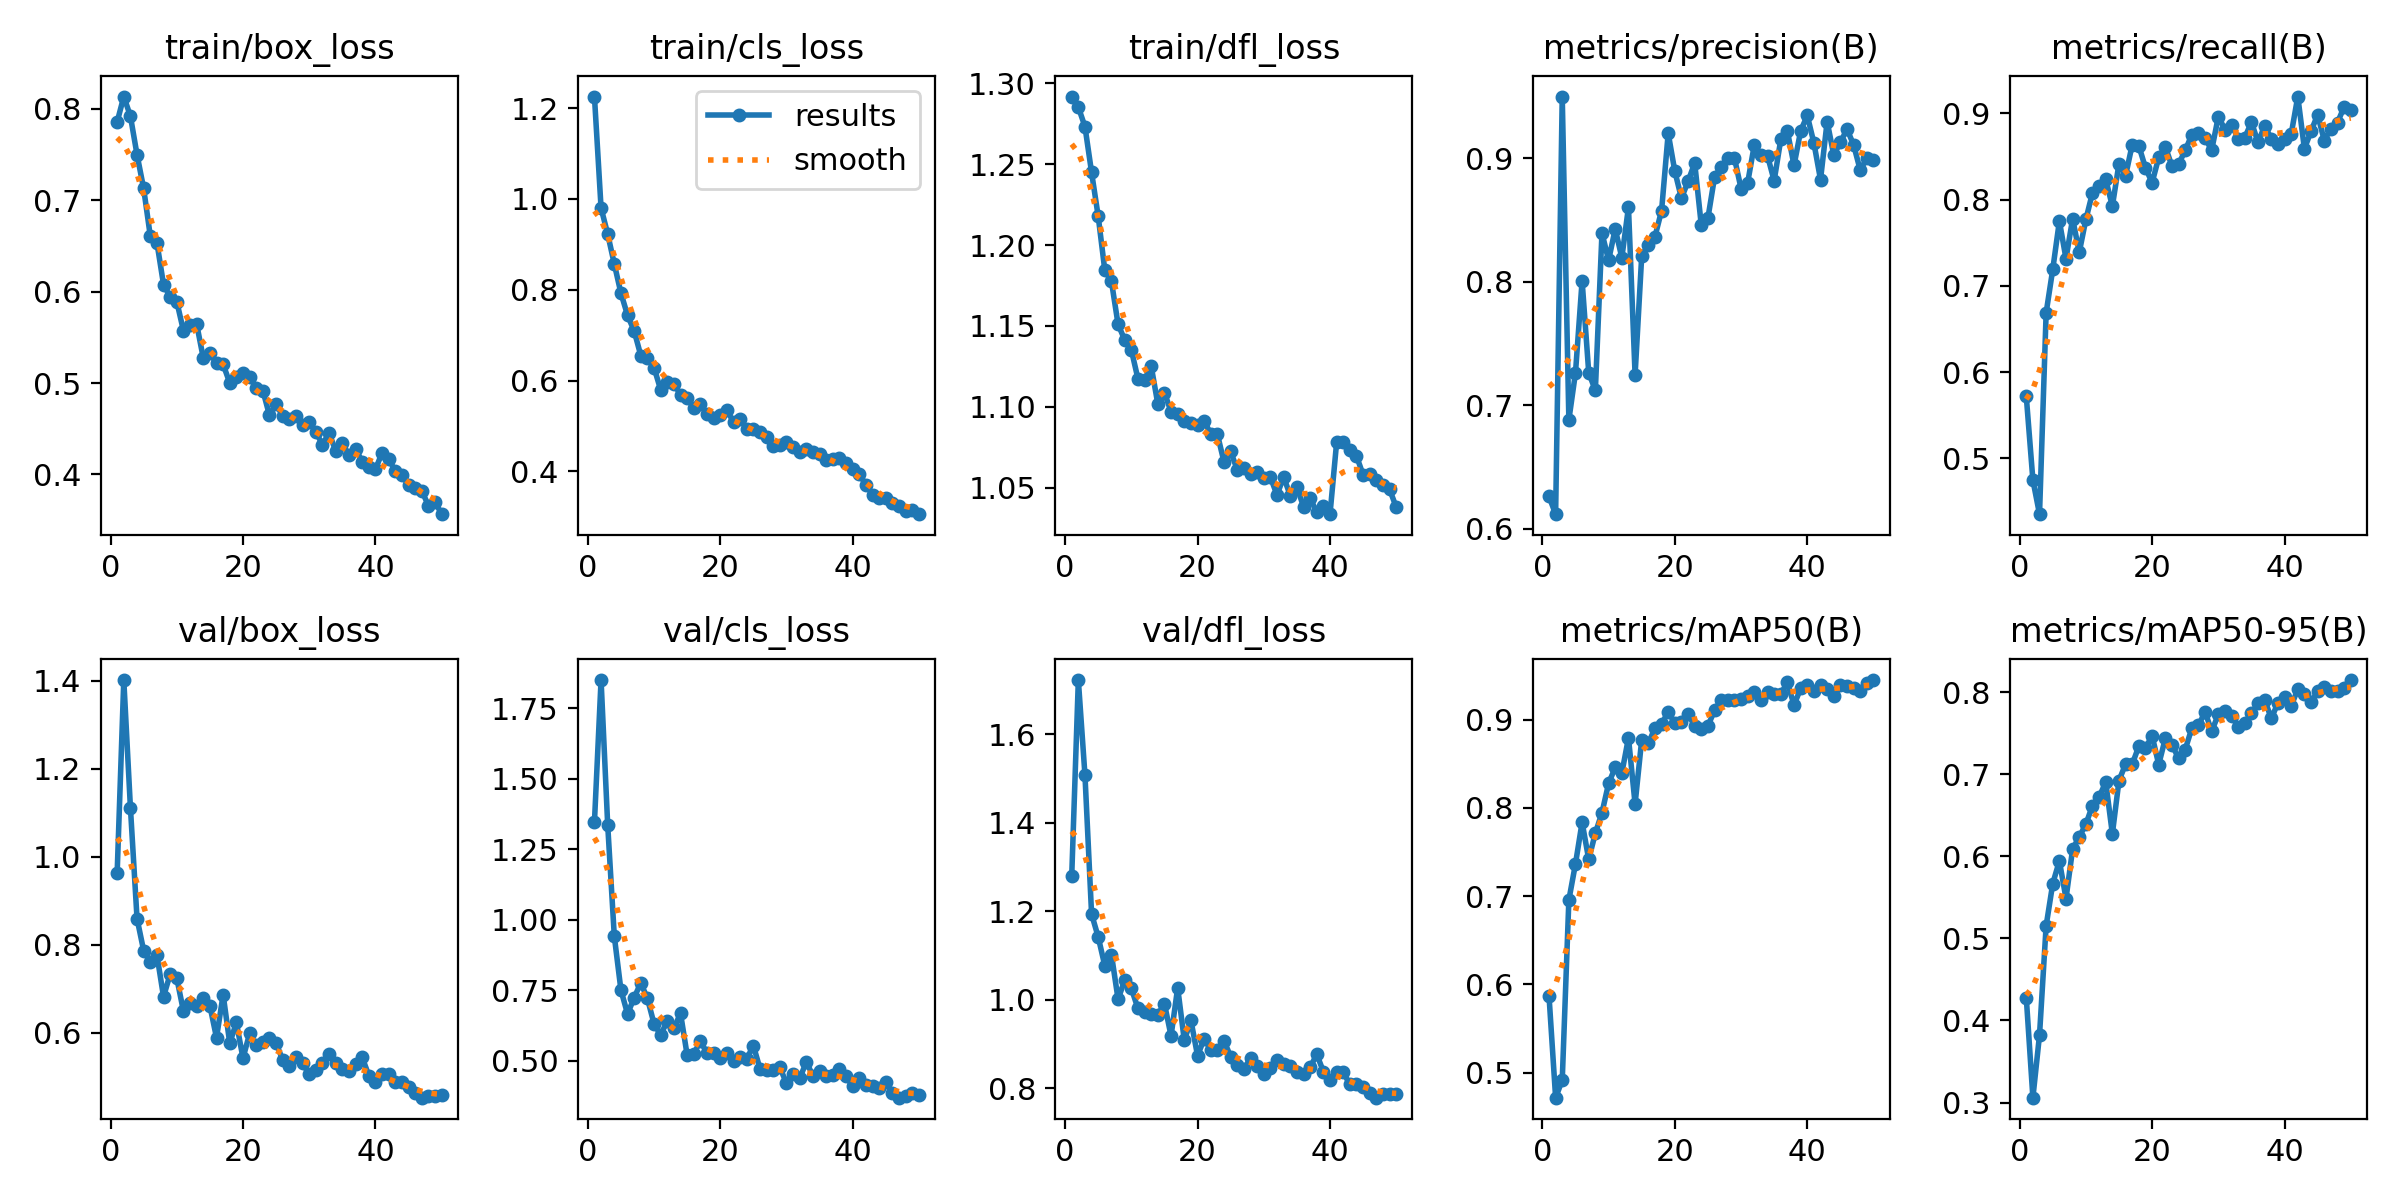

In [ ]:
import os
import glob
from IPython.display import display
from PIL import Image

# Definir la carpeta donde YOLO guarda los gráficos de entrenamiento
runs_folder = "/content/drive/MyDrive/DOLPHIN_VIDEO_COSTTERA/dolphin_model_augmented_V2/runs"

# Buscar el archivo results.png en todas las subcarpetas
result_files = glob.glob(os.path.join(runs_folder, "**", "results.png"), recursive=True)

# Si encuentra archivos, mostrar el primero
if result_files:
    print(f"Se encontró el archivo en: {result_files[0]}")
    img = Image.open(result_files[0])
    display(img)
else:
    print("No se encontró el archivo results.png. Verifica si el entrenamiento se completó correctamente.")


In [ ]:
from ultralytics import YOLO
import cv2
import os

# Definir rutas del modelo y videos
model_path = "/content/drive/MyDrive/DOLPHIN_VIDEO_COSTTERA/dolphin_model_augmented_V2/runs/model_dolphin_augmented_v2/weights/best.pt"  # Modelo entrenado con augmentations
video_folder = "/content/drive/MyDrive/DOLPHIN_VIDEO_COSTTERA/DOLPHIN_CLIP/20220830/Gopro vol3 goladins"  # Carpeta con los videos a procesar
output_folder = "/content/drive/MyDrive/DOLPHIN_VIDEO_COSTTERA/DOLPHIN_RESULTS_AUGMENTED"  # Carpeta de salida

# Asegurar que la carpeta de resultados exista
os.makedirs(output_folder, exist_ok=True)

# Cargar el modelo YOLO entrenado con augmentations
model = YOLO(model_path)

# Obtener lista de videos en la carpeta
video_files = [f for f in os.listdir(video_folder) if f.endswith(('.mp4', '.avi', '.mov'))]  # Filtra solo archivos de video

if not video_files:
    print("No se encontraron videos en la carpeta.")
else:
    print(f"Se encontraron {len(video_files)} videos para procesar.")

# Procesar cada video
for video_file in video_files:
    video_path = os.path.join(video_folder, video_file)
    output_video_path = os.path.join(output_folder, f"detections_augmented_{video_file}")  # Prefijo actualizado

    print(f"Procesando: {video_file}...")

    # Leer el video
    cap = cv2.VideoCapture(video_path)
    fps = int(cap.get(cv2.CAP_PROP_FPS))
    width = int(cap.get(cv2.CAP_PROP_FRAME_WIDTH))
    height = int(cap.get(cv2.CAP_PROP_FRAME_HEIGHT))

    # Configurar el escritor de video
    fourcc = cv2.VideoWriter_fourcc(*'mp4v')
    out = cv2.VideoWriter(output_video_path, fourcc, fps, (width, height))

    while cap.isOpened():
        ret, frame = cap.read()
        if not ret:
            break  # Fin del video

        # Detectar objetos en el frame usando el modelo con augmentations
        results = model(frame, conf=0.5)

        # Dibujar detecciones en el frame
        for r in results:
            frame = r.plot()  # Dibuja los cuadros de detección

        # Guardar el frame en el video final
        out.write(frame)

    cap.release()
    out.release()
    cv2.destroyAllWindows()

    print(f"Video procesado guardado en: {output_video_path}")

print("Todos los videos han sido procesados correctamente con el modelo dolphin_model_augmented_V2.")



Creating new Ultralytics Settings v0.0.6 file ✅ 
View Ultralytics Settings with 'yolo settings' or at '/root/.config/Ultralytics/settings.json'
Update Settings with 'yolo settings key=value', i.e. 'yolo settings runs_dir=path/to/dir'. For help see https://docs.ultralytics.com/quickstart/#ultralytics-settings.
Se encontraron 3 videos para procesar.
Procesando: GX040006_1_20220830_GP_D_Boca.mp4...

0: 384x640 1 fishing_net, 542.0ms
Speed: 21.2ms preprocess, 542.0ms inference, 29.3ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 1 fishing_net, 431.7ms
Speed: 6.8ms preprocess, 431.7ms inference, 0.8ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 1 fishing_net, 417.4ms
Speed: 4.9ms preprocess, 417.4ms inference, 1.0ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 1 fishing_net, 423.7ms
Speed: 4.5ms preprocess, 423.7ms inference, 0.9ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 1 fishing_net, 435.9ms
Speed: 4.6ms preprocess, 435.9ms

## 3.3 Model_augmented_improved

Se aplican varias técnicas de regularización para mejorar la generalización del modelo y evitar el sobreajuste (overfitting):

En cuanto a la regularización en la optimización, el parámetro weight_decay=0.0005 implementa una regularización L2, la cual penaliza valores altos en los pesos de la red neuronal, evitando que el modelo se vuelva demasiado dependiente de los datos de entrenamiento. Además, el momento de optimización (momentum=0.937) ayuda a suavizar la actualización de los pesos, evitando fluctuaciones bruscas en el entrenamiento. También has configurado un warmup inicial (warmup_epochs=3.0, warmup_momentum=0.8, warmup_bias_lr=0.1) que permite un ajuste progresivo de los pesos en las primeras épocas, evitando que el modelo aprenda de manera inestable al inicio.

Respecto a la regularización en los datos, se aplican diversas técnicas de data augmentation para incrementar la variabilidad en las imágenes de entrenamiento. Los parámetros hsv_h=0.015, hsv_s=0.7 y hsv_v=0.4 ajustan la tonalidad, saturación y brillo de las imágenes, simulando diferentes condiciones de iluminación y color. Además, el uso de degrees=15.0 introduce una rotación aleatoria de hasta ±15 grados, mientras que translate=0.15 desplaza los objetos en un 15% en cualquier dirección y scale=0.3 varía su tamaño entre un 70% y 130%. También se aplica un efecto de cizallamiento (shear=5.0) y distorsión de perspectiva (perspective=0.002), lo que permite que el modelo aprenda a detectar objetos en diferentes ángulos.

Otras técnicas de data augmentation incluyen flipud=0.5 y fliplr=0.5, que invierten las imágenes vertical y horizontalmente en el 50% de los casos, lo cual es útil en escenarios donde la orientación de los objetos puede variar, como en la detección de delfines. Además, mosaic=1.0 combina cuatro imágenes en una sola, mejorando la capacidad del modelo para detectar objetos en diferentes entornos. También se ha utilizado mixup=0.2, que mezcla dos imágenes con ponderaciones aleatorias, y copy_paste=0.1, que transfiere objetos de una imagen a otra, lo que amplía la diversidad del conjunto de entrenamiento.

Finalmente, en la regularización de la convergencia, se ha configurado una tasa de aprendizaje inicial (lr0=0.01) y un factor de reducción (lrf=0.1), lo que permite ajustar cómo la tasa de aprendizaje disminuye con el tiempo. Una reducción progresiva de la tasa de aprendizaje ayuda a estabilizar el entrenamiento, permitiendo que el modelo refine sus pesos en las últimas épocas.

In [ ]:
from google.colab import drive
import os
import shutil
from ultralytics import YOLO
import torch

# Montar Google Drive (por si no está montado)
drive.mount('/content/drive', force_remount=True)

# Definir carpeta principal en Google Drive
save_dir = "/content/drive/MyDrive/DOLPHIN_VIDEO_COSTTERA/dolphin_augmented_improved"
runs_dir = os.path.join(save_dir, "runs")  # Guardar 'runs/' en Drive

# Crear las carpetas si no existen
os.makedirs(save_dir, exist_ok=True)
os.makedirs(runs_dir, exist_ok=True)
print(f"Carpeta lista en: {save_dir}")

# Verificar si hay GPU disponible
device = "cuda" if torch.cuda.is_available() else "cpu"
print(f"Dispositivo seleccionado: {device}")

# Cargar YOLOv8 preentrenado
model = YOLO("yolov8s.pt")

# Entrenamiento con hiperparámetros válidos
results = model.train(
    data="/content/drive/MyDrive/DOLPHIN_VIDEO_COSTTERA/DOLPHIN_DATASET_yolov8/data.yaml",
    epochs=60,
    imgsz=640,
    batch=8,
    device=device,
    save=True,
    project=runs_dir,
    name="model_dolphin_augmented_improved",
    exist_ok=True,
    conf=0.4,  # Reducir confianza a 0.4
    lr0=0.01,  # Tasa de aprendizaje inicial
    lrf=0.1,  # Factor de reducción de la tasa de aprendizaje
    momentum=0.937,  # Momento de optimización
    weight_decay=0.0005,  # Regularización L2
    warmup_epochs=3.0,
    warmup_momentum=0.8,
    warmup_bias_lr=0.1,
    hsv_h=0.015,
    hsv_s=0.7,
    hsv_v=0.4,
    degrees=15.0,
    translate=0.15,
    scale=0.3,
    shear=5.0,
    perspective=0.002,
    flipud=0.5,
    fliplr=0.5,
    mosaic=1.0,
    mixup=0.2,
    copy_paste=0.1
)

# Ruta del modelo entrenado
model_path = os.path.join(runs_dir, "model_dolphin_augmented_improved/weights/best.pt")
new_model_name = "dolphin_augmented_improved.pt"

# Mover el modelo entrenado a la carpeta principal en Google Drive
if os.path.exists(model_path):
    shutil.copy(model_path, os.path.join(save_dir, new_model_name))
    print(f"Modelo entrenado guardado en: {save_dir}/{new_model_name}")
else:
    print("No se encontró el archivo best.pt en la ruta esperada.")

print("Entrenamiento completado y modelo guardado correctamente en Google Drive.")


Mounted at /content/drive
Carpeta lista en: /content/drive/MyDrive/DOLPHIN_VIDEO_COSTTERA/dolphin_augmented_improved
Dispositivo seleccionado: cuda
Ultralytics 8.3.83 🚀 Python-3.11.11 torch-2.5.1+cu124 CUDA:0 (Tesla T4, 15095MiB)
engine/trainer: task=detect, mode=train, model=yolov8s.pt, data=/content/drive/MyDrive/DOLPHIN_VIDEO_COSTTERA/DOLPHIN_DATASET_yolov8/data.yaml, epochs=60, time=None, patience=100, batch=8, imgsz=640, save=True, save_period=-1, cache=False, device=cuda, workers=8, project=/content/drive/MyDrive/DOLPHIN_VIDEO_COSTTERA/dolphin_augmented_improved/runs, name=model_dolphin_augmented_improved, exist_ok=True, pretrained=True, optimizer=auto, verbose=True, seed=0, deterministic=True, single_cls=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, amp=True, fraction=1.0, profile=False, freeze=None, multi_scale=False, overlap_mask=True, mask_ratio=4, dropout=0.0, val=True, split=val, save_json=False, save_hybrid=False, conf=0.4, iou=0.7, max_det=300, half=Fals

100%|██████████| 755k/755k [00:00<00:00, 26.2MB/s]


Overriding model.yaml nc=80 with nc=2

                   from  n    params  module                                       arguments                     
  0                  -1  1       928  ultralytics.nn.modules.conv.Conv             [3, 32, 3, 2]                 
  1                  -1  1     18560  ultralytics.nn.modules.conv.Conv             [32, 64, 3, 2]                
  2                  -1  1     29056  ultralytics.nn.modules.block.C2f             [64, 64, 1, True]             
  3                  -1  1     73984  ultralytics.nn.modules.conv.Conv             [64, 128, 3, 2]               
  4                  -1  2    197632  ultralytics.nn.modules.block.C2f             [128, 128, 2, True]           
  5                  -1  1    295424  ultralytics.nn.modules.conv.Conv             [128, 256, 3, 2]              
  6                  -1  2    788480  ultralytics.nn.modules.block.C2f             [256, 256, 2, True]           
  7                  -1  1   1180672  ultralytics

100%|██████████| 5.35M/5.35M [00:00<00:00, 87.9MB/s]


AMP: checks passed ✅


train: Scanning /content/drive/MyDrive/DOLPHIN_VIDEO_COSTTERA/DOLPHIN_DATASET_yolov8/train/labels... 2839 images, 198 backgrounds, 0 corrupt: 100%|██████████| 2839/2839 [20:38<00:00,  2.29it/s]


train: New cache created: /content/drive/MyDrive/DOLPHIN_VIDEO_COSTTERA/DOLPHIN_DATASET_yolov8/train/labels.cache
WARNING ⚠️ Box and segment counts should be equal, but got len(segments) = 2, len(boxes) = 3155. To resolve this only boxes will be used and all segments will be removed. To avoid this please supply either a detect or segment dataset, not a detect-segment mixed dataset.
albumentations: Blur(p=0.01, blur_limit=(3, 7)), MedianBlur(p=0.01, blur_limit=(3, 7)), ToGray(p=0.01, num_output_channels=3, method='weighted_average'), CLAHE(p=0.01, clip_limit=(1.0, 4.0), tile_grid_size=(8, 8))


/usr/local/lib/python3.11/dist-packages/albumentations/__init__.py:28: UserWarning: A new version of Albumentations is available: '2.0.5' (you have '2.0.4'). Upgrade using: pip install -U albumentations. To disable automatic update checks, set the environment variable NO_ALBUMENTATIONS_UPDATE to 1.
  check_for_updates()
val: Scanning /content/drive/MyDrive/DOLPHIN_VIDEO_COSTTERA/DOLPHIN_DATASET_yolov8/valid/labels... 811 images, 61 backgrounds, 0 corrupt: 100%|██████████| 811/811 [05:34<00:00,  2.42it/s]


val: New cache created: /content/drive/MyDrive/DOLPHIN_VIDEO_COSTTERA/DOLPHIN_DATASET_yolov8/valid/labels.cache
Plotting labels to /content/drive/MyDrive/DOLPHIN_VIDEO_COSTTERA/dolphin_augmented_improved/runs/model_dolphin_augmented_improved/labels.jpg... 
optimizer: 'optimizer=auto' found, ignoring 'lr0=0.01' and 'momentum=0.937' and determining best 'optimizer', 'lr0' and 'momentum' automatically... 
optimizer: AdamW(lr=0.001667, momentum=0.9) with parameter groups 57 weight(decay=0.0), 64 weight(decay=0.0005), 63 bias(decay=0.0)
TensorBoard: model graph visualization added ✅
Image sizes 640 train, 640 val
Using 2 dataloader workers
Logging results to /content/drive/MyDrive/DOLPHIN_VIDEO_COSTTERA/dolphin_augmented_improved/runs/model_dolphin_augmented_improved
Starting training for 60 epochs...

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       1/60      2.04G      1.374      1.844      1.887         24        640: 100%|██████████| 355/355 [01:39<00:00,  3.57it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 51/51 [00:12<00:00,  4.03it/s]

                   all        811        895      0.847      0.262      0.579      0.424



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       2/60      2.01G      1.258      1.586      1.817         23        640: 100%|██████████| 355/355 [01:35<00:00,  3.73it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 51/51 [00:09<00:00,  5.40it/s]

                   all        811        895      0.548       0.24      0.388      0.176



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       3/60      2.03G      1.201      1.542      1.773         28        640: 100%|██████████| 355/355 [01:32<00:00,  3.85it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 51/51 [00:11<00:00,  4.57it/s]

                   all        811        895      0.853      0.483      0.647      0.374



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       4/60      2.04G      1.125      1.452      1.717         28        640: 100%|██████████| 355/355 [01:32<00:00,  3.84it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 51/51 [00:10<00:00,  4.67it/s]


                   all        811        895       0.92      0.439      0.684      0.435

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       5/60      2.04G      1.106      1.411       1.69         25        640: 100%|██████████| 355/355 [01:31<00:00,  3.88it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 51/51 [00:10<00:00,  4.78it/s]

                   all        811        895      0.746      0.486      0.638      0.456



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       6/60      2.04G      1.053      1.323      1.645         32        640: 100%|██████████| 355/355 [01:29<00:00,  3.95it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 51/51 [00:12<00:00,  4.05it/s]

                   all        811        895      0.861      0.497      0.695      0.481



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       7/60      2.04G      1.037      1.301      1.621         24        640: 100%|██████████| 355/355 [01:30<00:00,  3.92it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 51/51 [00:10<00:00,  4.83it/s]

                   all        811        895      0.733      0.569      0.666      0.459



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       8/60      2.04G       1.01       1.29      1.609         30        640: 100%|██████████| 355/355 [01:31<00:00,  3.89it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 51/51 [00:11<00:00,  4.55it/s]

                   all        811        895      0.465      0.458      0.487      0.349



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       9/60      2.02G     0.9848      1.246      1.591         19        640: 100%|██████████| 355/355 [01:31<00:00,  3.87it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 51/51 [00:10<00:00,  4.70it/s]

                   all        811        895      0.846       0.58      0.726      0.548



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      10/60      2.04G     0.9852      1.244       1.59         25        640: 100%|██████████| 355/355 [01:30<00:00,  3.93it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 51/51 [00:10<00:00,  4.68it/s]

                   all        811        895      0.846      0.736      0.787      0.546



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      11/60      2.04G     0.9698      1.213      1.575         23        640: 100%|██████████| 355/355 [01:31<00:00,  3.86it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 51/51 [00:10<00:00,  4.68it/s]

                   all        811        895       0.86       0.67      0.775      0.526



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      12/60      2.04G     0.9436      1.193      1.554         24        640: 100%|██████████| 355/355 [01:31<00:00,  3.86it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 51/51 [00:11<00:00,  4.58it/s]

                   all        811        895      0.923      0.656      0.794      0.573



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      13/60      2.03G     0.9388       1.16      1.542         30        640: 100%|██████████| 355/355 [01:31<00:00,  3.86it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 51/51 [00:10<00:00,  4.93it/s]

                   all        811        895      0.852      0.736       0.82      0.591



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      14/60      2.04G     0.9329      1.158      1.533         16        640: 100%|██████████| 355/355 [01:33<00:00,  3.81it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 51/51 [00:11<00:00,  4.61it/s]

                   all        811        895      0.847      0.641       0.76      0.533



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      15/60      2.04G     0.9272      1.159      1.543         25        640: 100%|██████████| 355/355 [01:29<00:00,  3.96it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 51/51 [00:11<00:00,  4.59it/s]


                   all        811        895      0.871      0.589      0.729      0.524

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      16/60      2.03G     0.9034      1.136      1.523         31        640: 100%|██████████| 355/355 [01:31<00:00,  3.89it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 51/51 [00:09<00:00,  5.10it/s]

                   all        811        895      0.865      0.695      0.779      0.555



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      17/60      2.02G     0.9056      1.124      1.514         32        640: 100%|██████████| 355/355 [01:31<00:00,  3.88it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 51/51 [00:10<00:00,  4.72it/s]


                   all        811        895      0.813      0.632      0.752       0.56

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      18/60      2.03G     0.8899      1.095      1.498         25        640: 100%|██████████| 355/355 [01:28<00:00,  3.99it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 51/51 [00:11<00:00,  4.57it/s]

                   all        811        895      0.827        0.8      0.844      0.598



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      19/60      2.04G     0.8812      1.081      1.502         27        640: 100%|██████████| 355/355 [01:31<00:00,  3.90it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 51/51 [00:11<00:00,  4.42it/s]


                   all        811        895      0.867      0.716       0.81       0.56

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      20/60      2.04G      0.862      1.067      1.482         28        640: 100%|██████████| 355/355 [01:30<00:00,  3.92it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 51/51 [00:09<00:00,  5.25it/s]

                   all        811        895      0.835      0.697      0.773      0.557



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      21/60      2.04G     0.8666      1.084      1.492         15        640: 100%|██████████| 355/355 [01:29<00:00,  3.95it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 51/51 [00:10<00:00,  4.68it/s]

                   all        811        895      0.921      0.638       0.78       0.61



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      22/60      2.04G     0.8631      1.058      1.484         27        640: 100%|██████████| 355/355 [01:31<00:00,  3.88it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 51/51 [00:10<00:00,  4.65it/s]

                   all        811        895       0.86       0.78      0.828      0.621



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      23/60      2.03G     0.8546      1.055      1.469         27        640: 100%|██████████| 355/355 [01:31<00:00,  3.89it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 51/51 [00:09<00:00,  5.20it/s]

                   all        811        895      0.894       0.68      0.802      0.612



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      24/60      2.03G      0.848      1.026      1.461         21        640: 100%|██████████| 355/355 [01:30<00:00,  3.91it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 51/51 [00:10<00:00,  4.68it/s]

                   all        811        895      0.907      0.618      0.771      0.582



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      25/60      2.01G     0.8405      1.021      1.455         27        640: 100%|██████████| 355/355 [01:30<00:00,  3.92it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 51/51 [00:11<00:00,  4.56it/s]

                   all        811        895      0.876      0.674      0.773      0.613



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      26/60      2.03G     0.8343      1.036       1.46         41        640: 100%|██████████| 355/355 [01:29<00:00,  3.97it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 51/51 [00:11<00:00,  4.53it/s]

                   all        811        895      0.836      0.662      0.745      0.602



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      27/60      2.04G      0.807     0.9968      1.435         41        640:  68%|██████▊   | 243/355 [01:02<00:48,  2.30it/s]

este código solo se utiliza si se interrumpió el entrenamiento por falta de memoria.

In [ ]:
from ultralytics import YOLO

# Definir la ruta donde se guardó el modelo
model_path = "/content/drive/MyDrive/DOLPHIN_VIDEO_COSTTERA/dolphin_augmented_improved/runs/model_dolphin_augmented_improved/weights/last.pt"

# 3Verificar si el archivo 'last.pt' existe antes de reanudar
if os.path.exists(model_path):
    print("Modelo encontrado, cargando para continuar el entrenamiento...")

    # Cargar el modelo con los pesos del último checkpoint
    model = YOLO(model_path)

    # Reanudar el entrenamiento
    results = model.train(
        data="/content/drive/MyDrive/DOLPHIN_VIDEO_COSTTERA/DOLPHIN_DATASET_yolov8/data.yaml",
        epochs=60,  # Continuar hasta completar las 60 épocas
        imgsz=640,
        batch=4,  # Reducir batch para menor consumo de memoria
        device="cuda",
        save=True,
        project="/content/drive/MyDrive/DOLPHIN_VIDEO_COSTTERA/dolphin_augmented_improved/runs",
        name="model_dolphin_augmented_improved",
        exist_ok=True,
        resume=True  # REANUDA desde la última época guardada
    )
    print("Entrenamiento reanudado con éxito.")

else:
    print("No se encontró el archivo 'last.pt'. Revisa si el entrenamiento se guardó correctamente antes de la interrupción.")


Creating new Ultralytics Settings v0.0.6 file ✅ 
View Ultralytics Settings with 'yolo settings' or at '/root/.config/Ultralytics/settings.json'
Update Settings with 'yolo settings key=value', i.e. 'yolo settings runs_dir=path/to/dir'. For help see https://docs.ultralytics.com/quickstart/#ultralytics-settings.
Modelo encontrado, cargando para continuar el entrenamiento...
Ultralytics 8.3.84 🚀 Python-3.11.11 torch-2.5.1+cu124 CUDA:0 (Tesla T4, 15095MiB)
engine/trainer: task=detect, mode=train, model=/content/drive/MyDrive/DOLPHIN_VIDEO_COSTTERA/dolphin_augmented_improved/runs/model_dolphin_augmented_improved/weights/last.pt, data=/content/drive/MyDrive/DOLPHIN_VIDEO_COSTTERA/DOLPHIN_DATASET_yolov8/data.yaml, epochs=60, time=None, patience=100, batch=4, imgsz=640, save=True, save_period=-1, cache=False, device=cuda, workers=8, project=/content/drive/MyDrive/DOLPHIN_VIDEO_COSTTERA/dolphin_augmented_improved/runs, name=model_dolphin_augmented_improved, exist_ok=True, pretrained=True, optimi

100%|██████████| 755k/755k [00:00<00:00, 44.4MB/s]


TensorBoard: Start with 'tensorboard --logdir /content/drive/MyDrive/DOLPHIN_VIDEO_COSTTERA/dolphin_augmented_improved/runs/model_dolphin_augmented_improved', view at http://localhost:6006/

                   from  n    params  module                                       arguments                     
  0                  -1  1       928  ultralytics.nn.modules.conv.Conv             [3, 32, 3, 2]                 
  1                  -1  1     18560  ultralytics.nn.modules.conv.Conv             [32, 64, 3, 2]                
  2                  -1  1     29056  ultralytics.nn.modules.block.C2f             [64, 64, 1, True]             
  3                  -1  1     73984  ultralytics.nn.modules.conv.Conv             [64, 128, 3, 2]               
  4                  -1  2    197632  ultralytics.nn.modules.block.C2f             [128, 128, 2, True]           
  5                  -1  1    295424  ultralytics.nn.modules.conv.Conv             [128, 256, 3, 2]              
  6        

100%|██████████| 5.35M/5.35M [00:00<00:00, 124MB/s]


AMP: checks passed ✅


train: Scanning /content/drive/.shortcut-targets-by-id/1ov7ZzD1RdFdR2y-AOPVigRw6-MDH-Bn2/DOLPHIN_VIDEO_COSTTERA/DOLPHIN_DATASET_yolov8/train/labels... 2839 images, 198 backgrounds, 0 corrupt: 100%|██████████| 2839/2839 [21:48<00:00,  2.17it/s]


train: New cache created: /content/drive/.shortcut-targets-by-id/1ov7ZzD1RdFdR2y-AOPVigRw6-MDH-Bn2/DOLPHIN_VIDEO_COSTTERA/DOLPHIN_DATASET_yolov8/train/labels.cache
WARNING ⚠️ Box and segment counts should be equal, but got len(segments) = 2, len(boxes) = 3155. To resolve this only boxes will be used and all segments will be removed. To avoid this please supply either a detect or segment dataset, not a detect-segment mixed dataset.
albumentations: Blur(p=0.01, blur_limit=(3, 7)), MedianBlur(p=0.01, blur_limit=(3, 7)), ToGray(p=0.01, num_output_channels=3, method='weighted_average'), CLAHE(p=0.01, clip_limit=(1.0, 4.0), tile_grid_size=(8, 8))


/usr/local/lib/python3.11/dist-packages/albumentations/__init__.py:28: UserWarning: A new version of Albumentations is available: '2.0.5' (you have '2.0.4'). Upgrade using: pip install -U albumentations. To disable automatic update checks, set the environment variable NO_ALBUMENTATIONS_UPDATE to 1.
  check_for_updates()
val: Scanning /content/drive/.shortcut-targets-by-id/1ov7ZzD1RdFdR2y-AOPVigRw6-MDH-Bn2/DOLPHIN_VIDEO_COSTTERA/DOLPHIN_DATASET_yolov8/valid/labels... 811 images, 61 backgrounds, 0 corrupt: 100%|██████████| 811/811 [05:51<00:00,  2.31it/s]


val: New cache created: /content/drive/.shortcut-targets-by-id/1ov7ZzD1RdFdR2y-AOPVigRw6-MDH-Bn2/DOLPHIN_VIDEO_COSTTERA/DOLPHIN_DATASET_yolov8/valid/labels.cache
Plotting labels to /content/drive/MyDrive/DOLPHIN_VIDEO_COSTTERA/dolphin_augmented_improved/runs/model_dolphin_augmented_improved/labels.jpg... 
optimizer: 'optimizer=auto' found, ignoring 'lr0=0.01' and 'momentum=0.937' and determining best 'optimizer', 'lr0' and 'momentum' automatically... 
optimizer: AdamW(lr=0.001667, momentum=0.9) with parameter groups 57 weight(decay=0.0), 64 weight(decay=0.0005), 63 bias(decay=0.0)
Resuming training /content/drive/MyDrive/DOLPHIN_VIDEO_COSTTERA/dolphin_augmented_improved/runs/model_dolphin_augmented_improved/weights/last.pt from epoch 27 to 60 total epochs
TensorBoard: model graph visualization added ✅
Image sizes 640 train, 640 val
Using 2 dataloader workers
Logging results to /content/drive/MyDrive/DOLPHIN_VIDEO_COSTTERA/dolphin_augmented_improved/runs/model_dolphin_augmented_improved

      27/60      1.21G     0.8383      1.058      1.465          6        640: 100%|██████████| 710/710 [02:01<00:00,  5.87it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 102/102 [00:14<00:00,  7.25it/s]

                   all        811        895       0.92      0.753      0.844      0.635



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      28/60      1.15G     0.8349      1.036      1.459          7        640: 100%|██████████| 710/710 [01:59<00:00,  5.95it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 102/102 [00:12<00:00,  8.35it/s]

                   all        811        895      0.827      0.821       0.85      0.652



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      29/60      1.11G     0.8198      1.027      1.442         16        640: 100%|██████████| 710/710 [01:57<00:00,  6.05it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 102/102 [00:12<00:00,  8.37it/s]

                   all        811        895      0.904      0.713      0.811      0.625



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      30/60      1.15G     0.8247      1.019      1.456         15        640: 100%|██████████| 710/710 [02:00<00:00,  5.88it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 102/102 [00:11<00:00,  9.04it/s]

                   all        811        895      0.883       0.77      0.838      0.652



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      31/60      1.11G     0.8028      1.012      1.437          7        640: 100%|██████████| 710/710 [01:58<00:00,  5.98it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 102/102 [00:12<00:00,  8.39it/s]

                   all        811        895        0.9      0.774      0.851      0.646



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      32/60      1.14G     0.8041     0.9716      1.438         19        640: 100%|██████████| 710/710 [01:56<00:00,  6.09it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 102/102 [00:12<00:00,  8.16it/s]

                   all        811        895      0.934      0.779      0.863      0.668



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      33/60      1.14G     0.7913     0.9725      1.423         13        640: 100%|██████████| 710/710 [01:58<00:00,  6.00it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 102/102 [00:12<00:00,  8.34it/s]

                   all        811        895      0.883      0.785      0.829      0.629



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      34/60      1.14G     0.7946     0.9761       1.42         15        640: 100%|██████████| 710/710 [01:57<00:00,  6.02it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 102/102 [00:12<00:00,  8.31it/s]

                   all        811        895      0.891      0.798      0.866      0.697



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      35/60      1.13G     0.7863     0.9653      1.418         12        640: 100%|██████████| 710/710 [01:57<00:00,  6.02it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 102/102 [00:11<00:00,  8.63it/s]

                   all        811        895      0.884      0.793       0.86       0.67



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      36/60      1.13G     0.7939     0.9589      1.425          9        640: 100%|██████████| 710/710 [01:57<00:00,  6.02it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 102/102 [00:11<00:00,  8.77it/s]

                   all        811        895      0.881      0.783      0.853      0.649



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      37/60      1.11G     0.7859      0.955      1.408         13        640:  64%|██████▍   | 455/710 [01:16<00:38,  6.66it/s]/usr/local/lib/python3.11/dist-packages/ultralytics/data/augment.py:1107: RuntimeWarning: divide by zero encountered in divide
  xy = (xy[:, :2] / xy[:, 2:3] if self.perspective else xy[:, :2]).reshape(n, 8)  # perspective rescale or affine
      37/60      1.11G     0.7803     0.9577      1.412         13        640: 100%|██████████| 710/710 [01:59<00:00,  5.95it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 102/102 [00:12<00:00,  8.47it/s]

                   all        811        895      0.912      0.806      0.876      0.709



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      38/60      1.15G     0.7857     0.9522      1.416          8        640: 100%|██████████| 710/710 [01:59<00:00,  5.96it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 102/102 [00:12<00:00,  8.34it/s]

                   all        811        895      0.905      0.791      0.862      0.683



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      39/60      1.14G     0.7717     0.9513      1.411         11        640: 100%|██████████| 710/710 [01:57<00:00,  6.05it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 102/102 [00:11<00:00,  8.69it/s]

                   all        811        895      0.885      0.828      0.882      0.712



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      40/60      1.14G     0.7675     0.9451        1.4          7        640: 100%|██████████| 710/710 [01:58<00:00,  5.97it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 102/102 [00:12<00:00,  8.40it/s]

                   all        811        895      0.869      0.828      0.872      0.672



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      41/60       1.1G     0.7703     0.9268      1.398          9        640: 100%|██████████| 710/710 [01:57<00:00,  6.02it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 102/102 [00:12<00:00,  8.41it/s]

                   all        811        895      0.924      0.795      0.868      0.695



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      42/60      1.11G     0.7603     0.9401      1.396         11        640: 100%|██████████| 710/710 [01:57<00:00,  6.02it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 102/102 [00:12<00:00,  8.24it/s]

                   all        811        895      0.902      0.831      0.883      0.693



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      43/60      1.11G      0.739     0.9188       1.38         11        640: 100%|██████████| 710/710 [01:55<00:00,  6.15it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 102/102 [00:12<00:00,  8.40it/s]

                   all        811        895       0.89      0.858      0.898      0.722



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      44/60      1.14G     0.7536     0.9112      1.387         10        640: 100%|██████████| 710/710 [01:59<00:00,  5.94it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 102/102 [00:11<00:00,  9.07it/s]

                   all        811        895      0.892      0.829       0.88      0.695



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      45/60      1.11G     0.7543     0.9157      1.392         13        640: 100%|██████████| 710/710 [01:58<00:00,  6.01it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 102/102 [00:12<00:00,  8.29it/s]

                   all        811        895      0.911      0.814      0.871      0.721



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      46/60      1.15G     0.7216     0.8852      1.372         13        640: 100%|██████████| 710/710 [01:55<00:00,  6.15it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 102/102 [00:12<00:00,  8.25it/s]

                   all        811        895      0.893      0.799      0.862        0.7



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      47/60      1.14G     0.7302     0.8993       1.37         13        640: 100%|██████████| 710/710 [01:56<00:00,  6.12it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 102/102 [00:12<00:00,  8.41it/s]


                   all        811        895      0.896      0.863      0.897      0.715

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      48/60      1.14G     0.7187     0.8814      1.359         11        640: 100%|██████████| 710/710 [01:56<00:00,  6.10it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 102/102 [00:12<00:00,  8.41it/s]

                   all        811        895      0.869      0.847      0.884      0.687



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      49/60      1.11G       0.72      0.882      1.359         11        640: 100%|██████████| 710/710 [01:58<00:00,  5.99it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 102/102 [00:11<00:00,  8.79it/s]

                   all        811        895      0.909      0.852      0.891      0.718



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      50/60      1.14G     0.7207     0.8756       1.36         14        640: 100%|██████████| 710/710 [01:57<00:00,  6.02it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 102/102 [00:11<00:00,  8.76it/s]

                   all        811        895      0.937       0.81       0.88      0.724


Closing dataloader mosaic
albumentations: Blur(p=0.01, blur_limit=(3, 7)), MedianBlur(p=0.01, blur_limit=(3, 7)), ToGray(p=0.01, num_output_channels=3, method='weighted_average'), CLAHE(p=0.01, clip_limit=(1.0, 4.0), tile_grid_size=(8, 8))

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      51/60      1.11G     0.7087     0.7508      1.465          4        640: 100%|██████████| 710/710 [01:44<00:00,  6.80it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 102/102 [00:12<00:00,  8.32it/s]

                   all        811        895      0.893      0.781      0.847      0.667



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      52/60      1.11G     0.6981      0.685      1.444          2        640: 100%|██████████| 710/710 [01:43<00:00,  6.89it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 102/102 [00:12<00:00,  8.22it/s]

                   all        811        895      0.924      0.756      0.854      0.687



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      53/60       1.1G     0.6872     0.6578      1.435          3        640: 100%|██████████| 710/710 [01:41<00:00,  6.97it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 102/102 [00:12<00:00,  8.30it/s]


                   all        811        895      0.881      0.796      0.859      0.696

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      54/60      1.14G     0.6501     0.6224      1.399          3        640: 100%|██████████| 710/710 [01:45<00:00,  6.76it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 102/102 [00:10<00:00,  9.33it/s]

                   all        811        895      0.933      0.792      0.878      0.724



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      55/60      1.14G     0.6514     0.6056      1.413          3        640: 100%|██████████| 710/710 [01:43<00:00,  6.85it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 102/102 [00:12<00:00,  8.28it/s]

                   all        811        895      0.914      0.792      0.862      0.726



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      56/60      1.14G      0.652     0.6037        1.4          2        640: 100%|██████████| 710/710 [01:40<00:00,  7.04it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 102/102 [00:12<00:00,  8.42it/s]

                   all        811        895      0.901      0.827      0.878      0.723



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      57/60      1.14G     0.6322     0.5872      1.385          3        640: 100%|██████████| 710/710 [01:42<00:00,  6.92it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 102/102 [00:12<00:00,  8.36it/s]

                   all        811        895      0.894      0.802      0.865       0.71



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      58/60      1.11G     0.6186      0.579      1.367          4        640: 100%|██████████| 710/710 [01:42<00:00,  6.94it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 102/102 [00:12<00:00,  8.37it/s]

                   all        811        895      0.935      0.811      0.878      0.724



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      59/60      1.11G     0.6208     0.5607      1.366          4        640: 100%|██████████| 710/710 [01:41<00:00,  7.03it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 102/102 [00:12<00:00,  8.44it/s]

                   all        811        895       0.88      0.809      0.865      0.705



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      60/60      1.11G     0.5904     0.5626       1.35          5        640: 100%|██████████| 710/710 [01:42<00:00,  6.91it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 102/102 [00:12<00:00,  8.43it/s]


                   all        811        895      0.906      0.761      0.847      0.701

34 epochs completed in 1.200 hours.
Optimizer stripped from /content/drive/MyDrive/DOLPHIN_VIDEO_COSTTERA/dolphin_augmented_improved/runs/model_dolphin_augmented_improved/weights/last.pt, 22.5MB
Optimizer stripped from /content/drive/MyDrive/DOLPHIN_VIDEO_COSTTERA/dolphin_augmented_improved/runs/model_dolphin_augmented_improved/weights/best.pt, 22.5MB

Validating /content/drive/MyDrive/DOLPHIN_VIDEO_COSTTERA/dolphin_augmented_improved/runs/model_dolphin_augmented_improved/weights/best.pt...
Ultralytics 8.3.84 🚀 Python-3.11.11 torch-2.5.1+cu124 CUDA:0 (Tesla T4, 15095MiB)
Model summary (fused): 72 layers, 11,126,358 parameters, 0 gradients, 28.4 GFLOPs


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 102/102 [00:12<00:00,  8.14it/s]


                   all        811        895      0.936      0.808      0.879      0.723
               dolphin        179        184      0.904      0.668      0.792      0.566
           fishing_net        710        711      0.968      0.947      0.966       0.88
Speed: 0.4ms preprocess, 5.0ms inference, 0.0ms loss, 2.2ms postprocess per image
Results saved to /content/drive/MyDrive/DOLPHIN_VIDEO_COSTTERA/dolphin_augmented_improved/runs/model_dolphin_augmented_improved
Entrenamiento reanudado con éxito.


## 3.4 Model_dolphin_detector

Se han realizado diversas modificaciones en los hiperparámetros para mejorar la precisión y estabilidad del entrenamiento.

En primer lugar, se ha reducido la tasa de aprendizaje inicial (lr0=0.005) para evitar cambios bruscos en los pesos al inicio del entrenamiento. También se ha cambiado el optimizador a "AdamW", que es más robusto frente a problemas de sobreajuste y mejora la estabilidad de la actualización de pesos en comparación con otros optimizadores como SGD o Adam.

En cuanto a la regularización y aumento de datos (Data Augmentation), se han realizado ajustes para que el modelo aprenda de manera más efectiva sin introducir ruido innecesario. Se ha desactivado la inversión vertical (flipud=0.0), ya que los delfines no suelen aparecer boca abajo en las imágenes del dataset. Sin embargo, se ha mantenido el volteo horizontal (fliplr=0.5), lo que permite que el modelo detecte delfines independientemente de la dirección en la que naden. Se ha reducido el efecto mosaico (mosaic=0.5) para evitar combinaciones demasiado irreales de imágenes, asegurando que las muestras sigan representando escenarios realistas.

También se han ajustado los valores de modificación de color (hsv_h=0.015, hsv_s=0.5, hsv_v=0.3). Se ha reducido la saturación y el brillo para evitar que el modelo aprenda con imágenes que pueden parecer artificialmente diferentes del entorno marino. Además, se ha disminuido la distorsión geométrica, como la rotación (degrees=5.0), la traslación (translate=0.05), y la cizalladura (shear=1.0), asegurando que las modificaciones sean mínimas y no afecten la correcta identificación de los delfines en la imagen. Del mismo modo, se ha reducido la distorsión en perspectiva (perspective=0.0005), manteniendo las imágenes más naturales y fieles a la realidad.

In [ ]:
from ultralytics import YOLO
import os
import torch

# Definir carpetas de trabajo
save_dir = "/content/drive/MyDrive/DOLPHIN_VIDEO_COSTTERA/dolphin_detector_v3"
runs_dir = os.path.join(save_dir, "runs")
baseline_weights_dir = os.path.join(runs_dir, "dolphin_detector_baseline_v3/weights")

# Verificar si hay GPU disponible
if not torch.cuda.is_available():
    raise SystemExit("No hay GPU disponible. Verifica la configuración en Colab.")

device = "cuda"
torch.backends.cudnn.benchmark = True

# Ruta del mejor modelo del baseline
best_baseline_model = os.path.join(baseline_weights_dir, "best.pt")

# Verificar si `best.pt` existe antes de reanudar
if os.path.exists(best_baseline_model):
    print(f"Reanudando entrenamiento desde {best_baseline_model}...")

    # Cargar el modelo desde el mejor baseline
    model = YOLO(best_baseline_model)

    # Entrenar con ajustes para mejorar detección de delfines
    results = model.train(
        data="/content/drive/MyDrive/DOLPHIN_VIDEO_COSTTERA/DOLPHIN_DATASET_yolov8/data.yaml",
        epochs=50,  # Más épocas para refinar la detección de delfines
        imgsz=640,
        batch=4,  # Ajustar según capacidad de GPU
        device=device,
        lr0=0.005,
        optimizer="AdamW",
        flipud=0.0,  # No voltear verticalmente
        fliplr=0.5,  # Mantener volteo horizontal
        mosaic=0.5,  # Reducir efecto de mosaico
        hsv_h=0.015, hsv_s=0.5, hsv_v=0.3,  # Reducir saturación excesiva
        degrees=5.0, translate=0.05, scale=0.3, shear=1.0, perspective=0.0005,  # Menos distorsión
        save=True, project=runs_dir, name="dolphin_detector_focused", exist_ok=True
    )
    print("Entrenamiento completado con mejoras en detección de delfines.")

    # Evaluar el modelo final
    model.val()

else:
    print("No se encontró `best.pt`. Verifica que el entrenamiento se guardó correctamente.")


Reanudando entrenamiento desde /content/drive/MyDrive/DOLPHIN_VIDEO_COSTTERA/dolphin_detector_v3/runs/dolphin_detector_baseline_v3/weights/best.pt...
Ultralytics 8.3.85 🚀 Python-3.11.11 torch-2.5.1+cu124 CUDA:0 (Tesla T4, 15095MiB)
engine/trainer: task=detect, mode=train, model=/content/drive/MyDrive/DOLPHIN_VIDEO_COSTTERA/dolphin_detector_v3/runs/dolphin_detector_baseline_v3/weights/best.pt, data=/content/drive/MyDrive/DOLPHIN_VIDEO_COSTTERA/DOLPHIN_DATASET_yolov8/data.yaml, epochs=50, time=None, patience=100, batch=4, imgsz=640, save=True, save_period=-1, cache=False, device=cuda, workers=8, project=/content/drive/MyDrive/DOLPHIN_VIDEO_COSTTERA/dolphin_detector_v3/runs, name=dolphin_detector_focused, exist_ok=True, pretrained=True, optimizer=AdamW, verbose=True, seed=0, deterministic=True, single_cls=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, amp=True, fraction=1.0, profile=False, freeze=None, multi_scale=False, overlap_mask=True, mask_ratio=4, dropout=0.0, val=T

train: Scanning /content/drive/.shortcut-targets-by-id/1ov7ZzD1RdFdR2y-AOPVigRw6-MDH-Bn2/DOLPHIN_VIDEO_COSTTERA/DOLPHIN_DATASET_yolov8/train/labels.cache... 2839 images, 198 backgrounds, 0 corrupt: 100%|██████████| 2839/2839 [00:00<?, ?it/s]

WARNING ⚠️ Box and segment counts should be equal, but got len(segments) = 2, len(boxes) = 3155. To resolve this only boxes will be used and all segments will be removed. To avoid this please supply either a detect or segment dataset, not a detect-segment mixed dataset.
albumentations: Blur(p=0.01, blur_limit=(3, 7)), MedianBlur(p=0.01, blur_limit=(3, 7)), ToGray(p=0.01, num_output_channels=3, method='weighted_average'), CLAHE(p=0.01, clip_limit=(1.0, 4.0), tile_grid_size=(8, 8))



val: Scanning /content/drive/.shortcut-targets-by-id/1ov7ZzD1RdFdR2y-AOPVigRw6-MDH-Bn2/DOLPHIN_VIDEO_COSTTERA/DOLPHIN_DATASET_yolov8/valid/labels.cache... 811 images, 61 backgrounds, 0 corrupt: 100%|██████████| 811/811 [00:00<?, ?it/s]


Plotting labels to /content/drive/MyDrive/DOLPHIN_VIDEO_COSTTERA/dolphin_detector_v3/runs/dolphin_detector_focused/labels.jpg... 
optimizer: AdamW(lr=0.005, momentum=0.937) with parameter groups 57 weight(decay=0.0), 64 weight(decay=0.0005), 63 bias(decay=0.0)
TensorBoard: model graph visualization added ✅
Image sizes 640 train, 640 val
Using 2 dataloader workers
Logging results to /content/drive/MyDrive/DOLPHIN_VIDEO_COSTTERA/dolphin_detector_v3/runs/dolphin_detector_focused
Starting training for 50 epochs...

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       1/50      1.39G     0.8108     0.5995      1.381          3        640: 100%|██████████| 710/710 [01:51<00:00,  6.35it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 102/102 [00:11<00:00,  8.51it/s]

                   all        811        895       0.89       0.85      0.907      0.705



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       2/50      1.12G     0.7723     0.5615      1.322          6        640: 100%|██████████| 710/710 [01:46<00:00,  6.70it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 102/102 [00:11<00:00,  8.95it/s]

                   all        811        895      0.873      0.838      0.889      0.689



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       3/50      1.12G     0.7339     0.5786        1.3          5        640: 100%|██████████| 710/710 [01:43<00:00,  6.88it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 102/102 [00:12<00:00,  8.40it/s]


                   all        811        895      0.881      0.837      0.887      0.677

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       4/50      1.12G     0.7296     0.5683      1.292          9        640: 100%|██████████| 710/710 [01:43<00:00,  6.89it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 102/102 [00:12<00:00,  8.43it/s]


                   all        811        895      0.876      0.816      0.887      0.697

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       5/50      1.12G     0.7123     0.5479      1.269          3        640: 100%|██████████| 710/710 [01:43<00:00,  6.85it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 102/102 [00:11<00:00,  8.54it/s]

                   all        811        895      0.905      0.782      0.881      0.662



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       6/50      1.12G     0.7002     0.5595      1.269          8        640: 100%|██████████| 710/710 [01:43<00:00,  6.88it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 102/102 [00:11<00:00,  8.80it/s]

                   all        811        895      0.888      0.861      0.903      0.688



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       7/50      1.12G     0.6945      0.548      1.261          6        640: 100%|██████████| 710/710 [01:44<00:00,  6.82it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 102/102 [00:12<00:00,  8.26it/s]


                   all        811        895      0.884      0.858       0.91       0.69

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       8/50      1.12G     0.6773     0.5382      1.245          4        640: 100%|██████████| 710/710 [01:44<00:00,  6.79it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 102/102 [00:11<00:00,  8.59it/s]


                   all        811        895      0.864      0.838      0.881      0.665

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       9/50      1.12G     0.6646     0.5355      1.239          5        640: 100%|██████████| 710/710 [01:44<00:00,  6.80it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 102/102 [00:11<00:00,  8.88it/s]

                   all        811        895      0.859       0.86      0.896      0.679



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      10/50      1.11G     0.6623     0.5319       1.24          5        640: 100%|██████████| 710/710 [01:44<00:00,  6.77it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 102/102 [00:11<00:00,  8.61it/s]

                   all        811        895      0.868      0.855        0.9      0.691



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      11/50      1.12G      0.663     0.5418      1.236          6        640: 100%|██████████| 710/710 [01:42<00:00,  6.92it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 102/102 [00:14<00:00,  7.25it/s]

                   all        811        895      0.911       0.86      0.918      0.677



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      12/50      1.12G     0.6509     0.5337      1.222          1        640: 100%|██████████| 710/710 [01:41<00:00,  6.98it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 102/102 [00:11<00:00,  8.54it/s]

                   all        811        895      0.857      0.839      0.897      0.669



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      13/50      1.11G     0.6394     0.5133      1.217         10        640: 100%|██████████| 710/710 [01:43<00:00,  6.89it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 102/102 [00:12<00:00,  8.28it/s]


                   all        811        895      0.889      0.833      0.904      0.704

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      14/50      1.13G     0.6436     0.5231      1.223          2        640: 100%|██████████| 710/710 [01:45<00:00,  6.72it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 102/102 [00:12<00:00,  8.29it/s]


                   all        811        895      0.892      0.854      0.913      0.709

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      15/50      1.12G     0.6161     0.5076      1.206          6        640: 100%|██████████| 710/710 [01:44<00:00,  6.80it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 102/102 [00:11<00:00,  8.57it/s]

                   all        811        895       0.87      0.893       0.92      0.699



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      16/50      1.09G     0.6272     0.5176      1.214          8        640: 100%|██████████| 710/710 [01:41<00:00,  7.02it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 102/102 [00:11<00:00,  8.65it/s]

                   all        811        895      0.867      0.847      0.893      0.667



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      17/50      1.11G     0.6198     0.4972      1.207          6        640: 100%|██████████| 710/710 [01:44<00:00,  6.81it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 102/102 [00:11<00:00,  8.98it/s]

                   all        811        895      0.899      0.853      0.906      0.689



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      18/50      1.11G     0.6163     0.5073      1.204          5        640: 100%|██████████| 710/710 [01:42<00:00,  6.94it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 102/102 [00:12<00:00,  8.45it/s]

                   all        811        895       0.88      0.887      0.915      0.701



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      19/50      1.09G     0.6101     0.4929      1.203          5        640: 100%|██████████| 710/710 [01:43<00:00,  6.88it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 102/102 [00:11<00:00,  8.54it/s]


                   all        811        895      0.908      0.886      0.928      0.714

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      20/50       1.1G     0.5956     0.4829      1.199          3        640: 100%|██████████| 710/710 [01:42<00:00,  6.90it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 102/102 [00:12<00:00,  8.47it/s]

                   all        811        895      0.887       0.84      0.906       0.71



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      21/50      1.12G     0.6229     0.5031      1.199          8        640: 100%|██████████| 710/710 [01:44<00:00,  6.77it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 102/102 [00:11<00:00,  9.15it/s]

                   all        811        895      0.886      0.877      0.917      0.699



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      22/50      1.13G     0.6149      0.496      1.203          5        640: 100%|██████████| 710/710 [01:45<00:00,  6.70it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 102/102 [00:11<00:00,  8.61it/s]

                   all        811        895       0.91      0.891      0.929      0.708



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      23/50      1.11G     0.5942     0.4803       1.19          7        640: 100%|██████████| 710/710 [01:42<00:00,  6.92it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 102/102 [00:12<00:00,  8.43it/s]

                   all        811        895      0.901       0.88      0.924      0.735



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      24/50      1.11G     0.5952     0.4873       1.19          6        640: 100%|██████████| 710/710 [01:42<00:00,  6.90it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 102/102 [00:12<00:00,  8.34it/s]

                   all        811        895      0.888      0.874       0.93      0.716



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      25/50      1.11G     0.5879     0.4791      1.184          6        640: 100%|██████████| 710/710 [01:43<00:00,  6.86it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 102/102 [00:11<00:00,  9.12it/s]

                   all        811        895      0.901      0.879      0.924      0.728



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      26/50      1.11G     0.5839     0.4761      1.185          5        640: 100%|██████████| 710/710 [01:44<00:00,  6.81it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 102/102 [00:12<00:00,  8.44it/s]

                   all        811        895      0.889      0.886      0.929      0.728



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      27/50      1.11G     0.5683     0.4733      1.173          5        640:  95%|█████████▌| 675/710 [01:37<00:08,  4.25it/s]

El código siguiente sirve en caso de que se detenga el entrenamiento.

In [ ]:
from ultralytics import YOLO
import os
from google.colab import drive
import torch

# Montar Google Drive
drive.mount('/content/drive')

# Definir carpeta de trabajo
save_dir = "/content/drive/MyDrive/DOLPHIN_VIDEO_COSTTERA/dolphin_detector_v3"
runs_dir = os.path.join(save_dir, "runs")
weights_dir = os.path.join(runs_dir, "dolphin_detector_baseline_v3/weights")

# Verificar si hay GPU disponible
if not torch.cuda.is_available():
    raise SystemExit("No hay GPU disponible. Verifica la configuración en Colab.")

device = "cuda"
torch.backends.cudnn.benchmark = True

# Ruta del checkpoint `last.pt`
last_model_path = os.path.join(weights_dir, "last.pt")

# Verificar si `last.pt` existe antes de reanudar
if os.path.exists(last_model_path):
    print(f"Modelo encontrado en {last_model_path}, cargando para continuar el entrenamiento...")

    # Cargar el modelo con los pesos del último checkpoint
    model = YOLO(last_model_path)

    # Reanudar el entrenamiento desde `last.pt` y guardar en cada época
    results = model.train(
        data="/content/drive/MyDrive/DOLPHIN_VIDEO_COSTTERA/DOLPHIN_DATASET_yolov8/data.yaml",
        epochs=120,
        imgsz=640,
        batch=4,
        device=device,
        save=True,
        save_period=1,  # GUARDA `last.pt` EN CADA ÉPOCA
        project=runs_dir,
        name="dolphin_detector_baseline_v3",
        exist_ok=True,
        resume=True  # REANUDA desde la última época guardada
    )
    print("Entrenamiento reanudado con éxito desde `last.pt`.")

else:
    print("No se encontró el archivo 'last.pt'. Revisa si el entrenamiento se guardó correctamente antes de la interrupción.")




Creating new Ultralytics Settings v0.0.6 file ✅ 
View Ultralytics Settings with 'yolo settings' or at '/root/.config/Ultralytics/settings.json'
Update Settings with 'yolo settings key=value', i.e. 'yolo settings runs_dir=path/to/dir'. For help see https://docs.ultralytics.com/quickstart/#ultralytics-settings.
Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
Modelo encontrado en /content/drive/MyDrive/DOLPHIN_VIDEO_COSTTERA/dolphin_detector_v3/runs/dolphin_detector_baseline_v3/weights/last.pt, cargando para continuar el entrenamiento...
Ultralytics 8.3.85 🚀 Python-3.11.11 torch-2.5.1+cu124 CUDA:0 (Tesla T4, 15095MiB)
engine/trainer: task=detect, mode=train, model=/content/drive/MyDrive/DOLPHIN_VIDEO_COSTTERA/dolphin_detector_v3/runs/dolphin_detector_baseline_v3/weights/last.pt, data=/content/drive/MyDrive/DOLPHIN_VIDEO_COSTTERA/DOLPHIN_DATASET_yolov8/data.yaml, epochs=120, time=None, patience=100, batch=4, i

100%|██████████| 755k/755k [00:00<00:00, 26.3MB/s]


TensorBoard: Start with 'tensorboard --logdir /content/drive/MyDrive/DOLPHIN_VIDEO_COSTTERA/dolphin_detector_v3/runs/dolphin_detector_baseline_v3', view at http://localhost:6006/

                   from  n    params  module                                       arguments                     
  0                  -1  1       928  ultralytics.nn.modules.conv.Conv             [3, 32, 3, 2]                 
  1                  -1  1     18560  ultralytics.nn.modules.conv.Conv             [32, 64, 3, 2]                
  2                  -1  1     29056  ultralytics.nn.modules.block.C2f             [64, 64, 1, True]             
  3                  -1  1     73984  ultralytics.nn.modules.conv.Conv             [64, 128, 3, 2]               
  4                  -1  2    197632  ultralytics.nn.modules.block.C2f             [128, 128, 2, True]           
  5                  -1  1    295424  ultralytics.nn.modules.conv.Conv             [128, 256, 3, 2]              
  6                  -

100%|██████████| 5.35M/5.35M [00:00<00:00, 103MB/s]


AMP: checks passed ✅


train: Scanning /content/drive/.shortcut-targets-by-id/1ov7ZzD1RdFdR2y-AOPVigRw6-MDH-Bn2/DOLPHIN_VIDEO_COSTTERA/DOLPHIN_DATASET_yolov8/train/labels... 2839 images, 198 backgrounds, 0 corrupt: 100%|██████████| 2839/2839 [20:00<00:00,  2.36it/s]


train: New cache created: /content/drive/.shortcut-targets-by-id/1ov7ZzD1RdFdR2y-AOPVigRw6-MDH-Bn2/DOLPHIN_VIDEO_COSTTERA/DOLPHIN_DATASET_yolov8/train/labels.cache
WARNING ⚠️ Box and segment counts should be equal, but got len(segments) = 2, len(boxes) = 3155. To resolve this only boxes will be used and all segments will be removed. To avoid this please supply either a detect or segment dataset, not a detect-segment mixed dataset.
albumentations: Blur(p=0.01, blur_limit=(3, 7)), MedianBlur(p=0.01, blur_limit=(3, 7)), ToGray(p=0.01, num_output_channels=3, method='weighted_average'), CLAHE(p=0.01, clip_limit=(1.0, 4.0), tile_grid_size=(8, 8))


val: Scanning /content/drive/.shortcut-targets-by-id/1ov7ZzD1RdFdR2y-AOPVigRw6-MDH-Bn2/DOLPHIN_VIDEO_COSTTERA/DOLPHIN_DATASET_yolov8/valid/labels... 811 images, 61 backgrounds, 0 corrupt: 100%|██████████| 811/811 [05:15<00:00,  2.57it/s]


val: New cache created: /content/drive/.shortcut-targets-by-id/1ov7ZzD1RdFdR2y-AOPVigRw6-MDH-Bn2/DOLPHIN_VIDEO_COSTTERA/DOLPHIN_DATASET_yolov8/valid/labels.cache
Plotting labels to /content/drive/MyDrive/DOLPHIN_VIDEO_COSTTERA/dolphin_detector_v3/runs/dolphin_detector_baseline_v3/labels.jpg... 
optimizer: Adam(lr=0.01, momentum=0.937) with parameter groups 57 weight(decay=0.0), 64 weight(decay=0.0005), 63 bias(decay=0.0)
Resuming training /content/drive/MyDrive/DOLPHIN_VIDEO_COSTTERA/dolphin_detector_v3/runs/dolphin_detector_baseline_v3/weights/last.pt from epoch 23 to 120 total epochs
TensorBoard: model graph visualization added ✅
Image sizes 640 train, 640 val
Using 2 dataloader workers
Logging results to /content/drive/MyDrive/DOLPHIN_VIDEO_COSTTERA/dolphin_detector_v3/runs/dolphin_detector_baseline_v3
Starting training for 120 epochs...

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     23/120     0.547G     0.5334     0.5437      1.092          7        640: 100%|██████████| 710/710 [01:41<00:00,  6.99it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 102/102 [00:13<00:00,  7.36it/s]

                   all        811        895      0.783      0.836      0.854      0.674



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     24/120       1.1G     0.5458     0.5558      1.099          8        640: 100%|██████████| 710/710 [01:36<00:00,  7.36it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 102/102 [00:12<00:00,  8.42it/s]

                   all        811        895       0.87      0.818      0.861      0.694



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     25/120       1.1G     0.5448      0.551      1.101         10        640: 100%|██████████| 710/710 [01:37<00:00,  7.29it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 102/102 [00:13<00:00,  7.38it/s]

                   all        811        895      0.841      0.796      0.835      0.664



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     26/120      1.11G     0.5596     0.5513       1.11         10        640: 100%|██████████| 710/710 [01:36<00:00,  7.37it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 102/102 [00:11<00:00,  8.75it/s]

                   all        811        895      0.811      0.801      0.831      0.662



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     27/120      1.11G     0.5491     0.5482      1.103          6        640: 100%|██████████| 710/710 [01:38<00:00,  7.20it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 102/102 [00:11<00:00,  8.70it/s]


                   all        811        895      0.813       0.83      0.854       0.67

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     28/120       1.1G     0.5509     0.5487        1.1          7        640: 100%|██████████| 710/710 [01:35<00:00,  7.44it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 102/102 [00:11<00:00,  8.80it/s]

                   all        811        895      0.853       0.81      0.862      0.685



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     29/120       1.1G     0.5405     0.5285      1.097         11        640: 100%|██████████| 710/710 [01:37<00:00,  7.29it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 102/102 [00:12<00:00,  8.49it/s]

                   all        811        895      0.831      0.819      0.867      0.696



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     30/120      1.08G     0.5376     0.5228      1.091          6        640: 100%|██████████| 710/710 [01:38<00:00,  7.22it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 102/102 [00:11<00:00,  8.54it/s]


                   all        811        895      0.875      0.825      0.859       0.69

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     31/120      1.09G     0.5275     0.5359      1.092         10        640: 100%|██████████| 710/710 [01:39<00:00,  7.17it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 102/102 [00:12<00:00,  8.12it/s]

                   all        811        895      0.804      0.691      0.745       0.59



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     32/120      1.08G     0.5381     0.5348      1.094          4        640: 100%|██████████| 710/710 [01:40<00:00,  7.09it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 102/102 [00:12<00:00,  8.41it/s]


                   all        811        895      0.861      0.802      0.846      0.673

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     33/120       1.1G     0.5355     0.5231      1.093          7        640: 100%|██████████| 710/710 [01:39<00:00,  7.15it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 102/102 [00:10<00:00,  9.31it/s]


                   all        811        895       0.88       0.83      0.864      0.692

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     34/120      1.11G      0.531     0.5308      1.085          8        640: 100%|██████████| 710/710 [01:36<00:00,  7.36it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 102/102 [00:11<00:00,  8.91it/s]


                   all        811        895       0.89      0.816       0.88      0.681

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     35/120      1.08G     0.5346     0.5416      1.094          5        640: 100%|██████████| 710/710 [01:36<00:00,  7.37it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 102/102 [00:12<00:00,  8.40it/s]

                   all        811        895      0.873      0.836      0.878      0.701



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     36/120      1.08G     0.5176     0.5308      1.082          9        640: 100%|██████████| 710/710 [01:36<00:00,  7.38it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 102/102 [00:11<00:00,  8.72it/s]

                   all        811        895      0.807      0.834      0.859      0.671



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     37/120      1.08G     0.5265     0.5278      1.091         11        640: 100%|██████████| 710/710 [01:39<00:00,  7.12it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 102/102 [00:12<00:00,  8.31it/s]

                   all        811        895      0.829      0.858      0.873       0.69



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     38/120       1.1G     0.5333       0.53       1.09         10        640: 100%|██████████| 710/710 [01:41<00:00,  7.02it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 102/102 [00:12<00:00,  8.45it/s]

                   all        811        895       0.83      0.806      0.839      0.641



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     39/120      1.09G      0.536     0.5219      1.089          8        640: 100%|██████████| 710/710 [01:37<00:00,  7.28it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 102/102 [00:12<00:00,  8.23it/s]

                   all        811        895      0.862      0.846      0.884      0.688



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     40/120       1.1G     0.5211     0.5154      1.087         14        640: 100%|██████████| 710/710 [01:38<00:00,  7.18it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 102/102 [00:12<00:00,  8.49it/s]


                   all        811        895      0.883      0.834      0.885      0.715

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     41/120       1.1G      0.524     0.5073      1.086          7        640: 100%|██████████| 710/710 [01:38<00:00,  7.22it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 102/102 [00:11<00:00,  9.08it/s]

                   all        811        895      0.851      0.792      0.851      0.668



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     42/120       1.1G     0.5378     0.5227      1.091         10        640: 100%|██████████| 710/710 [01:34<00:00,  7.54it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 102/102 [00:11<00:00,  8.55it/s]

                   all        811        895      0.843      0.765      0.848      0.675



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     43/120      1.08G     0.5117     0.5142      1.079          3        640: 100%|██████████| 710/710 [01:37<00:00,  7.28it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 102/102 [00:11<00:00,  8.51it/s]

                   all        811        895      0.827      0.842      0.863      0.676



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     44/120       1.1G     0.5229     0.5237      1.089          9        640: 100%|██████████| 710/710 [01:38<00:00,  7.18it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 102/102 [00:12<00:00,  8.30it/s]

                   all        811        895      0.889      0.824      0.892      0.708



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     45/120       1.1G     0.5299     0.5304      1.093          5        640: 100%|██████████| 710/710 [01:50<00:00,  6.40it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 102/102 [00:11<00:00,  8.96it/s]


                   all        811        895      0.864      0.843      0.883      0.705

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     46/120       1.1G     0.4988     0.5094      1.073         12        640: 100%|██████████| 710/710 [01:33<00:00,  7.62it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 102/102 [00:11<00:00,  8.76it/s]

                   all        811        895      0.883      0.819      0.884      0.691



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     47/120      1.11G     0.5148     0.5109      1.078          6        640: 100%|██████████| 710/710 [01:35<00:00,  7.41it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 102/102 [00:11<00:00,  8.75it/s]

                   all        811        895      0.848      0.838      0.878      0.701



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     48/120      1.09G     0.5178     0.5163      1.081         10        640: 100%|██████████| 710/710 [01:38<00:00,  7.21it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 102/102 [00:11<00:00,  9.10it/s]


                   all        811        895      0.858      0.813      0.864      0.695

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     49/120      1.09G      0.522     0.5173      1.082         10        640: 100%|██████████| 710/710 [01:33<00:00,  7.58it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 102/102 [00:11<00:00,  8.86it/s]

                   all        811        895      0.892      0.825       0.88      0.701



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     50/120      1.09G     0.5141     0.5015      1.076          7        640: 100%|██████████| 710/710 [01:36<00:00,  7.38it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 102/102 [00:11<00:00,  8.68it/s]

                   all        811        895      0.881      0.815      0.892      0.705



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     51/120      1.08G     0.5078      0.502      1.081          4        640: 100%|██████████| 710/710 [01:37<00:00,  7.30it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 102/102 [00:12<00:00,  8.50it/s]

                   all        811        895      0.855      0.825      0.865      0.703



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     52/120      1.09G     0.5148     0.5077      1.078          7        640: 100%|██████████| 710/710 [01:36<00:00,  7.35it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 102/102 [00:10<00:00,  9.34it/s]

                   all        811        895      0.877        0.8      0.883      0.717



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     53/120      1.11G     0.5112     0.5041      1.078         11        640: 100%|██████████| 710/710 [01:36<00:00,  7.35it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 102/102 [00:12<00:00,  8.47it/s]

                   all        811        895      0.786       0.85      0.825      0.664



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     54/120      1.11G     0.5118     0.5065      1.079          9        640: 100%|██████████| 710/710 [01:37<00:00,  7.25it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 102/102 [00:12<00:00,  8.44it/s]

                   all        811        895      0.877      0.822      0.887      0.723



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     55/120      1.09G       0.51     0.5001      1.081         12        640: 100%|██████████| 710/710 [01:38<00:00,  7.21it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 102/102 [00:12<00:00,  8.42it/s]

                   all        811        895      0.884      0.841      0.899      0.719



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     56/120      1.09G     0.4985     0.4969      1.075         12        640: 100%|██████████| 710/710 [01:38<00:00,  7.23it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 102/102 [00:11<00:00,  8.79it/s]

                   all        811        895       0.88      0.843        0.9      0.728



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     57/120       1.1G     0.5019     0.4951      1.079          4        640: 100%|██████████| 710/710 [01:37<00:00,  7.26it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 102/102 [00:11<00:00,  8.81it/s]

                   all        811        895      0.873      0.825      0.891      0.723



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     58/120      1.11G     0.5034     0.4959      1.073          5        640: 100%|██████████| 710/710 [01:38<00:00,  7.21it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 102/102 [00:14<00:00,  7.22it/s]

                   all        811        895      0.837      0.829      0.879      0.714



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     59/120       1.1G     0.5085     0.4962      1.077          6        640: 100%|██████████| 710/710 [01:37<00:00,  7.27it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 102/102 [00:11<00:00,  8.65it/s]

                   all        811        895      0.895      0.824      0.887       0.71



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     60/120      1.09G     0.4966     0.4954      1.067          6        640: 100%|██████████| 710/710 [01:37<00:00,  7.31it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 102/102 [00:12<00:00,  8.40it/s]

                   all        811        895      0.838      0.857      0.881      0.717



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     61/120      1.09G     0.4984     0.4922      1.073          7        640: 100%|██████████| 710/710 [01:39<00:00,  7.13it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 102/102 [00:12<00:00,  8.46it/s]

                   all        811        895      0.866      0.838      0.898      0.723



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     62/120       1.1G     0.4963      0.483      1.073          7        640: 100%|██████████| 710/710 [01:37<00:00,  7.30it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 102/102 [00:12<00:00,  8.40it/s]

                   all        811        895       0.86      0.835      0.887      0.712



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     63/120       1.1G     0.4934     0.4902      1.065          7        640: 100%|██████████| 710/710 [01:39<00:00,  7.12it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 102/102 [00:11<00:00,  9.13it/s]

                   all        811        895      0.879      0.834      0.887      0.698



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     64/120      1.11G     0.4937     0.4976      1.068          6        640: 100%|██████████| 710/710 [01:39<00:00,  7.12it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 102/102 [00:12<00:00,  8.37it/s]

                   all        811        895      0.904      0.853      0.909      0.723



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     65/120      1.08G     0.4829     0.4859      1.064          8        640: 100%|██████████| 710/710 [01:39<00:00,  7.17it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 102/102 [00:12<00:00,  8.40it/s]

                   all        811        895       0.87      0.834      0.887      0.727



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     66/120      1.11G     0.4971     0.5006      1.075          8        640: 100%|██████████| 710/710 [01:38<00:00,  7.22it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 102/102 [00:12<00:00,  8.48it/s]

                   all        811        895      0.835      0.865      0.884      0.719



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     67/120       1.1G     0.4831     0.4912      1.066          8        640: 100%|██████████| 710/710 [01:37<00:00,  7.25it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 102/102 [00:12<00:00,  8.42it/s]


                   all        811        895      0.903      0.826      0.887      0.709

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     68/120      1.08G     0.4752     0.4783      1.064          8        640: 100%|██████████| 710/710 [01:39<00:00,  7.14it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 102/102 [00:10<00:00,  9.36it/s]

                   all        811        895      0.848      0.859       0.88      0.704



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     69/120      1.11G     0.4922     0.4858       1.07          9        640: 100%|██████████| 710/710 [01:38<00:00,  7.24it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 102/102 [00:13<00:00,  7.47it/s]

                   all        811        895      0.831      0.856      0.886      0.728



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     70/120      1.11G     0.4804     0.4665      1.056          6        640: 100%|██████████| 710/710 [01:36<00:00,  7.34it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 102/102 [00:12<00:00,  8.46it/s]

                   all        811        895      0.912      0.807      0.899       0.74



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     71/120       1.1G      0.495     0.4897      1.067          8        640: 100%|██████████| 710/710 [01:38<00:00,  7.21it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 102/102 [00:11<00:00,  8.53it/s]


                   all        811        895      0.855      0.851      0.888      0.711

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     72/120       1.1G     0.4831     0.4798      1.059          9        640: 100%|██████████| 710/710 [01:39<00:00,  7.14it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 102/102 [00:11<00:00,  8.55it/s]

                   all        811        895      0.889      0.859      0.901      0.737



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     73/120      1.09G     0.4765     0.4826      1.056          6        640: 100%|██████████| 710/710 [01:37<00:00,  7.31it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 102/102 [00:13<00:00,  7.54it/s]

                   all        811        895      0.873      0.851      0.893      0.728



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     74/120      1.11G     0.4707     0.4569      1.059          8        640: 100%|██████████| 710/710 [01:39<00:00,  7.15it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 102/102 [00:11<00:00,  8.61it/s]

                   all        811        895      0.868      0.851      0.897      0.716



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     75/120      1.11G     0.4778     0.4716       1.06          6        640: 100%|██████████| 710/710 [01:40<00:00,  7.07it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 102/102 [00:11<00:00,  8.75it/s]

                   all        811        895      0.855      0.856      0.899      0.735



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     76/120      1.11G     0.4829     0.4637      1.068          5        640: 100%|██████████| 710/710 [01:39<00:00,  7.13it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 102/102 [00:11<00:00,  9.00it/s]

                   all        811        895      0.876      0.835        0.9      0.729



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     77/120      1.11G     0.4756     0.4644      1.066          8        640: 100%|██████████| 710/710 [01:35<00:00,  7.44it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 102/102 [00:13<00:00,  7.39it/s]

                   all        811        895      0.903      0.853      0.912      0.743



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     78/120      1.09G      0.465      0.461      1.056          9        640: 100%|██████████| 710/710 [01:37<00:00,  7.29it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 102/102 [00:12<00:00,  8.45it/s]

                   all        811        895      0.882      0.835      0.907      0.736



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     79/120      1.09G     0.4809     0.4722      1.062         10        640: 100%|██████████| 710/710 [01:40<00:00,  7.08it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 102/102 [00:12<00:00,  8.47it/s]

                   all        811        895      0.876      0.812      0.885       0.73



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     80/120       1.1G     0.4623     0.4541      1.055         10        640: 100%|██████████| 710/710 [01:38<00:00,  7.23it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 102/102 [00:11<00:00,  8.59it/s]

                   all        811        895      0.885      0.834      0.914      0.753



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     81/120       1.1G     0.4636     0.4569      1.049         10        640: 100%|██████████| 710/710 [01:38<00:00,  7.23it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 102/102 [00:10<00:00,  9.28it/s]

                   all        811        895      0.894       0.85       0.91      0.745



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     82/120       1.1G     0.4652     0.4674      1.059          8        640: 100%|██████████| 710/710 [01:35<00:00,  7.40it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 102/102 [00:12<00:00,  8.45it/s]


                   all        811        895       0.86       0.87      0.906      0.741

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     83/120       1.1G      0.457     0.4494      1.053          7        640: 100%|██████████| 710/710 [01:40<00:00,  7.08it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 102/102 [00:12<00:00,  8.41it/s]


                   all        811        895      0.866      0.882      0.904      0.744

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     84/120      1.08G     0.4521     0.4489      1.048          6        640: 100%|██████████| 710/710 [01:39<00:00,  7.14it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 102/102 [00:12<00:00,  8.47it/s]

                   all        811        895      0.895      0.863      0.922       0.76



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     85/120      1.09G     0.4497     0.4329      1.045          7        640: 100%|██████████| 710/710 [01:39<00:00,  7.15it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 102/102 [00:12<00:00,  8.43it/s]

                   all        811        895      0.892      0.853      0.913      0.741



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     86/120      1.11G     0.4613     0.4499      1.052          9        640: 100%|██████████| 710/710 [01:37<00:00,  7.31it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 102/102 [00:12<00:00,  8.49it/s]

                   all        811        895       0.87       0.87      0.915      0.753



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     87/120      1.11G      0.447     0.4397      1.045          9        640: 100%|██████████| 710/710 [01:37<00:00,  7.26it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 102/102 [00:12<00:00,  8.45it/s]

                   all        811        895      0.874      0.878      0.919       0.75



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     88/120      1.09G     0.4557     0.4418      1.045         12        640: 100%|██████████| 710/710 [01:39<00:00,  7.15it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 102/102 [00:12<00:00,  8.47it/s]

                   all        811        895      0.896      0.858       0.91      0.751



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     89/120      1.11G     0.4554     0.4555      1.048          7        640: 100%|██████████| 710/710 [01:38<00:00,  7.23it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 102/102 [00:11<00:00,  8.52it/s]

                   all        811        895      0.841      0.875      0.899      0.737



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     90/120      1.09G     0.4499     0.4374       1.05         10        640: 100%|██████████| 710/710 [01:38<00:00,  7.22it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 102/102 [00:10<00:00,  9.56it/s]

                   all        811        895      0.854      0.877        0.9       0.73



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     91/120       1.1G     0.4481     0.4415      1.047          6        640: 100%|██████████| 710/710 [01:36<00:00,  7.37it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 102/102 [00:11<00:00,  8.51it/s]

                   all        811        895       0.88       0.88      0.915      0.755



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     92/120       1.1G     0.4468     0.4394      1.045          4        640: 100%|██████████| 710/710 [01:38<00:00,  7.19it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 102/102 [00:11<00:00,  8.60it/s]

                   all        811        895      0.884       0.88       0.92      0.758



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     93/120      1.08G     0.4494     0.4486      1.051          9        640: 100%|██████████| 710/710 [01:38<00:00,  7.17it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 102/102 [00:11<00:00,  8.56it/s]

                   all        811        895      0.888      0.861      0.916      0.753



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     94/120      1.11G     0.4432     0.4369      1.041          8        640: 100%|██████████| 710/710 [01:38<00:00,  7.18it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 102/102 [00:11<00:00,  8.69it/s]

                   all        811        895      0.904      0.858      0.919      0.755



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     95/120      1.09G     0.4367     0.4239      1.037         10        640: 100%|██████████| 710/710 [01:34<00:00,  7.47it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 102/102 [00:13<00:00,  7.84it/s]

                   all        811        895      0.875      0.865      0.918      0.753



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     96/120      1.11G     0.4424      0.435      1.039          5        640: 100%|██████████| 710/710 [01:39<00:00,  7.15it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 102/102 [00:12<00:00,  8.33it/s]

                   all        811        895      0.875      0.871       0.92      0.752



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     97/120      1.09G     0.4397     0.4298      1.039          8        640: 100%|██████████| 710/710 [01:39<00:00,  7.12it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 102/102 [00:12<00:00,  8.38it/s]

                   all        811        895      0.869      0.886      0.919      0.748



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     98/120      1.09G     0.4329     0.4277      1.041         11        640: 100%|██████████| 710/710 [01:38<00:00,  7.18it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 102/102 [00:12<00:00,  8.14it/s]

                   all        811        895       0.92      0.848      0.925      0.761



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     99/120      1.09G     0.4368     0.4303      1.043          9        640: 100%|██████████| 710/710 [01:37<00:00,  7.25it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 102/102 [00:11<00:00,  8.63it/s]

                   all        811        895      0.895      0.865      0.916       0.75



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    100/120      1.09G     0.4333     0.4216      1.038          9        640: 100%|██████████| 710/710 [01:36<00:00,  7.38it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 102/102 [00:10<00:00,  9.41it/s]

                   all        811        895      0.881      0.875      0.913      0.751



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    101/120      1.09G     0.4396     0.4253       1.04         12        640: 100%|██████████| 710/710 [01:37<00:00,  7.31it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 102/102 [00:11<00:00,  8.66it/s]

                   all        811        895      0.895      0.845      0.917      0.756



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    102/120      1.08G     0.4326     0.4135       1.04          9        640: 100%|██████████| 710/710 [01:40<00:00,  7.08it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 102/102 [00:13<00:00,  7.75it/s]


                   all        811        895        0.9      0.879      0.922      0.762

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    103/120      1.09G     0.4293      0.423      1.039          9        640: 100%|██████████| 710/710 [01:48<00:00,  6.54it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 102/102 [00:12<00:00,  8.35it/s]

                   all        811        895       0.89       0.86      0.919      0.762



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    104/120       1.1G     0.4293     0.4206       1.03          9        640: 100%|██████████| 710/710 [01:42<00:00,  6.90it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 102/102 [00:11<00:00,  8.82it/s]

                   all        811        895      0.881      0.869      0.923      0.767



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    105/120       1.1G     0.4237     0.4226       1.04          4        640: 100%|██████████| 710/710 [01:42<00:00,  6.91it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 102/102 [00:11<00:00,  9.21it/s]

                   all        811        895      0.895      0.863       0.92      0.767



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    106/120      1.11G      0.419     0.4128      1.032         12        640: 100%|██████████| 710/710 [01:37<00:00,  7.31it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 102/102 [00:11<00:00,  8.63it/s]

                   all        811        895      0.913      0.865      0.925      0.766



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    107/120      1.09G     0.4256     0.4086      1.038          4        640: 100%|██████████| 710/710 [01:39<00:00,  7.12it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 102/102 [00:12<00:00,  8.41it/s]

                   all        811        895      0.877      0.865      0.916      0.761



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    108/120       1.1G     0.4133     0.4109      1.031          9        640: 100%|██████████| 710/710 [01:39<00:00,  7.12it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 102/102 [00:11<00:00,  8.64it/s]

                   all        811        895      0.895      0.864      0.913      0.761



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    109/120      1.11G     0.4113     0.4047      1.027          6        640: 100%|██████████| 710/710 [01:38<00:00,  7.21it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 102/102 [00:12<00:00,  8.32it/s]

                   all        811        895      0.869      0.889      0.921      0.764



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    110/120      1.09G     0.4168     0.4034      1.034         11        640: 100%|██████████| 710/710 [01:40<00:00,  7.08it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 102/102 [00:12<00:00,  8.44it/s]

                   all        811        895      0.861      0.901      0.918      0.757


Closing dataloader mosaic
albumentations: Blur(p=0.01, blur_limit=(3, 7)), MedianBlur(p=0.01, blur_limit=(3, 7)), ToGray(p=0.01, num_output_channels=3, method='weighted_average'), CLAHE(p=0.01, clip_limit=(1.0, 4.0), tile_grid_size=(8, 8))

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    111/120      1.09G     0.4369     0.3781      1.095          4        640: 100%|██████████| 710/710 [01:37<00:00,  7.30it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 102/102 [00:10<00:00,  9.32it/s]

                   all        811        895      0.883      0.867      0.917      0.765



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    112/120       1.1G     0.4257     0.3609      1.087          4        640: 100%|██████████| 710/710 [01:35<00:00,  7.43it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 102/102 [00:12<00:00,  8.37it/s]

                   all        811        895      0.892      0.856      0.916      0.767



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    113/120       1.1G     0.4313     0.3619      1.083          4        640: 100%|██████████| 710/710 [01:37<00:00,  7.29it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 102/102 [00:11<00:00,  8.61it/s]

                   all        811        895      0.904      0.854      0.925      0.776



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    114/120      1.11G     0.4113     0.3529      1.071          5        640: 100%|██████████| 710/710 [01:35<00:00,  7.41it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 102/102 [00:11<00:00,  8.70it/s]


                   all        811        895       0.92      0.854      0.928      0.773

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    115/120      1.09G     0.4146     0.3441      1.078          3        640: 100%|██████████| 710/710 [01:36<00:00,  7.38it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 102/102 [00:12<00:00,  8.32it/s]

                   all        811        895       0.87      0.892      0.921      0.768



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    116/120      1.08G     0.4061     0.3443      1.069          5        640: 100%|██████████| 710/710 [01:37<00:00,  7.29it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 102/102 [00:11<00:00,  8.69it/s]

                   all        811        895      0.892      0.863      0.923      0.772



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    117/120       1.1G     0.4068     0.3399      1.071          3        640: 100%|██████████| 710/710 [01:35<00:00,  7.46it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 102/102 [00:11<00:00,  8.64it/s]


                   all        811        895      0.904      0.849      0.922      0.776

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    118/120       1.1G     0.4095      0.342      1.074          3        640: 100%|██████████| 710/710 [01:36<00:00,  7.32it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 102/102 [00:12<00:00,  8.37it/s]

                   all        811        895      0.894       0.87      0.923      0.771



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    119/120      1.09G     0.3942     0.3319      1.064          3        640: 100%|██████████| 710/710 [01:38<00:00,  7.18it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 102/102 [00:12<00:00,  8.44it/s]


                   all        811        895      0.911      0.862      0.924      0.768

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    120/120       1.1G     0.3909     0.3341      1.061          3        640: 100%|██████████| 710/710 [01:35<00:00,  7.41it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 102/102 [00:11<00:00,  8.79it/s]

                   all        811        895      0.906      0.858      0.922      0.768



98 epochs completed in 3.031 hours.
Optimizer stripped from /content/drive/MyDrive/DOLPHIN_VIDEO_COSTTERA/dolphin_detector_v3/runs/dolphin_detector_baseline_v3/weights/last.pt, 22.5MB
Optimizer stripped from /content/drive/MyDrive/DOLPHIN_VIDEO_COSTTERA/dolphin_detector_v3/runs/dolphin_detector_baseline_v3/weights/best.pt, 22.5MB

Validating /content/drive/MyDrive/DOLPHIN_VIDEO_COSTTERA/dolphin_detector_v3/runs/dolphin_detector_baseline_v3/weights/best.pt...
Ultralytics 8.3.85 🚀 Python-3.11.11 torch-2.5.1+cu124 CUDA:0 (Tesla T4, 15095MiB)
Model summary (fused): 72 layers, 11,126,358 parameters, 0 gradients, 28.4 GFLOPs


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 102/102 [00:17<00:00,  5.79it/s]


                   all        811        895      0.873      0.896      0.929      0.786
               dolphin        179        184      0.781      0.848       0.87      0.637
           fishing_net        710        711      0.964      0.945      0.988      0.935
Speed: 0.3ms preprocess, 15.0ms inference, 0.0ms loss, 1.6ms postprocess per image
Results saved to /content/drive/MyDrive/DOLPHIN_VIDEO_COSTTERA/dolphin_detector_v3/runs/dolphin_detector_baseline_v3
Entrenamiento reanudado con éxito desde `last.pt`.


In [ ]:
from ultralytics import YOLO
import os
import torch

# Definir carpetas de trabajo
save_dir = "/content/drive/MyDrive/DOLPHIN_VIDEO_COSTTERA/dolphin_detector_v3"
runs_dir = os.path.join(save_dir, "runs")
focused_weights_dir = os.path.join(runs_dir, "dolphin_detector_focused/weights")

# Verificar si hay GPU disponible
if not torch.cuda.is_available():
    raise SystemExit("No hay GPU disponible. Verifica la configuración en Colab.")

device = "cuda"
torch.backends.cudnn.benchmark = True

# Ruta del último checkpoint `last.pt`
last_model_path = os.path.join(focused_weights_dir, "last.pt")

# Verificar si `last.pt` existe antes de reanudar
if os.path.exists(last_model_path):
    print(f"Reanudando entrenamiento desde {last_model_path}...")

    # Cargar el modelo con los pesos del último checkpoint
    model = YOLO(last_model_path)

    # Reanudar el entrenamiento
    results = model.train(
        data="/content/drive/MyDrive/DOLPHIN_VIDEO_COSTTERA/DOLPHIN_DATASET_yolov8/data.yaml",
        epochs=50,  # Se completarán 50 épocas en total
        imgsz=640,
        batch=4,  # Ajustar según capacidad de GPU
        device=device,
        save=True,
        save_period=1,  # Guarda `last.pt` en cada época
        project=runs_dir,
        name="dolphin_detector_focused",
        exist_ok=True,
        resume=True  # REANUDA desde la última época guardada
    )

    print("Entrenamiento reanudado con éxito desde `last.pt`.")

    # Evaluar el modelo final después de completar el entrenamiento
    model.val()

else:
    print("No se encontró `last.pt`. Verifica que el entrenamiento se guardó correctamente antes de la interrupción.")


Creating new Ultralytics Settings v0.0.6 file ✅ 
View Ultralytics Settings with 'yolo settings' or at '/root/.config/Ultralytics/settings.json'
Update Settings with 'yolo settings key=value', i.e. 'yolo settings runs_dir=path/to/dir'. For help see https://docs.ultralytics.com/quickstart/#ultralytics-settings.
Reanudando entrenamiento desde /content/drive/MyDrive/DOLPHIN_VIDEO_COSTTERA/dolphin_detector_v3/runs/dolphin_detector_focused/weights/last.pt...
Ultralytics 8.3.85 🚀 Python-3.11.11 torch-2.5.1+cu124 CUDA:0 (Tesla T4, 15095MiB)
engine/trainer: task=detect, mode=train, model=/content/drive/MyDrive/DOLPHIN_VIDEO_COSTTERA/dolphin_detector_v3/runs/dolphin_detector_focused/weights/last.pt, data=/content/drive/MyDrive/DOLPHIN_VIDEO_COSTTERA/DOLPHIN_DATASET_yolov8/data.yaml, epochs=50, time=None, patience=100, batch=4, imgsz=640, save=True, save_period=-1, cache=False, device=cuda, workers=8, project=/content/drive/MyDrive/DOLPHIN_VIDEO_COSTTERA/dolphin_detector_v3/runs, name=dolphin_det

100%|██████████| 755k/755k [00:00<00:00, 43.6MB/s]


TensorBoard: Start with 'tensorboard --logdir /content/drive/MyDrive/DOLPHIN_VIDEO_COSTTERA/dolphin_detector_v3/runs/dolphin_detector_focused', view at http://localhost:6006/

                   from  n    params  module                                       arguments                     
  0                  -1  1       928  ultralytics.nn.modules.conv.Conv             [3, 32, 3, 2]                 
  1                  -1  1     18560  ultralytics.nn.modules.conv.Conv             [32, 64, 3, 2]                
  2                  -1  1     29056  ultralytics.nn.modules.block.C2f             [64, 64, 1, True]             
  3                  -1  1     73984  ultralytics.nn.modules.conv.Conv             [64, 128, 3, 2]               
  4                  -1  2    197632  ultralytics.nn.modules.block.C2f             [128, 128, 2, True]           
  5                  -1  1    295424  ultralytics.nn.modules.conv.Conv             [128, 256, 3, 2]              
  6                  -1  2

100%|██████████| 5.35M/5.35M [00:00<00:00, 152MB/s]


AMP: checks passed ✅


train: Scanning /content/drive/MyDrive/DOLPHIN_VIDEO_COSTTERA/DOLPHIN_DATASET_yolov8/train/labels... 2839 images, 198 backgrounds, 0 corrupt: 100%|██████████| 2839/2839 [20:51<00:00,  2.27it/s]


train: New cache created: /content/drive/MyDrive/DOLPHIN_VIDEO_COSTTERA/DOLPHIN_DATASET_yolov8/train/labels.cache
WARNING ⚠️ Box and segment counts should be equal, but got len(segments) = 2, len(boxes) = 3155. To resolve this only boxes will be used and all segments will be removed. To avoid this please supply either a detect or segment dataset, not a detect-segment mixed dataset.
albumentations: Blur(p=0.01, blur_limit=(3, 7)), MedianBlur(p=0.01, blur_limit=(3, 7)), ToGray(p=0.01, num_output_channels=3, method='weighted_average'), CLAHE(p=0.01, clip_limit=(1.0, 4.0), tile_grid_size=(8, 8))


val: Scanning /content/drive/MyDrive/DOLPHIN_VIDEO_COSTTERA/DOLPHIN_DATASET_yolov8/valid/labels... 811 images, 61 backgrounds, 0 corrupt: 100%|██████████| 811/811 [05:47<00:00,  2.33it/s]


val: New cache created: /content/drive/MyDrive/DOLPHIN_VIDEO_COSTTERA/DOLPHIN_DATASET_yolov8/valid/labels.cache
Plotting labels to /content/drive/MyDrive/DOLPHIN_VIDEO_COSTTERA/dolphin_detector_v3/runs/dolphin_detector_focused/labels.jpg... 
optimizer: AdamW(lr=0.005, momentum=0.937) with parameter groups 57 weight(decay=0.0), 64 weight(decay=0.0005), 63 bias(decay=0.0)
Resuming training /content/drive/MyDrive/DOLPHIN_VIDEO_COSTTERA/dolphin_detector_v3/runs/dolphin_detector_focused/weights/last.pt from epoch 28 to 50 total epochs
TensorBoard: model graph visualization added ✅
Image sizes 640 train, 640 val
Using 2 dataloader workers
Logging results to /content/drive/MyDrive/DOLPHIN_VIDEO_COSTTERA/dolphin_detector_v3/runs/dolphin_detector_focused
Starting training for 50 epochs...

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      28/50     0.561G     0.5813     0.4815      1.179          3        640: 100%|██████████| 710/710 [01:49<00:00,  6.51it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 102/102 [00:14<00:00,  6.85it/s]

                   all        811        895      0.885      0.893       0.93      0.712



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      29/50      1.09G     0.5686     0.4595       1.17          6        640: 100%|██████████| 710/710 [01:43<00:00,  6.88it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 102/102 [00:12<00:00,  7.88it/s]

                   all        811        895      0.893      0.845      0.905      0.708



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      30/50      1.11G     0.5749     0.4711      1.177          5        640: 100%|██████████| 710/710 [01:41<00:00,  6.97it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 102/102 [00:12<00:00,  7.88it/s]

                   all        811        895      0.899      0.882      0.932       0.73



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      31/50      1.11G     0.5845     0.4711      1.184          9        640: 100%|██████████| 710/710 [01:45<00:00,  6.71it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 102/102 [00:12<00:00,  7.89it/s]

                   all        811        895      0.907      0.871      0.926      0.728



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      32/50      1.09G     0.5685     0.4589      1.166          3        640: 100%|██████████| 710/710 [01:43<00:00,  6.84it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 102/102 [00:12<00:00,  7.85it/s]


                   all        811        895      0.901      0.895      0.935      0.722

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      33/50      1.11G     0.5556     0.4611      1.166          8        640: 100%|██████████| 710/710 [01:42<00:00,  6.95it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 102/102 [00:12<00:00,  7.98it/s]

                   all        811        895      0.898       0.88      0.933       0.74



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      34/50       1.1G     0.5655     0.4595      1.167          6        640: 100%|██████████| 710/710 [01:42<00:00,  6.92it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 102/102 [00:12<00:00,  8.00it/s]

                   all        811        895      0.931       0.86      0.929      0.737



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      35/50      1.09G     0.5601     0.4496      1.165          4        640: 100%|██████████| 710/710 [01:43<00:00,  6.87it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 102/102 [00:13<00:00,  7.76it/s]


                   all        811        895      0.901      0.875      0.933      0.736

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      36/50       1.1G     0.5525     0.4508      1.158          5        640: 100%|██████████| 710/710 [01:46<00:00,  6.68it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 102/102 [00:13<00:00,  7.52it/s]

                   all        811        895      0.917      0.845      0.921      0.717



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      37/50      1.11G     0.5475     0.4488      1.159          5        640: 100%|██████████| 710/710 [01:46<00:00,  6.69it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 102/102 [00:13<00:00,  7.78it/s]

                   all        811        895      0.893      0.886      0.932      0.741



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      38/50      1.11G     0.5464     0.4476      1.153          6        640: 100%|██████████| 710/710 [01:46<00:00,  6.69it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 102/102 [00:13<00:00,  7.45it/s]


                   all        811        895      0.895      0.877      0.922      0.727

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      39/50      1.11G     0.5455      0.445      1.148          1        640: 100%|██████████| 710/710 [01:47<00:00,  6.61it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 102/102 [00:13<00:00,  7.48it/s]

                   all        811        895      0.907      0.877      0.928      0.732



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      40/50      1.11G     0.5363     0.4297      1.149         10        640: 100%|██████████| 710/710 [01:49<00:00,  6.51it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 102/102 [00:13<00:00,  7.54it/s]

                   all        811        895      0.932      0.861      0.929      0.736


Closing dataloader mosaic
albumentations: Blur(p=0.01, blur_limit=(3, 7)), MedianBlur(p=0.01, blur_limit=(3, 7)), ToGray(p=0.01, num_output_channels=3, method='weighted_average'), CLAHE(p=0.01, clip_limit=(1.0, 4.0), tile_grid_size=(8, 8))

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      41/50      1.08G      0.484     0.3724      1.159          3        640: 100%|██████████| 710/710 [01:51<00:00,  6.38it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 102/102 [00:13<00:00,  7.42it/s]

                   all        811        895      0.919      0.875       0.93      0.752



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      42/50      1.09G     0.4861     0.3661      1.159          3        640: 100%|██████████| 710/710 [01:47<00:00,  6.62it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 102/102 [00:13<00:00,  7.38it/s]

                   all        811        895      0.897      0.892      0.919      0.737



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      43/50      1.08G     0.4729      0.366      1.155          4        640: 100%|██████████| 710/710 [01:45<00:00,  6.72it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 102/102 [00:25<00:00,  4.06it/s]

                   all        811        895      0.906      0.877      0.938      0.745



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      44/50      1.09G     0.4655     0.3552      1.149          3        640: 100%|██████████| 710/710 [01:48<00:00,  6.57it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 102/102 [00:13<00:00,  7.50it/s]

                   all        811        895      0.909      0.871      0.939      0.745



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      45/50      1.08G     0.4672     0.3563      1.147          3        640: 100%|██████████| 710/710 [01:45<00:00,  6.72it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 102/102 [00:13<00:00,  7.49it/s]

                   all        811        895      0.924      0.877      0.938      0.746



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      46/50       1.1G     0.4627     0.3529      1.144          3        640: 100%|██████████| 710/710 [01:45<00:00,  6.74it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 102/102 [00:13<00:00,  7.46it/s]

                   all        811        895      0.917      0.867      0.935      0.738



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      47/50      1.11G     0.4637     0.3534      1.141          3        640: 100%|██████████| 710/710 [01:45<00:00,  6.70it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 102/102 [00:13<00:00,  7.39it/s]


                   all        811        895      0.912      0.876      0.937      0.738

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      48/50       1.1G     0.4553     0.3533      1.137          4        640: 100%|██████████| 710/710 [01:47<00:00,  6.58it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 102/102 [00:14<00:00,  6.83it/s]

                   all        811        895      0.896      0.877      0.934       0.75



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      49/50       1.1G     0.4573     0.3468      1.138          3        640: 100%|██████████| 710/710 [01:45<00:00,  6.71it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 102/102 [00:13<00:00,  7.74it/s]

                   all        811        895      0.926      0.864      0.939      0.751



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      50/50       1.1G     0.4594     0.3462      1.138          3        640: 100%|██████████| 710/710 [01:49<00:00,  6.50it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 102/102 [00:13<00:00,  7.35it/s]


                   all        811        895      0.915      0.879      0.939      0.742

23 epochs completed in 0.776 hours.
Optimizer stripped from /content/drive/MyDrive/DOLPHIN_VIDEO_COSTTERA/dolphin_detector_v3/runs/dolphin_detector_focused/weights/last.pt, 22.5MB
Optimizer stripped from /content/drive/MyDrive/DOLPHIN_VIDEO_COSTTERA/dolphin_detector_v3/runs/dolphin_detector_focused/weights/best.pt, 22.5MB

Validating /content/drive/MyDrive/DOLPHIN_VIDEO_COSTTERA/dolphin_detector_v3/runs/dolphin_detector_focused/weights/best.pt...
Ultralytics 8.3.85 🚀 Python-3.11.11 torch-2.5.1+cu124 CUDA:0 (Tesla T4, 15095MiB)
Model summary (fused): 72 layers, 11,126,358 parameters, 0 gradients, 28.4 GFLOPs


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 102/102 [00:13<00:00,  7.39it/s]


                   all        811        895      0.915      0.875       0.93      0.753
               dolphin        179        184      0.854       0.81      0.872      0.631
           fishing_net        710        711      0.977       0.94      0.988      0.876
Speed: 0.5ms preprocess, 5.3ms inference, 0.0ms loss, 2.5ms postprocess per image
Results saved to /content/drive/MyDrive/DOLPHIN_VIDEO_COSTTERA/dolphin_detector_v3/runs/dolphin_detector_focused
Entrenamiento reanudado con éxito desde `last.pt`.
Ultralytics 8.3.85 🚀 Python-3.11.11 torch-2.5.1+cu124 CUDA:0 (Tesla T4, 15095MiB)
Model summary (fused): 72 layers, 11,126,358 parameters, 0 gradients, 28.4 GFLOPs


val: Scanning /content/drive/MyDrive/DOLPHIN_VIDEO_COSTTERA/DOLPHIN_DATASET_yolov8/valid/labels.cache... 811 images, 61 backgrounds, 0 corrupt: 100%|██████████| 811/811 [00:00<?, ?it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 203/203 [00:19<00:00, 10.23it/s]


                   all        811        895       0.92      0.875       0.93      0.752
               dolphin        179        184      0.863       0.81      0.872       0.63
           fishing_net        710        711      0.977       0.94      0.988      0.874
Speed: 0.6ms preprocess, 13.4ms inference, 0.0ms loss, 1.7ms postprocess per image
Results saved to /content/drive/MyDrive/DOLPHIN_VIDEO_COSTTERA/dolphin_detector_v3/runs/dolphin_detector_focused


#  **4. PROCESADO VIDEOS**

Sin modificaciones previas

In [ ]:
from ultralytics import YOLO
import cv2
import os
import time

# Definir rutas
model_path = "/content/drive/MyDrive/DOLPHIN_VIDEO_COSTTERA/dolphin_model/weights/best.pt"  # Modelo entrenado
video_folder = "/content/drive/MyDrive/DOLPHIN_VIDEO_COSTTERA/DOLPHIN_CLIP/20220718/Gopro"  # Carpeta con los videos
output_folder = "/content/drive/MyDrive/DOLPHIN_VIDEO_COSTTERA/DOLPHIN_RESULTS/20220718/Gopro"  # Carpeta de salida

# Asegurar que la carpeta de resultados exista
os.makedirs(output_folder, exist_ok=True)

# Cargar el modelo YOLO entrenado
model = YOLO(model_path)

# Obtener lista de videos en la carpeta
video_files = [f for f in os.listdir(video_folder) if f.endswith(('.mp4', '.avi', '.mov'))]  # Filtra solo videos

if not video_files:
    print("No se encontraron videos en la carpeta.")
else:
    print(f"Se encontraron {len(video_files)} videos para procesar.")

# Procesar cada video
for video_file in video_files:
    video_path = os.path.join(video_folder, video_file)
    output_video_path = os.path.join(output_folder, f"detections_{video_file}")  # Nombre con prefijo detections_

    print(f"\nProcesando: {video_file}...")

    # Iniciar tiempo de procesamiento
    start_time = time.time()

    # Leer el video
    cap = cv2.VideoCapture(video_path)
    fps = int(cap.get(cv2.CAP_PROP_FPS))
    frame_count = int(cap.get(cv2.CAP_PROP_FRAME_COUNT))  # Obtener número total de frames
    video_duration = frame_count / fps  # Duración del video en segundos

    # Configurar el escritor de video
    fourcc = cv2.VideoWriter_fourcc(*'mp4v')
    width = int(cap.get(cv2.CAP_PROP_FRAME_WIDTH))
    height = int(cap.get(cv2.CAP_PROP_FRAME_HEIGHT))
    out = cv2.VideoWriter(output_video_path, fourcc, fps, (width, height))

    total_inference_time = 0
    frame_number = 0

    while cap.isOpened():
        ret, frame = cap.read()
        if not ret:
            break  # Fin del video

        frame_number += 1

        # Medir tiempo de inferencia por frame
        frame_start_time = time.time()
        results = model(frame, conf=0.5)
        frame_end_time = time.time()

        # Calcular tiempo de inferencia
        frame_inference_time = frame_end_time - frame_start_time
        total_inference_time += frame_inference_time

        # Dibujar detecciones en el frame
        for r in results:
            frame = r.plot()  # Dibuja los cuadros de detección

        # Guardar el frame en el video final
        out.write(frame)

    cap.release()
    out.release()
    cv2.destroyAllWindows()

    # Medir tiempo total de procesamiento
    end_time = time.time()
    total_processing_time = end_time - start_time

    # Mostrar resultados
    print(f"\n--- Resultados para {video_file} ---")
    print(f"Duración original del video: {video_duration:.2f} segundos")
    print(f"Tiempo total de procesamiento: {total_processing_time:.2f} segundos")
    print(f"Tiempo total de inferencia: {total_inference_time:.2f} segundos")
    print(f"Promedio de inferencia por frame: {total_inference_time / frame_number:.4f} segundos")
    print(f"Velocidad de procesado: {total_processing_time / video_duration:.2f}x tiempo real")
    print(f"Video procesado guardado en: {output_video_path}\n")

print("Todos los videos han sido procesados correctamente.")



Streaming output truncated to the last 5000 lines.
Speed: 3.6ms preprocess, 10.2ms inference, 1.6ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 1 dolphin, 1 fishing_net, 14.1ms
Speed: 3.4ms preprocess, 14.1ms inference, 1.2ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 1 dolphin, 1 fishing_net, 10.0ms
Speed: 3.5ms preprocess, 10.0ms inference, 2.0ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 1 dolphin, 1 fishing_net, 11.0ms
Speed: 3.3ms preprocess, 11.0ms inference, 1.2ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 1 fishing_net, 10.9ms
Speed: 3.2ms preprocess, 10.9ms inference, 1.6ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 1 fishing_net, 9.6ms
Speed: 3.2ms preprocess, 9.6ms inference, 1.6ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 1 fishing_net, 11.8ms
Speed: 3.9ms preprocess, 11.8ms inference, 2.2ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 1 fishing_net, 9.4ms
Sp

In [ ]:
from ultralytics import YOLO
import cv2
import os
import torch
import time

# Definir rutas
model_path = "/content/drive/MyDrive/DOLPHIN_VIDEO_COSTTERA/dolphin_model/weights/best.pt"
video_folder = "/content/drive/MyDrive/DOLPHIN_VIDEO_COSTTERA/DOLPHIN_CLIP/20220718/Gopro"
output_folder = "/content/drive/MyDrive/DOLPHIN_VIDEO_COSTTERA/DOLPHIN_RESULTS/20220718/Gopro_fast"

# Asegurar que la carpeta de resultados exista
os.makedirs(output_folder, exist_ok=True)

# Verificar si hay GPU disponible
device = 'cuda' if torch.cuda.is_available() else 'cpu'
print(f" Usando dispositivo: {device}")

# Cargar el modelo YOLO en GPU o CPU
model = YOLO(model_path).to(device)

# Obtener lista de videos en la carpeta
video_files = [f for f in os.listdir(video_folder) if f.endswith(('.mp4', '.avi', '.mov'))]

if not video_files:
    print(" No se encontraron videos en la carpeta.")
else:
    print(f" Se encontraron {len(video_files)} videos para procesar.")

# Parámetros de optimización
frame_skip = 10  # Procesar 1 de cada 10 frames para optimizar
batch_size = 16  # Procesar en lotes de 16 frames (si aplica)
model_input_size = 640  # Resolución de entrada del modelo
dolphin_class_id = 0  # Clase de delfín en el modelo
confidence_threshold = 0.25  # Nivel mínimo de confianza para aceptar detecciones

# Procesar cada video
for video_file in video_files:
    video_path = os.path.join(video_folder, video_file)
    output_video_path = os.path.join(output_folder, f"detections_{video_file}")

    print(f"\n Procesando: {video_file}...")

    # Medir tiempo total de procesamiento
    start_time = time.time()

    cap = cv2.VideoCapture(video_path)
    if not cap.isOpened():
        print(f" ERROR: No se pudo abrir el video {video_file}")
        continue

    fps = int(cap.get(cv2.CAP_PROP_FPS))  # FPS original del video
    frame_count = int(cap.get(cv2.CAP_PROP_FRAME_COUNT))  # Número total de frames
    video_duration = frame_count / fps  # Duración real del video en segundos

    # Ajustar FPS del video procesado
    new_fps = fps / frame_skip
    width = int(cap.get(cv2.CAP_PROP_FRAME_WIDTH))
    height = int(cap.get(cv2.CAP_PROP_FRAME_HEIGHT))

    # Configurar el escritor de video con el nuevo FPS
    fourcc = cv2.VideoWriter_fourcc(*'mp4v')
    out = cv2.VideoWriter(output_video_path, fourcc, new_fps, (width, height))

    total_inference_time = 0
    frame_number = 0
    frames_written = 0  # Contador de frames escritos

    while cap.isOpened():
        ret, frame = cap.read()
        if not ret:
            break  # Fin del video

        frame_number += 1

        # Saltar frames para reducir carga de cómputo
        if frame_number % frame_skip != 0:
            continue

        # Medir tiempo de inferencia por frame
        frame_start_time = time.time()
        results = model(frame, imgsz=model_input_size, conf=0.5)  # Inferencia con resolución optimizada
        frame_end_time = time.time()

        # Calcular tiempo de inferencia
        frame_inference_time = frame_end_time - frame_start_time
        total_inference_time += frame_inference_time

        # Filtrar detecciones solo si son delfines y tienen confianza suficiente
        for r in results:
            filtered_boxes = [box for box in r.boxes if int(box.cls) == dolphin_class_id and box.conf.item() >= confidence_threshold]

            if filtered_boxes:
                r.boxes = filtered_boxes
                frame = r.plot()  # Dibuja SOLO si hay detecciones válidas

        # Guardar el frame en el video final
        out.write(frame)
        frames_written += 1

    cap.release()
    out.release()
    cv2.destroyAllWindows()

    # Medir tiempo total de procesamiento
    end_time = time.time()
    total_processing_time = end_time - start_time

    # Mostrar resultados de velocidad
    print(f"\n --- Resultados para {video_file} ---")
    print(f" Duración original del video: {video_duration:.2f} segundos")
    print(f" Tiempo total de procesamiento: {total_processing_time:.2f} segundos")
    print(f" Tiempo total de inferencia: {total_inference_time:.2f} segundos")
    print(f"⏱ Promedio de inferencia por frame: {total_inference_time / frames_written:.4f} segundos")
    print(f" Velocidad de procesado: {total_processing_time / video_duration:.2f}x tiempo real")

    if frames_written == 0:
        print(f" ADVERTENCIA: El video {output_video_path} se guardó sin detecciones.")
    else:
        print(f"Video procesado guardado en: {output_video_path} ({frames_written} frames escritos)\n")

print(" Todos los videos han sido procesados correctamente.")




 Usando dispositivo: cuda
 Se encontraron 9 videos para procesar.

 Procesando: GX040023_20220718_GP_Medio.mp4...

0: 384x640 1 fishing_net, 9.3ms
Speed: 4.8ms preprocess, 9.3ms inference, 2.1ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 1 fishing_net, 6.8ms
Speed: 2.4ms preprocess, 6.8ms inference, 1.3ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 1 fishing_net, 7.0ms
Speed: 3.4ms preprocess, 7.0ms inference, 1.3ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 1 fishing_net, 7.7ms
Speed: 6.3ms preprocess, 7.7ms inference, 1.3ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 1 fishing_net, 7.2ms
Speed: 3.8ms preprocess, 7.2ms inference, 1.3ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 1 fishing_net, 6.7ms
Speed: 3.9ms preprocess, 6.7ms inference, 1.3ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 1 fishing_net, 7.3ms
Speed: 3.9ms preprocess, 7.3ms inference, 1.3ms postprocess per image at shape 

**Licencia software**

software
authors:
  - given-names: Glenn
    family-names: Jocher
    affiliation: Ultralytics
    orcid: 'https://orcid.org/0000-0001-5950-6979'
  - family-names: Qiu
    given-names: Jing
    affiliation: Ultralytics
    orcid: 'https://orcid.org/0000-0003-3783-7069'
  - given-names: Ayush
    family-names: Chaurasia
    affiliation: Ultralytics
    orcid: 'https://orcid.org/0000-0002-7603-6750'
repository-code: 'https://github.com/ultralytics/ultralytics'
url: 'https://ultralytics.com'
license: AGPL-3.0
version: 8.0.0
date-released: '2023-01-10'

## Generación de documento PDF a partir del Colab Notebook (fichero ".ipynb")

In [ ]:
!apt-get install texlive-xetex texlive-fonts-recommended texlive-plain-generic

Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
The following additional packages will be installed:
  dvisvgm fonts-droid-fallback fonts-lato fonts-lmodern fonts-noto-mono fonts-texgyre
  fonts-urw-base35 libapache-pom-java libcommons-logging-java libcommons-parent-java
  libfontbox-java libfontenc1 libgs9 libgs9-common libidn12 libijs-0.35 libjbig2dec0 libkpathsea6
  libpdfbox-java libptexenc1 libruby3.0 libsynctex2 libteckit0 libtexlua53 libtexluajit2 libwoff1
  libzzip-0-13 lmodern poppler-data preview-latex-style rake ruby ruby-net-telnet ruby-rubygems
  ruby-webrick ruby-xmlrpc ruby3.0 rubygems-integration t1utils teckit tex-common tex-gyre
  texlive-base texlive-binaries texlive-latex-base texlive-latex-extra texlive-latex-recommended
  texlive-pictures tipa xfonts-encodings xfonts-utils
Suggested packages:
  fonts-noto fonts-freefont-otf | fonts-freefont-ttf libavalon-framework-java
  libcommons-logging-java-doc libexcalibur-logk

In [ ]:
# Install Pandoc
!sudo apt-get install -y pandoc



Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
The following additional packages will be installed:
  libcmark-gfm-extensions0.29.0.gfm.3 libcmark-gfm0.29.0.gfm.3 pandoc-data
Suggested packages:
  texlive-luatex pandoc-citeproc context wkhtmltopdf librsvg2-bin groff ghc
  nodejs php python libjs-mathjax libjs-katex citation-style-language-styles
The following NEW packages will be installed:
  libcmark-gfm-extensions0.29.0.gfm.3 libcmark-gfm0.29.0.gfm.3 pandoc
  pandoc-data
0 upgraded, 4 newly installed, 0 to remove and 29 not upgraded.
Need to get 20.6 MB of archives.
After this operation, 156 MB of additional disk space will be used.
Get:1 http://archive.ubuntu.com/ubuntu jammy/universe amd64 libcmark-gfm0.29.0.gfm.3 amd64 0.29.0.gfm.3-3 [115 kB]
Get:2 http://archive.ubuntu.com/ubuntu jammy/universe amd64 libcmark-gfm-extensions0.29.0.gfm.3 amd64 0.29.0.gfm.3-3 [25.1 kB]
Get:3 http://archive.ubuntu.com/ubuntu jammy/universe amd64 pando

In [ ]:

import os

# Ruta donde debería estar el archivo
BASE_FOLDER = "/content/drive/MyDrive/Colab Notebooks"
os.chdir(BASE_FOLDER)  # Cambiar al directorio correcto

# Nombre del notebook
name_IPYNB_file = "Dolphin_YOLO.ipynb"

# Verificar si el archivo existe
if os.path.exists(name_IPYNB_file):
    print(f" El archivo '{name_IPYNB_file}' existe en '{BASE_FOLDER}'.")
else:
    print(f"Error: El archivo '{name_IPYNB_file}' NO existe en '{BASE_FOLDER}'. Verifica el nombre o la ubicación.")


 El archivo 'Dolphin_YOLO.ipynb' existe en '/content/drive/MyDrive/Colab Notebooks'.


In [ ]:
!jupyter nbconvert --to pdf --no-input "Dolphin_YOLO.ipynb"



[NbConvertApp] Converting notebook Dolphin_YOLO.ipynb to pdf
/usr/local/share/jupyter/nbconvert/templates/latex/display_priority.j2:32: UserWarning: Your element with mimetype(s) dict_keys(['application/vnd.colab-display-data+json']) is not able to be represented.
  ((*- endblock -*))
[NbConvertApp] Support files will be in Dolphin_YOLO_files/
[NbConvertApp] Making directory ./Dolphin_YOLO_files
[NbConvertApp] Writing 1196597 bytes to notebook.tex
[NbConvertApp] Building PDF
[NbConvertApp] Running xelatex 3 times: ['xelatex', 'notebook.tex', '-quiet']
[NbConvertApp] Running bibtex 1 time: ['bibtex', 'notebook']
[NbConvertApp] WARNING | bibtex had problems, most likely because there were no citations
[NbConvertApp] PDF successfully created
[NbConvertApp] Writing 835410 bytes to Dolphin_YOLO.pdf
